# SLAMseq

## Installing slamdunk (only do once)

In [ ]:
# install slamdunk
#! pip3 install git+https://github.com/jkobject/slamdunk.git --upgrade

In [ ]:
# please also install cutadapt, fastqc, and trimgalore
#! conda install -c bioconda cutadapt
#! conda install -c bioconda fastqc
#! conda install -c bioconda trim-galore

In [265]:
from __future__ import print_function
import os.path
import pandas as pd
import sys
sys.path.insert(0, '../../')
import seaborn as sns
import numpy as np

from genepy.utils import helper as h
from genepy.utils import plot as genepyPlot
from genepy.rna import pyDESeq2
import genepy.rna as rna

from bokeh.plotting import *
from bokeh.models import HoverTool
from bokeh.io import output_notebook

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#from umap import UMAP

output_notebook()
%load_ext autoreload
%matplotlib inline
%autoreload 2
%load_ext rpy2.ipython

Loading BokehJS ...

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
def createDir(directory):
    if not os.path.exists(directory):
        print("Creating output directory: " + directory)
        os.makedirs(directory)

# IRF2BP2 degraded spikeIn (no alt loci)

In [3]:
project = "IRF2BP2_degraded_v1"

### Renamig dirs and files

* directory = slamseq_IRF2BP2_degraded_v1
* files = IRF2BP2_degraded_v1

In [254]:
project_old = project
project_new = project_old.replace("_YKL", "")
print(project_old, project_new)

IRF2BP2_degraded_YKL_v1 IRF2BP2_degraded_v1


In [255]:
rename = {}
rename[project_old] = project_new
rename

{'IRF2BP2_degraded_YKL_v1': 'IRF2BP2_degraded_v1'}

In [265]:
data_dir = "../results/"+"slamseq_"+project_new+"/plots"
data_dir

'../results/slamseq_IRF2BP2_degraded_v1/plots'

In [266]:
rename_files = ! ls $data_dir
rename_files

['IRF2BP2_degraded_YKL_v1_ERCCsamplewise_0_5_IRF2BP2_3h_vs_6h_differences_in_logFoldChange_scatter.html',
 'IRF2BP2_degraded_YKL_v1_ERCCsamplewise_0_5_MV411_IRF2BP2_dTAG_at_3h_volcano.html',
 'IRF2BP2_degraded_YKL_v1_ERCCsamplewise_0_5_MV411_IRF2BP2_dTAG_at_6h_volcano.html',
 'IRF2BP2_degraded_YKL_v1_ERCCsamplewise_whiskersIRF2BP2_3h_baseMean.pdf',
 'IRF2BP2_degraded_YKL_v1_ERCCsamplewise_whiskersIRF2BP2_3h_logfch.pdf',
 'IRF2BP2_degraded_YKL_v1_ERCCsamplewise_whiskersIRF2BP2_6h_baseMean.pdf',
 'IRF2BP2_degraded_YKL_v1_ERCCsamplewise_whiskersIRF2BP2_6h_logfch.pdf',
 'IRF2BP2_degraded_YKL_v1_scaling_fact_with_conf.pdf',
 'IRF2BP2_degraded_YKL_v1_similarity_replicates_sorted_readcounts.pdf',
 'IRF2BP2_degraded_YKL_v1_similarity_replicates_sorted_tccounts.pdf']

In [268]:
# rename data dir locally
for rep_old in rename_files:
    for old, new in rename.items():
        rep_new = rep_old.replace(old, new)
    print(rep_old+" : "+rep_new)
    if (rep_old != rep_new) & (os.path.exists(data_dir+"/"+rep_old)):
        ! mv $data_dir/$rep_old $data_dir/$rep_new

IRF2BP2_degraded_YKL_v1_ERCCsamplewise_0_5_IRF2BP2_3h_vs_6h_differences_in_logFoldChange_scatter.html : IRF2BP2_degraded_v1_ERCCsamplewise_0_5_IRF2BP2_3h_vs_6h_differences_in_logFoldChange_scatter.html
IRF2BP2_degraded_YKL_v1_ERCCsamplewise_0_5_MV411_IRF2BP2_dTAG_at_3h_volcano.html : IRF2BP2_degraded_v1_ERCCsamplewise_0_5_MV411_IRF2BP2_dTAG_at_3h_volcano.html
IRF2BP2_degraded_YKL_v1_ERCCsamplewise_0_5_MV411_IRF2BP2_dTAG_at_6h_volcano.html : IRF2BP2_degraded_v1_ERCCsamplewise_0_5_MV411_IRF2BP2_dTAG_at_6h_volcano.html
IRF2BP2_degraded_YKL_v1_ERCCsamplewise_whiskersIRF2BP2_3h_baseMean.pdf : IRF2BP2_degraded_v1_ERCCsamplewise_whiskersIRF2BP2_3h_baseMean.pdf
IRF2BP2_degraded_YKL_v1_ERCCsamplewise_whiskersIRF2BP2_3h_logfch.pdf : IRF2BP2_degraded_v1_ERCCsamplewise_whiskersIRF2BP2_3h_logfch.pdf
IRF2BP2_degraded_YKL_v1_ERCCsamplewise_whiskersIRF2BP2_6h_baseMean.pdf : IRF2BP2_degraded_v1_ERCCsamplewise_whiskersIRF2BP2_6h_baseMean.pdf
IRF2BP2_degraded_YKL_v1_ERCCsamplewise_whiskersIRF2BP2_6h_logf

downloading their data

### downloading the data

In [3]:
#version="vAll"
project = "IRF2BP2_degraded_YKL_v1"
location = "../data/"+project+"/" # new data location
loc = "210514_MP8847_fastq" # transfer AML folder

In [3]:
! gsutil ls gs://transfer-amlproject/$loc/

gs://transfer-amlproject/210514_MP8847_fastq/._multiqc_report.html
gs://transfer-amlproject/210514_MP8847_fastq/20210514_10R_MP8847_S163_R1_001.fastq.gz
gs://transfer-amlproject/210514_MP8847_fastq/20210514_10R_MP8847_S163_R2_001.fastq.gz
gs://transfer-amlproject/210514_MP8847_fastq/20210514_11R_MP8847_S164_R1_001.fastq.gz
gs://transfer-amlproject/210514_MP8847_fastq/20210514_11R_MP8847_S164_R2_001.fastq.gz
gs://transfer-amlproject/210514_MP8847_fastq/20210514_12R_MP8847_S165_R1_001.fastq.gz
gs://transfer-amlproject/210514_MP8847_fastq/20210514_12R_MP8847_S165_R2_001.fastq.gz
gs://transfer-amlproject/210514_MP8847_fastq/20210514_13R_MP8847_S166_R1_001.fastq.gz
gs://transfer-amlproject/210514_MP8847_fastq/20210514_13R_MP8847_S166_R2_001.fastq.gz
gs://transfer-amlproject/210514_MP8847_fastq/20210514_14R_MP8847_S167_R1_001.fastq.gz
gs://transfer-amlproject/210514_MP8847_fastq/20210514_14R_MP8847_S167_R2_001.fastq.gz
gs://transfer-amlproject/210514_MP8847_fastq/20210514_15R_MP8847_S168_R1_

In [79]:
! gsutil ls gs://transfer-amlproject/$loc/

Process SyncManager-1:
Traceback (most recent call last):
  File "/home/monika/anaconda3/envs/slamseq/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/monika/anaconda3/envs/slamseq/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/monika/anaconda3/envs/slamseq/lib/python3.8/multiprocessing/managers.py", line 608, in _run_server
    server = cls._Server(registry, address, authkey, serializer)
  File "/home/monika/anaconda3/envs/slamseq/lib/python3.8/multiprocessing/managers.py", line 154, in __init__
    self.listener = Listener(address=address, backlog=16)
  File "/home/monika/anaconda3/envs/slamseq/lib/python3.8/multiprocessing/connection.py", line 442, in __init__
    address = address or arbitrary_address(family)
  File "/home/monika/anaconda3/envs/slamseq/lib/python3.8/multiprocessing/connection.py", line 76, in arbitrary_address
    return tempfile.mktemp(prefix='li

gs://transfer-amlproject/210722_MP9119_fastq/20210722_6_MP9119_S91_R1_001.fastq.gz
gs://transfer-amlproject/210722_MP9119_fastq/20210722_6_MP9119_S91_R2_001.fastq.gz
gs://transfer-amlproject/210722_MP9119_fastq/20210722_7_MP9119_S92_R1_001.fastq.gz
gs://transfer-amlproject/210722_MP9119_fastq/20210722_7_MP9119_S92_R2_001.fastq.gz
gs://transfer-amlproject/210722_MP9119_fastq/20210722_8_MP9119_S93_R1_001.fastq.gz
gs://transfer-amlproject/210722_MP9119_fastq/20210722_8_MP9119_S93_R2_001.fastq.gz
gs://transfer-amlproject/210722_MP9119_fastq/20210722_9_MP9119_S94_R1_001.fastq.gz
gs://transfer-amlproject/210722_MP9119_fastq/20210722_9_MP9119_S94_R2_001.fastq.gz
gs://transfer-amlproject/210722_MP9119_fastq/multiqc_report.html
gs://transfer-amlproject/210722_MP9119_fastq/Reports/
gs://transfer-amlproject/210722_MP9119_fastq/multiqc_data/

gs://transfer-amlproject/210823_TL9266_fastq/:
gs://transfer-amlproject/210823_TL9266_fastq/20210823_Myb_DMSO_1_TL9266_S1_R1_001.fastq.gz
gs://transfer-amlpr

gs://transfer-amlproject/211012_MP9377_fastq/20211012_SPI1_VHL_D_MP9377_S74_R2_001.fastq.gz
gs://transfer-amlproject/211012_MP9377_fastq/20211012_SPI1_VHL_E_MP9377_S75_R1_001.fastq.gz
gs://transfer-amlproject/211012_MP9377_fastq/20211012_SPI1_VHL_E_MP9377_S75_R2_001.fastq.gz
gs://transfer-amlproject/211012_MP9377_fastq/multiqc_report.html
gs://transfer-amlproject/211012_MP9377_fastq/Reports/
gs://transfer-amlproject/211012_MP9377_fastq/multiqc_data/

gs://transfer-amlproject/211025_MP9377_fastq/:
gs://transfer-amlproject/211025_MP9377_fastq/20211025_34_MP9377_S161_R1_001.fastq.gz
gs://transfer-amlproject/211025_MP9377_fastq/20211025_34_MP9377_S161_R2_001.fastq.gz
gs://transfer-amlproject/211025_MP9377_fastq/multiqc_report.html
gs://transfer-amlproject/211025_MP9377_fastq/Reports/
gs://transfer-amlproject/211025_MP9377_fastq/multiqc_data/

gs://transfer-amlproject/Cobinding_additional/:
gs://transfer-amlproject/Cobinding_additional/._multiqc_report.html
gs://transfer-amlproject/Cobindin

gs://transfer-amlproject/MONOMAC_synMEF2CD/20201120_72h_AAVS1_B_MP8456_S51_R2_001.fastq.gz
gs://transfer-amlproject/MONOMAC_synMEF2CD/20201120_72h_AAVS1_C_MP8456_S52_R1_001.fastq.gz
gs://transfer-amlproject/MONOMAC_synMEF2CD/20201120_72h_AAVS1_C_MP8456_S52_R2_001.fastq.gz
gs://transfer-amlproject/MONOMAC_synMEF2CD/20201120_72h_AAVS1_D_MP8456_S53_R1_001.fastq.gz
gs://transfer-amlproject/MONOMAC_synMEF2CD/20201120_72h_AAVS1_D_MP8456_S53_R2_001.fastq.gz

gs://transfer-amlproject/RNP_MEIS1/:
gs://transfer-amlproject/RNP_MEIS1/20210210_MP1_MP8652_S1_R1_001.fastq.gz
gs://transfer-amlproject/RNP_MEIS1/20210210_MP1_MP8652_S1_R2_001.fastq.gz
gs://transfer-amlproject/RNP_MEIS1/20210210_MP2_MP8652_S2_R1_001.fastq.gz
gs://transfer-amlproject/RNP_MEIS1/20210210_MP2_MP8652_S2_R2_001.fastq.gz
gs://transfer-amlproject/RNP_MEIS1/20210210_MP3_MP8652_S3_R1_001.fastq.gz
gs://transfer-amlproject/RNP_MEIS1/20210210_MP3_MP8652_S3_R2_001.fastq.gz
gs://transfer-amlproject/RNP_MEIS1/20210210_MP4_MP8652_S4_R1_00

In [4]:
mkdir ../data/$project/ && mkdir ../data/$project/qc # make data dir in AMLproject

In [5]:
! gsutil -m cp gs://transfer-amlproject/$loc/multiqc_report.html ../data/$project/qc/ # transfer qc files
! gsutil -m cp -r gs://transfer-amlproject/$loc/Reports/ ../data/$project/qc/
! gsutil -m cp -r gs://transfer-amlproject/$loc/multiqc_data/ ../data/$project/qc/

Copying gs://transfer-amlproject/210514_MP8847_fastq/multiqc_report.html...
/ [1/1 files][  1.4 MiB/  1.4 MiB] 100% Done                                    
Operation completed over 1 objects/1.4 MiB.                                      
Copying gs://transfer-amlproject/210514_MP8847_fastq/Reports/20210514_10R_MP8847_S163_R1_001_fastqc.html...
Copying gs://transfer-amlproject/210514_MP8847_fastq/Reports/20210514_10R_MP8847_S163_R1_001_fastqc.zip...
Copying gs://transfer-amlproject/210514_MP8847_fastq/Reports/20210514_10R_MP8847_S163_R2_001_fastqc.html...
Copying gs://transfer-amlproject/210514_MP8847_fastq/Reports/20210514_10R_MP8847_S163_R2_001_fastqc.zip...
Copying gs://transfer-amlproject/210514_MP8847_fastq/Reports/20210514_11R_MP8847_S164_R1_001_fastqc.html...
Copying gs://transfer-amlproject/210514_MP8847_fastq/Reports/20210514_12R_MP8847_S165_R2_001_fastqc.html...
Copying gs://transfer-amlproject/210514_MP8847_fastq/Reports/20210514_12R_MP8847_S165_R2_001_fastqc.zip...
Copying 

In [6]:
mkdir ../../data/$project/ && mkdir ../../data/$project/fastqs/ # make dir in /home/monika/data/project/fastqs

In [7]:
! gsutil -m cp gs://transfer-amlproject/$loc/*.fastq.gz ../../data/$project/fastqs/ # transfer fastqs

Copying gs://transfer-amlproject/210514_MP8847_fastq/20210514_10R_MP8847_S163_R2_001.fastq.gz...
Copying gs://transfer-amlproject/210514_MP8847_fastq/20210514_11R_MP8847_S164_R1_001.fastq.gz...
Copying gs://transfer-amlproject/210514_MP8847_fastq/20210514_10R_MP8847_S163_R1_001.fastq.gz...
Copying gs://transfer-amlproject/210514_MP8847_fastq/20210514_11R_MP8847_S164_R2_001.fastq.gz...
Copying gs://transfer-amlproject/210514_MP8847_fastq/20210514_12R_MP8847_S165_R1_001.fastq.gz...
Copying gs://transfer-amlproject/210514_MP8847_fastq/20210514_12R_MP8847_S165_R2_001.fastq.gz...
Copying gs://transfer-amlproject/210514_MP8847_fastq/20210514_15R_MP8847_S168_R1_001.fastq.gz...
Copying gs://transfer-amlproject/210514_MP8847_fastq/20210514_4R_MP8847_S157_R2_001.fastq.gz...
Copying gs://transfer-amlproject/210514_MP8847_fastq/20210514_4R_MP8847_S157_R1_001.fastq.gz...
Copying gs://transfer-amlproject/210514_MP8847_fastq/20210514_15R_MP8847_S168_R2_001.fastq.gz...
Copying gs://transfer-amlproject

In [8]:
fastq = ! ls ../../data/$project/fastqs

In [9]:
ls ../../data/$project/fastqs

20210514_10R_MP8847_S163_R1_001.fastq.gz
20210514_10R_MP8847_S163_R2_001.fastq.gz
20210514_11R_MP8847_S164_R1_001.fastq.gz
20210514_11R_MP8847_S164_R2_001.fastq.gz
20210514_12R_MP8847_S165_R1_001.fastq.gz
20210514_12R_MP8847_S165_R2_001.fastq.gz
20210514_13R_MP8847_S166_R1_001.fastq.gz
20210514_13R_MP8847_S166_R2_001.fastq.gz
20210514_14R_MP8847_S167_R1_001.fastq.gz
20210514_14R_MP8847_S167_R2_001.fastq.gz
20210514_15R_MP8847_S168_R1_001.fastq.gz
20210514_15R_MP8847_S168_R2_001.fastq.gz
20210514_16R_MP8847_S169_R1_001.fastq.gz
20210514_16R_MP8847_S169_R2_001.fastq.gz
20210514_1R_MP8847_S154_R1_001.fastq.gz
20210514_1R_MP8847_S154_R2_001.fastq.gz
20210514_2R_MP8847_S155_R1_001.fastq.gz
20210514_2R_MP8847_S155_R2_001.fastq.gz
20210514_3R_MP8847_S156_R1_001.fastq.gz
20210514_3R_MP8847_S156_R2_001.fastq.gz
20210514_4R_MP8847_S157_R1_001.fastq.gz
20210514_4R_MP8847_S157_R2_001.fastq.gz
20210514_5R_MP8847_S158_R1_001.fastq.gz
20210514_5R_MP8847_S158_R2_001.fastq.gz
20210514_6R_MP8847_S159_R1

In [10]:
from natsort import os_sorted
os_sorted(fastq[::2])

['20210514_1R_MP8847_S154_R1_001.fastq.gz',
 '20210514_2R_MP8847_S155_R1_001.fastq.gz',
 '20210514_3R_MP8847_S156_R1_001.fastq.gz',
 '20210514_4R_MP8847_S157_R1_001.fastq.gz',
 '20210514_5R_MP8847_S158_R1_001.fastq.gz',
 '20210514_6R_MP8847_S159_R1_001.fastq.gz',
 '20210514_7R_MP8847_S160_R1_001.fastq.gz',
 '20210514_8R_MP8847_S161_R1_001.fastq.gz',
 '20210514_9R_MP8847_S162_R1_001.fastq.gz',
 '20210514_10R_MP8847_S163_R1_001.fastq.gz',
 '20210514_11R_MP8847_S164_R1_001.fastq.gz',
 '20210514_12R_MP8847_S165_R1_001.fastq.gz',
 '20210514_13R_MP8847_S166_R1_001.fastq.gz',
 '20210514_14R_MP8847_S167_R1_001.fastq.gz',
 '20210514_15R_MP8847_S168_R1_001.fastq.gz',
 '20210514_16R_MP8847_S169_R1_001.fastq.gz']

In [11]:
mkdir ../results/$project/

### rename local fastqs

In [ ]:
#if need to download the data from sra
#! mkdir ../../data/slam/MYCpaper && cd ../../data/slam/MYCpaper && fastq_dump SRR5806781 && fastq_dump SRR5806783 && fastq_dump SRR5806785 &&
#fastq_dump SRR5806780 && fastq_dump SRR5806782 && fastq_dump SRR5806784 && cd -

In [12]:
fastq_folder = "../../data/"+project+"/fastqs"
print(fastq_folder)
fastq = ! ls $fastq_folder
fastq

../../data/IRF2BP2_degraded_YKL_v1/fastqs


['20210514_10R_MP8847_S163_R1_001.fastq.gz',
 '20210514_10R_MP8847_S163_R2_001.fastq.gz',
 '20210514_11R_MP8847_S164_R1_001.fastq.gz',
 '20210514_11R_MP8847_S164_R2_001.fastq.gz',
 '20210514_12R_MP8847_S165_R1_001.fastq.gz',
 '20210514_12R_MP8847_S165_R2_001.fastq.gz',
 '20210514_13R_MP8847_S166_R1_001.fastq.gz',
 '20210514_13R_MP8847_S166_R2_001.fastq.gz',
 '20210514_14R_MP8847_S167_R1_001.fastq.gz',
 '20210514_14R_MP8847_S167_R2_001.fastq.gz',
 '20210514_15R_MP8847_S168_R1_001.fastq.gz',
 '20210514_15R_MP8847_S168_R2_001.fastq.gz',
 '20210514_16R_MP8847_S169_R1_001.fastq.gz',
 '20210514_16R_MP8847_S169_R2_001.fastq.gz',
 '20210514_1R_MP8847_S154_R1_001.fastq.gz',
 '20210514_1R_MP8847_S154_R2_001.fastq.gz',
 '20210514_2R_MP8847_S155_R1_001.fastq.gz',
 '20210514_2R_MP8847_S155_R2_001.fastq.gz',
 '20210514_3R_MP8847_S156_R1_001.fastq.gz',
 '20210514_3R_MP8847_S156_R2_001.fastq.gz',
 '20210514_4R_MP8847_S157_R1_001.fastq.gz',
 '20210514_4R_MP8847_S157_R2_001.fastq.gz',
 '20210514_5R_MP88

In [13]:
from natsort import os_sorted
os_sorted(fastq[::2])

['20210514_1R_MP8847_S154_R1_001.fastq.gz',
 '20210514_2R_MP8847_S155_R1_001.fastq.gz',
 '20210514_3R_MP8847_S156_R1_001.fastq.gz',
 '20210514_4R_MP8847_S157_R1_001.fastq.gz',
 '20210514_5R_MP8847_S158_R1_001.fastq.gz',
 '20210514_6R_MP8847_S159_R1_001.fastq.gz',
 '20210514_7R_MP8847_S160_R1_001.fastq.gz',
 '20210514_8R_MP8847_S161_R1_001.fastq.gz',
 '20210514_9R_MP8847_S162_R1_001.fastq.gz',
 '20210514_10R_MP8847_S163_R1_001.fastq.gz',
 '20210514_11R_MP8847_S164_R1_001.fastq.gz',
 '20210514_12R_MP8847_S165_R1_001.fastq.gz',
 '20210514_13R_MP8847_S166_R1_001.fastq.gz',
 '20210514_14R_MP8847_S167_R1_001.fastq.gz',
 '20210514_15R_MP8847_S168_R1_001.fastq.gz',
 '20210514_16R_MP8847_S169_R1_001.fastq.gz']

In [14]:
# copy from AML sample tracker - RNA_tracker_JK
rename = {
    "20210514_1R_MP8847_S154": "mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1",
    "20210514_2R_MP8847_S155": "mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2",
    "20210514_3R_MP8847_S156": "mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3",
    "20210514_4R_MP8847_S157": "mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4",
    
    "20210514_5R_MP8847_S158": "mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1",
    "20210514_6R_MP8847_S159": "mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2",
    "20210514_7R_MP8847_S160": "mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3",
    "20210514_8R_MP8847_S161": "mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4",
    
    "20210514_9R_MP8847_S162": "mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1",
    "20210514_10R_MP8847_S163": "mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2",
    "20210514_11R_MP8847_S164": "mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3",
    "20210514_12R_MP8847_S165": "mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4",
    
    "20210514_13R_MP8847_S166": "mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1",
    "20210514_14R_MP8847_S167": "mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2",
    "20210514_15R_MP8847_S168": "mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3",
    "20210514_16R_MP8847_S169": "mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4"
}

In [15]:
# rename fastqs locally
for val in fastq:
    rep  = val
    for old, new in rename.items():
        rep = rep.replace(old, new)
    if rep != val:
        ! mv $fastq_folder/$val $fastq_folder/$rep

# SLAMDUNK

In [5]:
fastq_folder = "../../data/"+"slamseq_"+project+"/fastqs"
fastqs = ! ls $fastq_folder
fastqs = [fastq for fastq in fastqs if "val" in fastq]

In [6]:
fastqs

['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001_val_1.fq.gz',
 'mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001_val_2.fq.gz',
 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_R1_001_val_1.fq.gz',
 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_R2_001_val_2.fq.gz',
 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R1_001_val_1.fq.gz',
 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R2_001_val_2.fq.gz',
 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R1_001_val_1.fq.gz',
 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R2_001_val_2.fq.gz',
 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R1_001_val_1.fq.gz',
 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R2_001_val_2.fq.gz',
 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_R1_001_val_1.fq.gz',
 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_R2_001_val_2.fq.gz',
 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_R1_001_val_1.fq.gz',
 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_R2_001_val_2.fq.gz',
 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_R1_001_val_1.fq.gz',
 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_R2_001_val_2.fq.gz',
 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_R1_001_val_1.fq.gz',
 'mr3

In [15]:
fastq = ! ls $fastq_folder
fastq_full = [fastq_folder+"/"+f for f in fastq]
fastq_full = [fastq for fastq in fastq_full if "val" in fastq]
fastq_full

['../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001_val_1.fq.gz',
 '../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001_val_2.fq.gz',
 '../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_R1_001_val_1.fq.gz',
 '../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_R2_001_val_2.fq.gz',
 '../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R1_001_val_1.fq.gz',
 '../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R2_001_val_2.fq.gz',
 '../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R1_001_val_1.fq.gz',
 '../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R2_001_val_2.fq.gz',
 '../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R1_001_val_1.fq.gz',
 '../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr375-MV

install slamdunk & dependencies if needed (see above)

In [ ]:
# install slamdunk
#! pip3 install git+https://github.com/jkobject/slamdunk.git --upgrade

In [ ]:
# please also install cutadapt, fastqc, and trimgalore
#! conda install -c bioconda cutadapt
#! conda install -c bioconda fastqc
#! conda install -c bioconda trim-galore

## run trim galore

In [23]:
fastq_full

['../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_R1_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_R2_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R1_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R2_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R1_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R2_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R1_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R2_001.fastq.gz',
 '../../data/IRF2BP2_d

In [30]:
for val1, val2 in h.grouped(fastq_full[22:], 2):
    print(val1)
    print(val2)
    print("\n")

../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_R1_001.fastq.gz
../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_R2_001.fastq.gz


../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_R1_001.fastq.gz
../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_R2_001.fastq.gz


../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_R1_001.fastq.gz
../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_R2_001.fastq.gz


../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_R1_001.fastq.gz
../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_R2_001.fastq.gz


../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_R1_001.fastq.gz
../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_R2_001.fastq.gz




In [31]:
#h.parrun(['trim_galore --paired --cores 14 --retain_unpaired -stringency 3\
# --illumina '+val1+' '+val2+' -o '+fastq_folder for val1, val2 in h.grouped(fastq_full, 2)], 2)

download reference genome files

In [154]:
# google storage bucket with reference files
#! gsutil ls gs://ccle_default_params

# copy reference genome files
#! gsutil -m cp gs://ccle_default_params/Homo_sapiens_assembly38* ../../ref/

# copy reference genome files
#! cp ../data/Muhar_Slamseq/{ERCC92.fa,ERCC92.gtf,GSE100708_hg38_refseq_062016_ensemblv84_3UTR.bed} ../../ref

gs://ccle_default_params/3UTRs.bed
gs://ccle_default_params/Axiom_Exome_Plus.genotypes.all_populations.poly.vcf
gs://ccle_default_params/Axiom_Exome_Plus.genotypes.all_populations.poly.vcf.idx
gs://ccle_default_params/CGA_WES_Characterization_v0.1_cga_pipeline_config_optional_parameters.json
gs://ccle_default_params/CGA_WES_Characterization_v0.1_cga_pipeline_config_optional_parameters_light.json
gs://ccle_default_params/CNV_and_centromere_blacklist.hg38liftover.list
gs://ccle_default_params/GTEX-111FC-0001-SM-6WBTJ.wgs_ccle.bai
gs://ccle_default_params/GTEX-111FC-0001-SM-6WBTJ.wgs_ccle.bam
gs://ccle_default_params/Homo_sapiens_assembly38_ERCC92.fasta
gs://ccle_default_params/Homo_sapiens_assembly38_ERCC92.fasta-enc.2.ngm
gs://ccle_default_params/Homo_sapiens_assembly38_ERCC92.fasta-ht-13-2.3.ngm
gs://ccle_default_params/Homo_sapiens_assembly38_ERCC92.fasta.fai
gs://ccle_default_params/STAR_genome_GRCh38_noALT_noHLA_noDecoy_ERCC_v29_oh100.tar.gz
gs://ccle_default_params/allknown_mutatio

In [8]:
# using an ERCC ref genome (you can just append ERCC fasta to the hg38 fasta)
refgenome_noAlt="../../ref/Homo_sapiens_assembly38_ERCC92_noAlt.fasta"

In [9]:
# gene intervals bed (use for all projects)
gene_intervals = "../../ref/GSE100708_hg38_refseq_062016_ensemblv84_3UTR.bed"

## run slamdunk

res_v1 = initial slamdunk all run (__removed__)
 - snp: .vcf files empty
 - snp: filtered_snp.vcf files (manually run)

<br>res_v2 = slamdunk all on mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1 (__removed__)
<br>res_v3 = slamdunk all w/ max-read-length = 152 (-rl 152)
<br>res_v4 = slamdunk all w/ (-fb, -m, -n 1, -rl 152, -r Homo_sapiens_assembly38_ERCC92_noAlt.fasta)

__res_v1__

Read length note!
<br>Difference between min and max read length is > 100bp
<br>Average read length 127 (min: 8, max: 152)

In [ ]:
start_time = time.process_time()

# we are doing it paired end
h.parrun(['slamdunk all -r '+refgenome+' -b '+gene_intervals+' -o ../../data/'+project+'/res/ -t 14 -c 2 -N '+
          val1.split('/')[-1].split('_R')[0]+' '+val1.replace('.fastq.gz','_val_1.fq.gz')+" "+val2.replace('.fastq.gz','_val_2.fq.gz')
          for val1, val2 in h.grouped(fastq_full, 2)], 2)

end_time = time.process_time()
print("Completed in "+str(datetime.timedelta(seconds = end_time-start_time)))

In [51]:
project

'IRF2BP2_degraded_YKL_v1'

__res_v2__

Read length note!
<br>Difference between min and max read length is > 100bp
<br>Average read length 127 (min: 8, max: 152)

Rerunning slamdunk snp & count

In [83]:
fastq_full

['../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_R1_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_R2_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R1_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R2_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R1_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R2_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R1_001.fastq.gz',
 '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R2_001.fastq.gz',
 '../../data/IRF2BP2_d

In [102]:
os.path.join('../../data/'+project, "map")

'../../data/IRF2BP2_degraded_YKL_v1/map'

In [88]:
%%time

# rerun slamdunk snp with mapped & filtered bams
h.parrun(['slamdunk snp'+
          ' -r '+refgenome+
          ' -o ../../data/'+project+'/res/snp'+
          ' -t 14 '+
          '../../data/'+project+'/res/filter/'+val1.split('/')[-1].split('_R')[0]+"_filtered.bam"
          for val1, val2 in h.grouped(fastq_full[2:], 2)], 2)

CPU times: user 452 ms, sys: 316 ms, total: 768 ms
Wall time: 4h 32min 40s


In [101]:
%%time

# rerun slamdunk snp with mapped & filtered bams
h.parrun(['slamdunk snp'+
          ' -r '+refgenome+
          ' -o ../../data/'+project+'/res/snp'+
          ' -t 14 '+
          '../../data/'+project+'/res/filter/'+val1.split('/')[-1].split('_R')[0]+"_filtered.bam"
          for val1, val2 in h.grouped(fastq_full[:2], 2)], 2)

CPU times: user 68 ms, sys: 44 ms, total: 112 ms
Wall time: 45min 31s


In [87]:
%%time

print('slamdunk snp'+
      ' -r '+refgenome+
      ' -o ../../data/'+project+'/res/snp/'+
      ' -t 14 '+
      '../../data/'+project+'/res/filter/'+val1.split('/')[-1].split('_R')[0]+"_filtered.bam")

slamdunk snp -r ../../ref/Homo_sapiens_assembly38_ERCC92.fasta -o ../../data/IRF2BP2_degraded_YKL_v1/res/snp/ -t 14 ../../data/IRF2BP2_degraded_YKL_v1/res/filter/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 205 µs


In [89]:
# rename snp files
snp_dir = "../../data/"+project+"/res/snp"
snp_dir

'../../data/IRF2BP2_degraded_YKL_v1/res/snp'

In [97]:
from itertools import compress
snp_src = sorted(os.listdir(snp_dir))
snp_filt = ["_filtered" in src for src in snp_src] # files filtered in name
#list(compress(snp_src, snp_filt))

['mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered_snp.log',
 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered_snp.vcf',
 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered_snp.log',
 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered_snp.vcf',
 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered_snp.log',
 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered_snp.vcf',
 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered_snp.log',
 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered_snp.vcf',
 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered_snp.log',
 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered_snp.vcf',
 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered_snp.log',
 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered_snp.vcf',
 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered_snp.log',
 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered_snp.vcf',
 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered_snp.log',
 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered_snp.vcf',
 'mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered_snp.log',
 'mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_f

__res_v3__

In [105]:
list(h.grouped(fastq_full[:2], 2))

[('../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001.fastq.gz',
  '../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001.fastq.gz')]

In [107]:
%%time

print(['slamdunk all'+
       ' -o '+"../../data/"+project+"/res_v3/"+
       ' -r '+refgenome+
       ' -b '+gene_intervals+
       ' -c 2'+
       ' -t 14'+
       ' -rl 152'+ # max-read-length = 152
       ' -N '+val1.split('/')[-1].split('_R')[0]+
       ' '+val1.replace('.fastq.gz','_val_1.fq.gz')+" "+val2.replace('.fastq.gz','_val_2.fq.gz')
       for val1, val2 in h.grouped(fastq_full[:2], 2)])

['slamdunk all -o ../../data/IRF2BP2_degraded_YKL_v1/res_v3/ -r ../../ref/Homo_sapiens_assembly38_ERCC92.fasta -b ../../ref/GSE100708_hg38_refseq_062016_ensemblv84_3UTR.bed -c 2 -t 14 -rl 152 -N mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1 ../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001_val_1.fq.gz ../../data/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001_val_2.fq.gz']
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 208 µs


In [109]:
%%time

# we are doing it paired end
h.parrun(['slamdunk all'+
          ' -o ../../data/'+project+'/res_v3/'+
          ' -r '+refgenome+
          ' -b '+gene_intervals+
          ' -t 14'+
          ' -c 2'+
          ' -rl 152'+ # max-read-length = 152
          ' -N '+val1.split('/')[-1].split('_R')[0]+
          ' '+val1.replace('.fastq.gz','_val_1.fq.gz')+" "+val2.replace('.fastq.gz','_val_2.fq.gz')
          for val1, val2 in h.grouped(fastq_full[2:], 2)], 2)

CPU times: user 3.06 s, sys: 1.18 s, total: 4.24 s
Wall time: 1d 6h 9min 25s


### res_v4 (multiMapping, no Alt)

In [11]:
res_v = "res_v4"
res_dir = "../../data/"+"slamseq_"+project+"/"+res_v
res_dir

'../../data/slamseq_IRF2BP2_degraded_v1/res_v4'

In [16]:
for idx, vals in enumerate(h.grouped(fastq_full, 2)):
    print(idx)
    print(vals[0])
    print(vals[1])

0
../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001_val_1.fq.gz
../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001_val_2.fq.gz
1
../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_R1_001_val_1.fq.gz
../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_R2_001_val_2.fq.gz
2
../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R1_001_val_1.fq.gz
../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R2_001_val_2.fq.gz
3
../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R1_001_val_1.fq.gz
../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R2_001_val_2.fq.gz
4
../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R1_001_val_1.fq.gz
../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R

In [17]:
%%time

print(['slamdunk all'+
       ' -o '+res_dir+
       ' -r '+refgenome_noAlt+
       ' -b '+gene_intervals+
       ' -t 14'+
       ' -c 2'+
       ' -rl 152'+ # max-read-length = 152
       # new parameters
       ' -5 12'+
       ' -n 1'+ # reads map to multiple locations at once
       ' -m'+ # multimapping
       #' -mv 0.2' + # min variant fraction
       ' -N '+val1.split('/')[-1].split('_R')[0]+
       ' '+val1+" "+val2
       for val1, val2 in h.grouped(fastq_full[:2], 2)])

['slamdunk all -o ../../data/slamseq_IRF2BP2_degraded_v1/res_v4 -r ../../ref/Homo_sapiens_assembly38_ERCC92_noAlt.fasta -b ../../ref/GSE100708_hg38_refseq_062016_ensemblv84_3UTR.bed -t 14 -c 2 -rl 152 -5 12 -n 1 -m -N mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1 ../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001_val_1.fq.gz ../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001_val_2.fq.gz']
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 164 µs


In [ ]:
%%time

# we are doing it paired end
h.parrun(['slamdunk all'+
          ' -o '+res_dir+
          ' -r '+refgenome_noAlt+
          ' -b '+gene_intervals+
          ' -t 14'+
          ' -c 2'+
          ' -rl 152'+ # max-read-length = 152
          # new parameters
          ' -5 12'+
          ' -n 1'+ # reads map to multiple locations at once
          ' -m'+ # multimapping
          ' -N '+val1.split('/')[-1].split('_R')[0]+
          ' '+val1+" "+val2
          for val1, val2 in h.grouped(fastq_full, 2)], 2)

In [19]:
%%time

print(['slamdunk all'+
       ' -o '+res_dir+
       ' -r '+refgenome_noAlt+
       ' -b '+gene_intervals+
       ' -t 14'+
       ' -c 2'+
       ' -rl 152'+ # max-read-length = 152
       # new parameters
       ' -5 12'+
       ' -n 1'+ # reads map to multiple locations at once
       ' -m'+ # multimapping
       #' -mv 0.2' + # min variant fraction
       ' -N '+val1.split('/')[-1].split('_R')[0]+
       ' '+val1+" "+val2
       for val1, val2 in h.grouped(fastq_full[:2], 2)])

['slamdunk all -o ../../data/slamseq_IRF2BP2_degraded_v1/res_v4 -r ../../ref/Homo_sapiens_assembly38_ERCC92_noAlt.fasta -b ../../ref/GSE100708_hg38_refseq_062016_ensemblv84_3UTR.bed -t 14 -c 2 -rl 152 -5 12 -n 1 -m -N mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1 ../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001_val_1.fq.gz ../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001_val_2.fq.gz']
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 246 µs


In [ ]:
%%time

# we are doing it paired end
h.parrun(['slamdunk all'+
          ' -o '+res_dir+
          ' -r '+refgenome_noAlt+
          ' -b '+gene_intervals+
          ' -t 14'+
          ' -c 2'+
          ' -rl 152'+ # max-read-length = 152
          # new parameters
          ' -5 12'+
          ' -n 1'+ # reads map to multiple locations at once
          ' -m'+ # multimapping
          ' -N '+val1.split('/')[-1].split('_R')[0]+
          ' '+val1+" "+val2
          for val1, val2 in h.grouped(fastq_full[:2], 2)], 2)

## Recreate RNA matrix from slamdunk's tcount files

#### Getting counts over ERCC genome

In [21]:
res_folder = "res_v4"

In [28]:
counts = {}
folder = "../../data/slamseq_"+project+"/"+res_folder+"/filter"
files = ! ls $folder/mr*.bam
files = [file.split('/')[-1] for file in files if file.endswith(".bam")]

In [29]:
print(len(files))
files

16


['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam',
 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam',
 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam',
 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam',
 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered.bam',
 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.bam',
 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered.bam',
 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered.bam',
 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered.bam',
 'mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered.bam',
 'mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_filtered.bam',
 'mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_filtered.bam',
 'mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_filtered.bam',
 'mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_filtered.bam',
 'mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_filtered.bam',
 'mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_filtered.bam']

In [30]:
specified_regions = " ERCC-00002 ERCC-00003 ERCC-00004 ERCC-00009 ERCC-00012 ERCC-00013 ERCC-00014 ERCC-00016 ERCC-00017 ERCC-00019 ERCC-00022 ERCC-00024 ERCC-00025 ERCC-00028 ERCC-00031 ERCC-00033 ERCC-00034 ERCC-00035 ERCC-00039 ERCC-00040 ERCC-00041 ERCC-00042 ERCC-00043 ERCC-00044 ERCC-00046 ERCC-00048 ERCC-00051 ERCC-00053 ERCC-00054 ERCC-00057 ERCC-00058 ERCC-00059 ERCC-00060 ERCC-00061 ERCC-00062 ERCC-00067 ERCC-00069 ERCC-00071 ERCC-00073 ERCC-00074 ERCC-00075 ERCC-00076 ERCC-00077 ERCC-00078 ERCC-00079 ERCC-00081 ERCC-00083 ERCC-00084 ERCC-00085 ERCC-00086 ERCC-00092 ERCC-00095 ERCC-00096 ERCC-00097 ERCC-00098 ERCC-00099 ERCC-00104 ERCC-00108 ERCC-00109 ERCC-00111 ERCC-00112 ERCC-00113 ERCC-00116 ERCC-00117 ERCC-00120 ERCC-00123 ERCC-00126 ERCC-00130 ERCC-00131 ERCC-00134 ERCC-00136 ERCC-00137 ERCC-00138 ERCC-00142 ERCC-00143 ERCC-00144 ERCC-00145 ERCC-00147 ERCC-00148 ERCC-00150 ERCC-00154 ERCC-00156 ERCC-00157 ERCC-00158 ERCC-00160 ERCC-00162 ERCC-00163 ERCC-00164 ERCC-00165 ERCC-00168 ERCC-00170 ERCC-00171 > "

In [31]:
# bam with alignments overlpping over ERCC regions
h.parrun(["samtools view -hb "+folder+"/"+f+specified_regions+folder+"/ERCC_"+f for f in files], cores=10)

In [32]:
# compute histogram , per-base reports, & bedgraph summaries of feature coverage
# computes coverage over ERCC genes --> # of transcripts mapped to each gene as bed
h.parrun(["bedtools genomecov -ibam "+folder+"/ERCC_"+f+" > "+folder+"/ERCC_"+f+".bed" for f in files], cores=10)

In [33]:
# ERCC files
files = ! ls $folder/ERCC*.bam
files = [file.split('/')[-1] for file in files if "ERCC" in file if file.endswith(".bam")]
files

['ERCC_mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam',
 'ERCC_mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam',
 'ERCC_mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam',
 'ERCC_mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam',
 'ERCC_mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered.bam',
 'ERCC_mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.bam',
 'ERCC_mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered.bam',
 'ERCC_mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered.bam',
 'ERCC_mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered.bam',
 'ERCC_mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered.bam',
 'ERCC_mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_filtered.bam',
 'ERCC_mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_filtered.bam',
 'ERCC_mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_filtered.bam',
 'ERCC_mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_filtered.bam',
 'ERCC_mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_filtered.bam',
 'ERCC_mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_filtered.bam']

In [34]:
ERCC = ["ERCC-00002", "ERCC-00003", "ERCC-00004", "ERCC-00009", "ERCC-00012", "ERCC-00013", 
        "ERCC-00014", "ERCC-00016", "ERCC-00017", "ERCC-00019", "ERCC-00022", "ERCC-00024", 
        "ERCC-00025", "ERCC-00028", "ERCC-00031", "ERCC-00033", "ERCC-00034", "ERCC-00035", 
        "ERCC-00039", "ERCC-00040", "ERCC-00041", "ERCC-00042", "ERCC-00043", "ERCC-00044", 
        "ERCC-00046", "ERCC-00048", "ERCC-00051", "ERCC-00053", "ERCC-00054", "ERCC-00057", 
        "ERCC-00058", "ERCC-00059", "ERCC-00060", "ERCC-00061", "ERCC-00062", "ERCC-00067", 
        "ERCC-00069", "ERCC-00071", "ERCC-00073", "ERCC-00074", "ERCC-00075", "ERCC-00076", 
        "ERCC-00077", "ERCC-00078", "ERCC-00079", "ERCC-00081", "ERCC-00083", "ERCC-00084", 
        "ERCC-00085", "ERCC-00086", "ERCC-00092", "ERCC-00095", "ERCC-00096", "ERCC-00097", 
        "ERCC-00098", "ERCC-00099", "ERCC-00104", "ERCC-00108", "ERCC-00109", "ERCC-00111", 
        "ERCC-00112", "ERCC-00113", "ERCC-00116", "ERCC-00117", "ERCC-00120", "ERCC-00123", 
        "ERCC-00126", "ERCC-00130", "ERCC-00131", "ERCC-00134", "ERCC-00136", "ERCC-00137", 
        "ERCC-00138", "ERCC-00142", "ERCC-00143", "ERCC-00144", "ERCC-00145", "ERCC-00147", 
        "ERCC-00148", "ERCC-00150", "ERCC-00154", "ERCC-00156", "ERCC-00157", "ERCC-00158", 
        "ERCC-00160", "ERCC-00162", "ERCC-00163", "ERCC-00164", "ERCC-00165", "ERCC-00168", 
        "ERCC-00170", "ERCC-00171"]

# parse ERCC bed files
res  = {i:[] for i in files}
for val in files:
    cov = pd.read_csv(folder+"/"+val+'.bed',sep="\t",header=None)
    for i in ERCC:
        res[val].append(cov[cov[0]==i][1].mean())
df = pd.DataFrame(data=res,index=ERCC)

In [35]:
print(df.shape)
df.iloc[:2]

(92, 16)


,ERCC_mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam,ERCC_mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam,ERCC_mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam,ERCC_mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam,ERCC_mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered.bam,ERCC_mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.bam,ERCC_mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered.bam,ERCC_mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered.bam,ERCC_mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered.bam,ERCC_mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered.bam,ERCC_mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_filtered.bam,ERCC_mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_filtered.bam,ERCC_mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_filtered.bam,ERCC_mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_filtered.bam,ERCC_mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_filtered.bam,ERCC_mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_filtered.bam
ERCC-00002,18466.448544,11735.721344,13098.107843,9374.784569,10281.761952,13206.958498,13492.835283,7073.174797,20921.777137,29978.391931,14844.627907,20037.272816,15326.659884,14418.322298,20956.423077,27877.676923
ERCC-00003,2955.153753,2069.233633,1883.915254,1528.160665,1791.437584,1576.714483,1455.510149,940.835484,2233.026928,2948.849123,2509.888614,2545.444183,2646.008363,2385.018773,2044.833931,2382.534462


In [36]:
df.describe().loc[['min','max']]

,ERCC_mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam,ERCC_mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam,ERCC_mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam,ERCC_mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam,ERCC_mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered.bam,ERCC_mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.bam,ERCC_mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered.bam,ERCC_mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered.bam,ERCC_mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered.bam,ERCC_mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered.bam,ERCC_mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_filtered.bam,ERCC_mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_filtered.bam,ERCC_mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_filtered.bam,ERCC_mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_filtered.bam,ERCC_mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_filtered.bam,ERCC_mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_filtered.bam
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45919.476008,32110.403883,31240.516441,24299.145631,24527.560811,29165.598837,29063.610039,16621.976699,46519.665385,64893.468571,40505.371045,48372.279426,37185.711816,38183.042146,46318.136882,69852.553131


__fill in project manually__

In [37]:
# (fill in project manually) same as previous run w/o -rl
totalcounts = ! for unkn in $(ls ../../data/slamseq_IRF2BP2_degraded_v1/res_v4/filter/mr*.bam); do samtools view -c -F 260 $unkn; done
totalcounts = [int(i) for i in totalcounts]
totalcounts

[150127742,
 112249702,
 90066841,
 71168293,
 75611977,
 90522549,
 82534768,
 47761375,
 81773541,
 111903374,
 61842912,
 71564255,
 59450458,
 55775359,
 74678071,
 64740400]

In [34]:
# same as total counts above
totalcounts = [
    150127742, # mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1
    112249702, # mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2
    90066841,  # mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3
    71168293,  # mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4
    
    75611977,  # mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1
    90522549,  # mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2
    82534768,  # mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3
    47761375,  # mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4
    
    81773541,  # mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1
    111903374, # mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2
    61842912,  # mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3
    71564255,  # mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4
    
    59450458,  # mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1
    55775359,  # mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2
    74678071,  # mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3
    64740400,  # mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4
]

In [40]:
# same as when run w/o -rl
res = 10000*df.mean()/totalcounts # column avg * 10,000 / total column counts

In [41]:
res

ERCC_mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam    0.141383
ERCC_mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam    0.127182
ERCC_mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam    0.154548
ERCC_mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam    0.144757
ERCC_mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered.bam     0.149934
ERCC_mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.bam     0.147073
ERCC_mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered.bam     0.158908
ERCC_mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered.bam     0.156842
ERCC_mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered.bam    0.254134
ERCC_mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered.bam    0.261652
ERCC_mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_filtered.bam    0.282215
ERCC_mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_filtered.bam    0.293921
ERCC_mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_filtered.bam     0.278928
ERCC_mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_filtered.bam     0.284748
ERCC_mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_filtered.bam     0.274827
ERCC_mr386

In [42]:
res_folder

'res_v4'

In [43]:
# save ERCC pseudocounts
res_dir = "../results/slamseq_"+project+"_"+res_folder+"/"
! mkdir $res_dir
res.to_csv(res_dir+project+"_scaling_factors.csv", header=False)

#### Calc ERCC scaling factors

In [44]:
prev=0
r={}
# get mean and variance of replicates per condition
for val in [4,4,4,4]:
    print(res.keys()[prev].split('-')[-2])
    print([np.mean(res[prev:prev+val]), np.var(res[prev:prev+val])**(1/2)])
    r[res.keys()[prev].split('-')[-2]]=[np.mean(res[prev:prev+val]), np.var(res[prev:prev+val])**(1/2)]
    prev+=val
r

DMSO_3h
[0.14196742737276696, 0.009810995463324406]
VHL_3h
[0.15318901087286102, 0.004849055812609443]
DMSO_6h
[0.27298060473218366, 0.015869006323139163]
VHL_6h
[0.3128772530813668, 0.05791642399545105]


{'DMSO_3h': [0.14196742737276696, 0.009810995463324406],
 'VHL_3h': [0.15318901087286102, 0.004849055812609443],
 'DMSO_6h': [0.27298060473218366, 0.015869006323139163],
 'VHL_6h': [0.3128772530813668, 0.05791642399545105]}

In [ ]:
# get mean and variance of replicates per condition
r = {'DMSO_3h': [0.14196742737276696, 0.009810995463324406], # r at v1
     'VHL_3h': [0.15318901087286102, 0.004849055812609443],   # r at v2
     'DMSO_6h': [0.27298060473218366, 0.015869006323139163],  # r at v3
     'VHL_6h': [0.3128772530813668, 0.05791642399545105]}    # r at v4

In [45]:
# df of DMSO vs VHL for each condition
d=pd.DataFrame(data=r.values(), index=r.keys(), columns=['ERCC pseudo-counts','var'])
d['Experiments']=d.index
d

,ERCC pseudo-counts,var,Experiments
DMSO_3h,0.141967,0.009811,DMSO_3h
VHL_3h,0.153189,0.004849,VHL_3h
DMSO_6h,0.272981,0.015869,DMSO_6h
VHL_6h,0.312877,0.057916,VHL_6h


v1


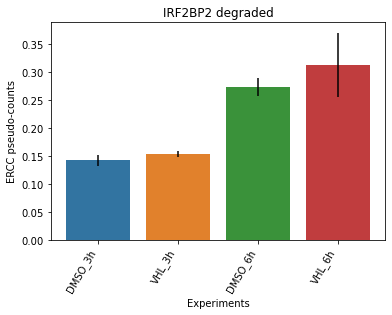

Saved to ../results/slamseq_IRF2BP2_degraded_v1_res_v4/plots/IRF2BP2_degraded_v1_scaling_fact_with_conf.pdf


<Figure size 432x288 with 0 Axes>

In [47]:
version = project.replace("_", " ").split(" ")[-1]
print(version)
createDir(res_dir+"plots/")

# barplot of DMSO vs VHL for each condition
sns.barplot(x="Experiments", y="ERCC pseudo-counts", data=d, ci=None,)
plt.errorbar(x=range(0,len(d)), y=d['ERCC pseudo-counts'],
             yerr=d['var'], fmt='none', ecolor="black")
plt.xticks(rotation=60, ha='right')
plt.title(project.replace("_", " ").split(" v")[0])
plt.show()

plt.savefig(res_dir+"plots/"+project+"_scaling_fact_with_conf.pdf")
print("Saved to "+res_dir+"plots/"+project+"_scaling_fact_with_conf.pdf")

## Saving the data in our bucket

In [49]:
! gsutil -m cp ../../data/slamseq_$project/fastqs/* gs://amlproject/RNA/slamseq/$project/fastqs/ 
! gsutil -m cp ../../data/slamseq_$project/res_v4/map/* gs://amlproject/RNA/slamseq/$project/res_v4/map/ 
! gsutil -m cp ../../data/slamseq_$project/res_v4/filter/* gs://amlproject/RNA/slamseq/$project/res_v4/filter/ 
! gsutil -m cp ../../data/slamseq_$project/res_v4/snp/* gs://amlproject/RNA/slamseq/$project/res_v4/snp/ 
! gsutil -m cp ../../data/slamseq_$project/res_v4/count/* gs://amlproject/RNA/slamseq/$project/res_v4/count/

Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001_unpaired_1.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001_val_1.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001_unpaired_2.fq.gz [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run          
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"p

Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_R2_001_val_2.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_R1_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_R1_001_unpaired_1.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_R2_001_unpaired_2.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_R2_001_val_2.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/fastqs/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_R2_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slams

Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/map/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/map/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/map/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/map/mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/map/mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/map/mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Copying file://../../

Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/filter/ERCC_mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_filtered.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/filter/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/filter/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/filter/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam.bai [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/filter/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/filter/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamse

Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/snp/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_snp.vcf [Content-Type=text/vcard]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/snp/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_snp.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/snp/mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_snp.vcf [Content-Type=text/vcard]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/snp/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_snp.vcf [Content-Type=text/vcard]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/snp/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_snp.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/snp/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_snp.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/snp/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_snp.vcf [Content-Type=text/vcard

Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/count/mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount_mins.bedgraph [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/count/mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount_mins.bedgraph [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/count/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount_mins.bedgraph [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/count/mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/count/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount_plus.bedgraph [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v4/count/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount.log [Content-Type=application/octet-stream]...
Copying file://../..

In [50]:
bam_files = ! ls ../../data/slamseq_$project/$res_folder/filter/mr*.bam

for bam in bam_files:
    print(os.path.basename(bam).split(".")[0])

mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered
mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered
mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered
mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered
mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered
mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered
mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered
mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered
mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered
mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered
mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_filtered
mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_filtered
mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_filtered
mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_filtered
mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_filtered
mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_filtered


# SLAM-seq
All SLAM-seq assays were performed at 60-70% confluency for adherent cells or
60% of the maximum cell density counted on a hemocytometer for suspension cells. 5-7h
prior to each assay, growth medium was aspirated and replaced. Unless stated otherwise,
cells were pre-treated with indicated small molecule inhibitors or 100µM IAA for 30 min
to pre-establish full target inhibition or degradation. Newly synthesized RNA was labeled
for indicated time spans (45 min or 60 min) at a final concentration of 100µM 4-
thiouridine (4sU, Carbosynth). Adherent cells were harvested by direct snap-freezing of
plates on dry ice. Suspension cells were spun down and immediately snap-frozen. RNA
extraction was performed using the RNeasy Plus Mini Kit (Qiagen). 

Total RNA was subjected to alkylation by iodoacetamide (Sigma, 10mM) for 15 min and RNA was repurified by ethanol precipitation. 500ng alkylated RNA were used as input for generating
3’-end mRNA sequencing libraries using a commercially available kit (QuantSeq 3′
mRNA-Seq Library Prep Kit FWD for Illumina and PCR Add-on Kit for Illumina,
Lexogen). Deep sequencing was performed using HiSeq1500 and HiSeq2500 platforms
(Illumina).

## Make count files

In [75]:
project = project
res_folder = "res_v4"
location = "../../data/slamseq_"+project+"/"+res_folder+"/"+"count/"
print(location)

../../data/slamseq_IRF2BP2_degraded_v1/res_v4/count/


In [76]:
# remove genes that have very low counts
mincount_toremove=5

# remove genes that have a variance of 0 across all samples (these we really want to remove)
# genes that have values of 0,1,2 everywhere
minvar_toremove=0

<li>readcounts: total counts of every transscript (output of slamdunk algorithm
<li>tccounts: t to c converted RNA transcripts

In [77]:
%%time

# all genes (not just protein coding)
readcounts, tccounts = rna.readFromSlamdunk(loc=location, 
                                            minvar_toremove=minvar_toremove, 
                                            mincount_toremove=mincount_toremove,
                                            verbose=False)

found 16 files:dict_keys(['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount', 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount', 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount', 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount', 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount', 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount', 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount', 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount', 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount', 'mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount', 'mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount', 'mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount', 'mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount', 'mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount', 'mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount', 'mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount'])
mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1
pb with 24
pb with 28
pb with 30
pb with 31
pb with 32
pb with 53
pb with 56
pb with 72
pb with 98
pb with 100
pb with 101
pb with 102
pb with 108
pb with 114
pb with 120
pb with 124
pb with 162
pb with 173
pb

pb with 6175
pb with 6189
pb with 6191
pb with 6204
pb with 6222
pb with 6223
pb with 6227
pb with 6230
pb with 6235
pb with 6236
pb with 6258
pb with 6294
pb with 6297
pb with 6314
pb with 6343
pb with 6354
pb with 6369
pb with 6389
pb with 6396
pb with 6397
pb with 6401
pb with 6416
pb with 6427
pb with 6428
pb with 6450
pb with 6455
pb with 6489
pb with 6494
pb with 6500
pb with 6519
pb with 6526
pb with 6534
pb with 6538
pb with 6549
pb with 6578
pb with 6599
pb with 6607
pb with 6608
pb with 6622
pb with 6628
pb with 6649
pb with 6652
pb with 6674
pb with 6688
pb with 6711
pb with 6712
pb with 6718
pb with 6727
pb with 6729
pb with 6731
pb with 6733
pb with 6741
pb with 6745
pb with 6746
pb with 6773
pb with 6775
pb with 6779
pb with 6795
pb with 6810
pb with 6813
pb with 6819
pb with 6829
pb with 6839
pb with 6844
pb with 6846
pb with 6856
pb with 6872
pb with 6875
pb with 6879
pb with 6881
pb with 6891
pb with 6892
pb with 6894
pb with 6900
pb with 6905
pb with 6919
pb with 6926

pb with 23544
pb with 23550
pb with 23566
pb with 23568
pb with 23584
pb with 23600
pb with 23609
pb with 23613
pb with 23614
pb with 23643
pb with 23659
pb with 23761
pb with 23767
pb with 23788
pb with 24140
pb with 24141
pb with 25789
pb with 25799
pb with 25801
pb with 25812
pb with 25847
pb with 25853
pb with 25864
pb with 25873
pb with 25875
pb with 25897
pb with 25900
pb with 25901
pb with 25903
pb with 25913
pb with 25914
pb with 25937
pb with 25942
pb with 25946
pb with 25953
pb with 25956
pb with 25959
pb with 25962
pb with 25963
pb with 25966
pb with 25992
pb with 26007
pb with 26030
pb with 26032
pb with 26037
pb with 26050
pb with 26054
pb with 26056
pb with 26063
pb with 26064
pb with 26070
pb with 26088
pb with 26091
pb with 26092
pb with 26122
pb with 26128
pb with 26138
pb with 26148
pb with 26152
pb with 26184
pb with 26230
pb with 26235
pb with 26238
pb with 26259
pb with 26266
pb with 26273
pb with 26275
pb with 26297
pb with 26298
pb with 26472
pb with 26515
pb wit

pb with 79136
pb with 79144
pb with 79147
pb with 79155
pb with 79166
pb with 79170
pb with 79173
pb with 79176
pb with 79187
pb with 79269
pb with 79365
pb with 79441
pb with 79541
pb with 79585
pb with 79586
pb with 79602
pb with 79611
pb with 79613
pb with 79632
pb with 79639
pb with 79642
pb with 79649
pb with 79650
pb with 79651
pb with 79665
pb with 79676
pb with 79683
pb with 79685
pb with 79703
pb with 79712
pb with 79713
pb with 79718
pb with 79735
pb with 79753
pb with 79755
pb with 79781
pb with 79794
pb with 79812
pb with 79814
pb with 79816
pb with 79829
pb with 79845
pb with 79852
pb with 79869
pb with 79870
pb with 79890
pb with 79894
pb with 79896
pb with 79898
pb with 79908
pb with 79923
pb with 79927
pb with 79931
pb with 79955
pb with 79956
pb with 79958
pb with 79960
pb with 79966
pb with 79968
pb with 79970
pb with 79971
pb with 79983
pb with 79990
pb with 80006
pb with 80018
pb with 80031
pb with 80129
pb with 80144
pb with 80148
pb with 80155
pb with 80173
pb wit

pb with 254263
pb with 254427
pb with 254773
pb with 255043
pb with 255167
pb with 255403
pb with 255877
pb with 256281
pb with 256297
pb with 256364
pb with 256471
pb with 257000
pb with 257019
pb with 257629
pb with 259173
pb with 259215
pb with 259296
pb with 259308
pb with 260425
pb with 261729
pb with 266629
pb with 280658
pb with 282890
pb with 282980
pb with 283025
pb with 283045
pb with 283078
pb with 283106
pb with 283149
pb with 283234
pb with 283316
pb with 283332
pb with 283554
pb with 283629
pb with 283673
pb with 283693
pb with 283796
pb with 283807
pb with 283848
pb with 283897
pb with 283902
pb with 283927
pb with 283971
pb with 284004
pb with 284021
pb with 284023
pb with 284029
pb with 284034
pb with 284067
pb with 284099
pb with 284110
pb with 284129
pb with 284215
pb with 284233
pb with 284325
pb with 284353
pb with 284369
pb with 284390
pb with 284412
pb with 284443
pb with 284565
pb with 284680
pb with 284697
pb with 284749
pb with 284759
pb with 284865
pb with 28

pb with 100507034
pb with 100507043
pb with 100507058
pb with 100507064
pb with 100507073
pb with 100507117
pb with 100507127
pb with 100507257
pb with 100507299
pb with 100507308
pb with 100507321
pb with 100507331
pb with 100507334
pb with 100507362
pb with 100507377
pb with 100507398
pb with 100507399
pb with 100507420
pb with 100507428
pb with 100507458
pb with 100507459
pb with 100507461
pb with 100507464
pb with 100507500
pb with 100507506
pb with 100507533
pb with 100507564
pb with 100507567
pb with 100507582
pb with 100507584
pb with 100507600
pb with 100507602
pb with 100507605
pb with 100507633
pb with 100526739
pb with 100526740
pb with 100526832
pb with 100526837
pb with 100526842
pb with 100527943
pb with 100527960
pb with 100527963
pb with 100527964
pb with 100527978
pb with 100528019
pb with 100528032
pb with 100529207
pb with 100529211
pb with 100529215
pb with 100532726
pb with 100532736
pb with 100532742
pb with 100533105
pb with 100533178
pb with 100533195
pb with 10

pb with 3164
pb with 3177
pb with 3181
pb with 3182
pb with 3185
pb with 3199
pb with 3207
pb with 3262
pb with 3266
pb with 3276
pb with 3283
pb with 3299
pb with 3305
pb with 3364
pb with 3371
pb with 3381
pb with 3399
pb with 3417
pb with 3421
pb with 3423
pb with 3425
pb with 3433
pb with 3456
pb with 3467
pb with 3491
pb with 3557
pb with 3565
pb with 3572
pb with 3574
pb with 3595
pb with 3603
pb with 3611
pb with 3613
pb with 3632
pb with 3633
pb with 3640
pb with 3654
pb with 3656
pb with 3659
pb with 3662
pb with 3667
pb with 3678
pb with 3689
pb with 3693
pb with 3696
pb with 3706
pb with 3749
pb with 3784
pb with 3785
pb with 3800
pb with 3801
pb with 3832
pb with 3834
pb with 3837
pb with 3843
pb with 3846
pb with 3857
pb with 3904
pb with 3906
pb with 3921
pb with 3927
pb with 3954
pb with 3956
pb with 3980
pb with 3981
pb with 3987
pb with 3998
pb with 4001
pb with 4045
pb with 4047
pb with 4048
pb with 4049
pb with 4050
pb with 4051
pb with 4062
pb with 4064
pb with 4077

pb with 9682
pb with 9709
pb with 9710
pb with 9711
pb with 9715
pb with 9719
pb with 9726
pb with 9728
pb with 9731
pb with 9735
pb with 9748
pb with 9754
pb with 9765
pb with 9766
pb with 9770
pb with 9787
pb with 9798
pb with 9804
pb with 9816
pb with 9825
pb with 9832
pb with 9840
pb with 9841
pb with 9842
pb with 9843
pb with 9846
pb with 9856
pb with 9860
pb with 9863
pb with 9870
pb with 9884
pb with 9896
pb with 9899
pb with 9905
pb with 9907
pb with 9911
pb with 9913
pb with 9921
pb with 9960
pb with 9988
pb with 9990
pb with 9994
pb with 10001
pb with 10011
pb with 10013
pb with 10014
pb with 10016
pb with 10019
pb with 10025
pb with 10026
pb with 10042
pb with 10050
pb with 10056
pb with 10057
pb with 10058
pb with 10062
pb with 10066
pb with 10068
pb with 10089
pb with 10103
pb with 10139
pb with 10140
pb with 10163
pb with 10166
pb with 10194
pb with 10196
pb with 10199
pb with 10206
pb with 10212
pb with 10213
pb with 10226
pb with 10231
pb with 10234
pb with 10236
pb wit

pb with 55213
pb with 55223
pb with 55230
pb with 55243
pb with 55247
pb with 55252
pb with 55255
pb with 55257
pb with 55259
pb with 55262
pb with 55270
pb with 55272
pb with 55276
pb with 55285
pb with 55286
pb with 55294
pb with 55295
pb with 55299
pb with 55316
pb with 55326
pb with 55329
pb with 55340
pb with 55343
pb with 55345
pb with 55349
pb with 55425
pb with 55432
pb with 55450
pb with 55466
pb with 55501
pb with 55526
pb with 55561
pb with 55593
pb with 55600
pb with 55609
pb with 55611
pb with 55615
pb with 55628
pb with 55629
pb with 55664
pb with 55667
pb with 55669
pb with 55681
pb with 55684
pb with 55686
pb with 55692
pb with 55702
pb with 55705
pb with 55707
pb with 55714
pb with 55720
pb with 55728
pb with 55731
pb with 55735
pb with 55742
pb with 55745
pb with 55751
pb with 55756
pb with 55757
pb with 55759
pb with 55762
pb with 55771
pb with 55780
pb with 55783
pb with 55791
pb with 55798
pb with 55815
pb with 55830
pb with 55837
pb with 55839
pb with 55840
pb wit

pb with 116437
pb with 117143
pb with 117531
pb with 117608
pb with 118430
pb with 118442
pb with 118738
pb with 119587
pb with 120400
pb with 120526
pb with 121391
pb with 121504
pb with 123228
pb with 123811
pb with 123872
pb with 124454
pb with 124460
pb with 124491
pb with 124565
pb with 124583
pb with 124936
pb with 124989
pb with 124997
pb with 125050
pb with 125061
pb with 125150
pb with 125704
pb with 126017
pb with 126353
pb with 126536
pb with 126668
pb with 127294
pb with 127534
pb with 128646
pb with 129025
pb with 129285
pb with 129401
pb with 129521
pb with 129607
pb with 129642
pb with 129684
pb with 130074
pb with 130075
pb with 130355
pb with 130827
pb with 130888
pb with 130940
pb with 131177
pb with 131616
pb with 131873
pb with 132001
pb with 132014
pb with 132160
pb with 132243
pb with 132321
pb with 132671
pb with 132851
pb with 132954
pb with 133015
pb with 133396
pb with 133874
pb with 134147
pb with 134430
pb with 137209
pb with 137735
pb with 138009
pb with 13

pb with 100126339
pb with 100127206
pb with 100127889
pb with 100128071
pb with 100128176
pb with 100128233
pb with 100128288
pb with 100128378
pb with 100128496
pb with 100128750
pb with 100128787
pb with 100128890
pb with 100129060
pb with 100129066
pb with 100129083
pb with 100129148
pb with 100129175
pb with 100129196
pb with 100129269
pb with 100129385
pb with 100129461
pb with 100129464
pb with 100129515
pb with 100129534
pb with 100129935
pb with 100129969
pb with 100130017
pb with 100130197
pb with 100130231
pb with 100130264
pb with 100130348
pb with 100130418
pb with 100130480
pb with 100130700
pb with 100130776
pb with 100130827
pb with 100130872
pb with 100130880
pb with 100130889
pb with 100130933
pb with 100130954
pb with 100131089
pb with 100131094
pb with 100131107
pb with 100131205
pb with 100131213
pb with 100131234
pb with 100131244
pb with 100131347
pb with 100131439
pb with 100131608
pb with 100131635
pb with 100131726
pb with 100131998
pb with 100132062
pb with 10

pb with 818
pb with 819
pb with 832
pb with 833
pb with 834
pb with 836
pb with 840
pb with 842
pb with 843
pb with 844
pb with 862
pb with 869
pb with 881
pb with 885
pb with 901
pb with 905
pb with 914
pb with 946
pb with 949
pb with 958
pb with 961
pb with 966
pb with 972
pb with 973
pb with 984
pb with 999
pb with 1024
pb with 1028
pb with 1029
pb with 1030
pb with 1031
pb with 1059
pb with 1068
pb with 1075
pb with 1080
pb with 1107
pb with 1112
pb with 1122
pb with 1131
pb with 1149
pb with 1154
pb with 1163
pb with 1178
pb with 1185
pb with 1192
pb with 1193
pb with 1196
pb with 1197
pb with 1203
pb with 1208
pb with 1213
pb with 1317
pb with 1346
pb with 1349
pb with 1351
pb with 1355
pb with 1356
pb with 1357
pb with 1375
pb with 1386
pb with 1387
pb with 1389
pb with 1392
pb with 1397
pb with 1399
pb with 1409
pb with 1434
pb with 1437
pb with 1439
pb with 1454
pb with 1455
pb with 1460
pb with 1462
pb with 1472
pb with 1479
pb with 1482
pb with 1504
pb with 1520
pb with 1524

pb with 7846
pb with 7873
pb with 7879
pb with 7905
pb with 7917
pb with 7918
pb with 7919
pb with 7920
pb with 7922
pb with 7923
pb with 7932
pb with 7940
pb with 7941
pb with 7984
pb with 8000
pb with 8029
pb with 8034
pb with 8048
pb with 8065
pb with 8082
pb with 8100
pb with 8111
pb with 8153
pb with 8200
pb with 8214
pb with 8220
pb with 8224
pb with 8226
pb with 8227
pb with 8228
pb with 8266
pb with 8294
pb with 8312
pb with 8313
pb with 8398
pb with 8411
pb with 8449
pb with 8450
pb with 8456
pb with 8460
pb with 8480
pb with 8491
pb with 8501
pb with 8503
pb with 8506
pb with 8508
pb with 8532
pb with 8542
pb with 8549
pb with 8557
pb with 8562
pb with 8568
pb with 8570
pb with 8604
pb with 8605
pb with 8608
pb with 8611
pb with 8612
pb with 8624
pb with 8625
pb with 8649
pb with 8650
pb with 8663
pb with 8664
pb with 8673
pb with 8675
pb with 8678
pb with 8722
pb with 8724
pb with 8739
pb with 8744
pb with 8754
pb with 8755
pb with 8763
pb with 8766
pb with 8776
pb with 8777

pb with 51123
pb with 51124
pb with 51126
pb with 51148
pb with 51156
pb with 51184
pb with 51200
pb with 51202
pb with 51232
pb with 51257
pb with 51276
pb with 51280
pb with 51284
pb with 51296
pb with 51304
pb with 51317
pb with 51327
pb with 51360
pb with 51378
pb with 51380
pb with 51393
pb with 51409
pb with 51435
pb with 51449
pb with 51458
pb with 51478
pb with 51479
pb with 51480
pb with 51493
pb with 51537
pb with 51573
pb with 51596
pb with 51599
pb with 51622
pb with 51629
pb with 51649
pb with 51654
pb with 51659
pb with 51661
pb with 51669
pb with 51678
pb with 51686
pb with 51700
pb with 51715
pb with 51716
pb with 51719
pb with 51738
pb with 51742
pb with 51744
pb with 51778
pb with 53336
pb with 53340
pb with 53373
pb with 53616
pb with 53630
pb with 53637
pb with 53828
pb with 53841
pb with 53917
pb with 53918
pb with 54020
pb with 54059
pb with 54064
pb with 54069
pb with 54097
pb with 54108
pb with 54212
pb with 54433
pb with 54435
pb with 54455
pb with 54463
pb wit

pb with 84726
pb with 84734
pb with 84766
pb with 84767
pb with 84807
pb with 84811
pb with 84823
pb with 84836
pb with 84850
pb with 84856
pb with 84859
pb with 84864
pb with 84876
pb with 84897
pb with 84918
pb with 84933
pb with 84938
pb with 84944
pb with 84948
pb with 84950
pb with 84964
pb with 84966
pb with 84975
pb with 84983
pb with 85002
pb with 85009
pb with 85014
pb with 85021
pb with 85027
pb with 85235
pb with 85280
pb with 85366
pb with 85388
pb with 85413
pb with 85441
pb with 85457
pb with 85459
pb with 85465
pb with 85477
pb with 89782
pb with 89832
pb with 89845
pb with 89857
pb with 89910
pb with 89927
pb with 89958
pb with 89978
pb with 90007
pb with 90121
pb with 90161
pb with 90199
pb with 90321
pb with 90332
pb with 90338
pb with 90417
pb with 90423
pb with 90678
pb with 90737
pb with 90809
pb with 90843
pb with 90990
pb with 91039
pb with 91074
pb with 91283
pb with 91289
pb with 91319
pb with 91351
pb with 91355
pb with 91433
pb with 91543
pb with 91584
pb wit

pb with 493829
pb with 494551
pb with 497634
pb with 541472
pb with 541565
pb with 548596
pb with 548645
pb with 550631
pb with 552900
pb with 553103
pb with 553128
pb with 594855
pb with 595135
pb with 606293
pb with 613038
pb with 641365
pb with 641648
pb with 642006
pb with 642345
pb with 642477
pb with 642843
pb with 642968
pb with 643707
pb with 643711
pb with 643723
pb with 643802
pb with 643847
pb with 643955
pb with 643988
pb with 644139
pb with 644186
pb with 644669
pb with 644759
pb with 644890
pb with 645027
pb with 645166
pb with 645249
pb with 645339
pb with 645485
pb with 646243
pb with 646799
pb with 647135
pb with 649133
pb with 651430
pb with 652965
pb with 653075
pb with 653140
pb with 653166
pb with 653399
pb with 653483
pb with 653641
pb with 653653
pb with 653781
pb with 654463
pb with 654502
pb with 654817
pb with 654835
pb with 684959
pb with 692106
pb with 692200
pb with 727758
pb with 727764
pb with 727800
pb with 727896
pb with 727915
pb with 728049
pb with 72

pb with 102724849
pb with 102724954
pb with 103021165
pb with 103106903
pb with 103352541
pb with 103752585
pb with 104266956
pb with 104326051
pb with 104384744
pb with 104413892
pb with 105274304
pb with 105369187
pb with 105369343
pb with 105369443
pb with 105370586
pb with 105371814
pb with 105371824
pb with 105372440
pb with 105373782
pb with 105375297
pb with 105375396
pb with 105376772
pb with 105377143
pb with 105377448
pb with 106144531
pb with 106635684
pb with 106660609
pb with 106660613
pb with 106707243
pb with 107080644
pb with 107303344
mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4
pb with 24
pb with 28
pb with 30
pb with 31
pb with 32
pb with 53
pb with 56
pb with 72
pb with 98
pb with 100
pb with 101
pb with 102
pb with 114
pb with 120
pb with 124
pb with 162
pb with 173
pb with 176
pb with 202
pb with 205
pb with 215
pb with 225
pb with 276
pb with 301
pb with 323
pb with 372
pb with 388
pb with 397
pb with 398
pb with 410
pb with 412
pb with 432
pb with 445
pb with 476
pb with

pb with 6813
pb with 6819
pb with 6829
pb with 6839
pb with 6844
pb with 6846
pb with 6872
pb with 6875
pb with 6879
pb with 6881
pb with 6891
pb with 6892
pb with 6894
pb with 6900
pb with 6905
pb with 6919
pb with 6926
pb with 6935
pb with 6938
pb with 6939
pb with 6942
pb with 6943
pb with 6950
pb with 6993
pb with 6996
pb with 7053
pb with 7068
pb with 7072
pb with 7086
pb with 7087
pb with 7113
pb with 7125
pb with 7158
pb with 7164
pb with 7169
pb with 7171
pb with 7182
pb with 7204
pb with 7263
pb with 7265
pb with 7267
pb with 7272
pb with 7306
pb with 7311
pb with 7324
pb with 7327
pb with 7336
pb with 7345
pb with 7356
pb with 7376
pb with 7384
pb with 7405
pb with 7408
pb with 7417
pb with 7424
pb with 7441
pb with 7447
pb with 7464
pb with 7469
pb with 7508
pb with 7511
pb with 7512
pb with 7520
pb with 7532
pb with 7538
pb with 7552
pb with 7554
pb with 7574
pb with 7579
pb with 7584
pb with 7620
pb with 7627
pb with 7643
pb with 7681
pb with 7699
pb with 7702
pb with 7704

pb with 26959
pb with 26986
pb with 26993
pb with 26994
pb with 27018
pb with 27022
pb with 27033
pb with 27040
pb with 27042
pb with 27068
pb with 27072
pb with 27079
pb with 27087
pb with 27097
pb with 27098
pb with 27111
pb with 27164
pb with 27189
pb with 27246
pb with 27248
pb with 27258
pb with 27301
pb with 27316
pb with 27319
pb with 27344
pb with 27350
pb with 27436
pb with 28227
pb with 28231
pb with 28234
pb with 28951
pb with 28956
pb with 28974
pb with 28982
pb with 28988
pb with 28991
pb with 28996
pb with 29058
pb with 29065
pb with 29081
pb with 29093
pb with 29098
pb with 29124
pb with 29126
pb with 29785
pb with 29798
pb with 29800
pb with 29844
pb with 29850
pb with 29886
pb with 29889
pb with 29894
pb with 29901
pb with 29923
pb with 29929
pb with 29966
pb with 29970
pb with 29986
pb with 29995
pb with 30001
pb with 30816
pb with 30834
pb with 30835
pb with 30836
pb with 30844
pb with 50619
pb with 50628
pb with 50801
pb with 50805
pb with 50855
pb with 50862
pb wit

pb with 80763
pb with 80818
pb with 80856
pb with 80862
pb with 80868
pb with 81035
pb with 81099
pb with 81491
pb with 81532
pb with 81542
pb with 81555
pb with 81557
pb with 81563
pb with 81567
pb with 81578
pb with 81614
pb with 81622
pb with 81626
pb with 81629
pb with 81671
pb with 81792
pb with 81854
pb with 81870
pb with 81890
pb with 83442
pb with 83452
pb with 83463
pb with 83464
pb with 83552
pb with 83597
pb with 83607
pb with 83659
pb with 83667
pb with 83737
pb with 83743
pb with 83786
pb with 83795
pb with 83857
pb with 83893
pb with 83931
pb with 83941
pb with 83942
pb with 83983
pb with 83990
pb with 84000
pb with 84058
pb with 84063
pb with 84069
pb with 84131
pb with 84133
pb with 84141
pb with 84168
pb with 84171
pb with 84193
pb with 84196
pb with 84197
pb with 84255
pb with 84258
pb with 84269
pb with 84272
pb with 84279
pb with 84289
pb with 84296
pb with 84302
pb with 84309
pb with 84311
pb with 84312
pb with 84318
pb with 84326
pb with 84327
pb with 84329
pb wit

pb with 399664
pb with 399670
pb with 399823
pb with 399979
pb with 400359
pb with 400451
pb with 400548
pb with 400658
pb with 400765
pb with 400927
pb with 400957
pb with 400961
pb with 401097
pb with 401253
pb with 401265
pb with 401331
pb with 401335
pb with 401398
pb with 401474
pb with 401492
pb with 401507
pb with 401612
pb with 404266
pb with 404672
pb with 408187
pb with 414201
pb with 414260
pb with 414777
pb with 414778
pb with 439927
pb with 439933
pb with 440028
pb with 440041
pb with 440077
pb with 440087
pb with 440107
pb with 440270
pb with 440275
pb with 440295
pb with 440299
pb with 440356
pb with 440419
pb with 440498
pb with 440584
pb with 440952
pb with 441234
pb with 441250
pb with 441273
pb with 441282
pb with 442028
pb with 442582
pb with 442590
pb with 442720
pb with 445347
pb with 445372
pb with 493829
pb with 494551
pb with 541472
pb with 541565
pb with 548596
pb with 548645
pb with 550631
pb with 552900
pb with 553103
pb with 553128
pb with 594855
pb with 59

pb with 104326051
pb with 104384744
pb with 104413892
pb with 105274304
pb with 105369187
pb with 105369343
pb with 105369443
pb with 105369635
pb with 105370424
pb with 105370586
pb with 105371814
pb with 105371824
pb with 105372440
pb with 105375297
pb with 105375396
pb with 105376772
pb with 105377143
pb with 105377448
pb with 106635684
pb with 106660609
pb with 106660613
pb with 106707243
pb with 107080644
pb with 107303344
mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1
pb with 24
pb with 28
pb with 30
pb with 31
pb with 32
pb with 53
pb with 56
pb with 72
pb with 98
pb with 100
pb with 101
pb with 114
pb with 120
pb with 124
pb with 162
pb with 173
pb with 176
pb with 202
pb with 205
pb with 215
pb with 225
pb with 276
pb with 301
pb with 323
pb with 372
pb with 388
pb with 397
pb with 398
pb with 410
pb with 412
pb with 415
pb with 432
pb with 445
pb with 476
pb with 488
pb with 513
pb with 515
pb with 522
pb with 535
pb with 551
pb with 567
pb with 570
pb with 581
pb with 582
pb with 597
pb

pb with 7072
pb with 7086
pb with 7087
pb with 7113
pb with 7125
pb with 7158
pb with 7164
pb with 7169
pb with 7171
pb with 7182
pb with 7204
pb with 7265
pb with 7267
pb with 7272
pb with 7306
pb with 7311
pb with 7324
pb with 7327
pb with 7336
pb with 7345
pb with 7356
pb with 7376
pb with 7384
pb with 7405
pb with 7408
pb with 7417
pb with 7424
pb with 7441
pb with 7447
pb with 7464
pb with 7469
pb with 7508
pb with 7511
pb with 7512
pb with 7520
pb with 7532
pb with 7538
pb with 7552
pb with 7554
pb with 7574
pb with 7579
pb with 7584
pb with 7620
pb with 7627
pb with 7643
pb with 7681
pb with 7699
pb with 7702
pb with 7704
pb with 7711
pb with 7727
pb with 7728
pb with 7750
pb with 7766
pb with 7802
pb with 7846
pb with 7873
pb with 7879
pb with 7905
pb with 7917
pb with 7918
pb with 7919
pb with 7920
pb with 7922
pb with 7923
pb with 7932
pb with 7940
pb with 7941
pb with 7984
pb with 8000
pb with 8029
pb with 8034
pb with 8048
pb with 8065
pb with 8082
pb with 8100
pb with 8111

pb with 29065
pb with 29081
pb with 29093
pb with 29098
pb with 29124
pb with 29126
pb with 29785
pb with 29798
pb with 29800
pb with 29844
pb with 29850
pb with 29886
pb with 29889
pb with 29894
pb with 29901
pb with 29923
pb with 29929
pb with 29966
pb with 29970
pb with 29986
pb with 29995
pb with 30001
pb with 30816
pb with 30834
pb with 30835
pb with 30836
pb with 30844
pb with 50619
pb with 50628
pb with 50801
pb with 50805
pb with 50855
pb with 50862
pb with 51000
pb with 51001
pb with 51002
pb with 51009
pb with 51010
pb with 51014
pb with 51024
pb with 51026
pb with 51031
pb with 51056
pb with 51058
pb with 51061
pb with 51065
pb with 51069
pb with 51073
pb with 51083
pb with 51097
pb with 51104
pb with 51105
pb with 51106
pb with 51108
pb with 51112
pb with 51118
pb with 51123
pb with 51124
pb with 51126
pb with 51148
pb with 51156
pb with 51184
pb with 51200
pb with 51202
pb with 51232
pb with 51257
pb with 51276
pb with 51280
pb with 51284
pb with 51296
pb with 51304
pb wit

pb with 84131
pb with 84133
pb with 84141
pb with 84168
pb with 84171
pb with 84193
pb with 84196
pb with 84197
pb with 84255
pb with 84258
pb with 84269
pb with 84272
pb with 84279
pb with 84289
pb with 84296
pb with 84302
pb with 84309
pb with 84311
pb with 84312
pb with 84318
pb with 84326
pb with 84327
pb with 84329
pb with 84335
pb with 84342
pb with 84343
pb with 84450
pb with 84501
pb with 84514
pb with 84515
pb with 84517
pb with 84522
pb with 84525
pb with 84530
pb with 84545
pb with 84546
pb with 84549
pb with 84616
pb with 84619
pb with 84641
pb with 84651
pb with 84662
pb with 84665
pb with 84726
pb with 84734
pb with 84766
pb with 84767
pb with 84807
pb with 84811
pb with 84823
pb with 84836
pb with 84856
pb with 84859
pb with 84864
pb with 84876
pb with 84897
pb with 84918
pb with 84933
pb with 84938
pb with 84944
pb with 84950
pb with 84964
pb with 84966
pb with 84975
pb with 84983
pb with 85002
pb with 85009
pb with 85014
pb with 85021
pb with 85027
pb with 85235
pb wit

pb with 442028
pb with 442582
pb with 442590
pb with 442720
pb with 445347
pb with 445372
pb with 493829
pb with 494551
pb with 503542
pb with 541472
pb with 541565
pb with 548596
pb with 548645
pb with 550631
pb with 552900
pb with 553103
pb with 553128
pb with 554279
pb with 594855
pb with 595135
pb with 606293
pb with 613038
pb with 641365
pb with 641648
pb with 642006
pb with 642345
pb with 642477
pb with 642843
pb with 642968
pb with 643707
pb with 643711
pb with 643723
pb with 643802
pb with 643847
pb with 643955
pb with 643988
pb with 644139
pb with 644669
pb with 644759
pb with 644890
pb with 645027
pb with 645166
pb with 645249
pb with 645339
pb with 645485
pb with 646243
pb with 646799
pb with 647135
pb with 649133
pb with 651430
pb with 652965
pb with 653075
pb with 653140
pb with 653166
pb with 653399
pb with 653483
pb with 653641
pb with 653653
pb with 653781
pb with 654463
pb with 654502
pb with 654817
pb with 654835
pb with 684959
pb with 692106
pb with 727758
pb with 72

pb with 178
pb with 202
pb with 205
pb with 215
pb with 225
pb with 276
pb with 301
pb with 323
pb with 372
pb with 388
pb with 397
pb with 398
pb with 410
pb with 412
pb with 415
pb with 432
pb with 445
pb with 476
pb with 513
pb with 515
pb with 522
pb with 535
pb with 551
pb with 567
pb with 570
pb with 581
pb with 597
pb with 599
pb with 623
pb with 650
pb with 668
pb with 673
pb with 683
pb with 685
pb with 687
pb with 728
pb with 747
pb with 753
pb with 755
pb with 758
pb with 818
pb with 819
pb with 832
pb with 833
pb with 834
pb with 836
pb with 840
pb with 842
pb with 843
pb with 844
pb with 862
pb with 869
pb with 901
pb with 905
pb with 914
pb with 946
pb with 949
pb with 958
pb with 961
pb with 966
pb with 972
pb with 973
pb with 984
pb with 999
pb with 1024
pb with 1028
pb with 1029
pb with 1030
pb with 1031
pb with 1059
pb with 1068
pb with 1075
pb with 1080
pb with 1107
pb with 1112
pb with 1122
pb with 1131
pb with 1149
pb with 1154
pb with 1163
pb with 1178
pb with 118

pb with 7417
pb with 7424
pb with 7441
pb with 7447
pb with 7464
pb with 7469
pb with 7508
pb with 7511
pb with 7512
pb with 7520
pb with 7532
pb with 7538
pb with 7552
pb with 7554
pb with 7574
pb with 7579
pb with 7584
pb with 7620
pb with 7627
pb with 7643
pb with 7681
pb with 7699
pb with 7702
pb with 7704
pb with 7711
pb with 7727
pb with 7728
pb with 7750
pb with 7766
pb with 7802
pb with 7873
pb with 7879
pb with 7905
pb with 7917
pb with 7918
pb with 7919
pb with 7920
pb with 7922
pb with 7923
pb with 7932
pb with 7940
pb with 7941
pb with 7984
pb with 8000
pb with 8019
pb with 8029
pb with 8034
pb with 8048
pb with 8065
pb with 8082
pb with 8100
pb with 8111
pb with 8153
pb with 8200
pb with 8214
pb with 8220
pb with 8224
pb with 8226
pb with 8227
pb with 8228
pb with 8266
pb with 8294
pb with 8312
pb with 8313
pb with 8398
pb with 8411
pb with 8419
pb with 8435
pb with 8449
pb with 8450
pb with 8456
pb with 8460
pb with 8480
pb with 8491
pb with 8501
pb with 8503
pb with 8506

pb with 29081
pb with 29093
pb with 29098
pb with 29124
pb with 29126
pb with 29785
pb with 29798
pb with 29800
pb with 29844
pb with 29850
pb with 29886
pb with 29889
pb with 29894
pb with 29923
pb with 29929
pb with 29966
pb with 29970
pb with 29986
pb with 29995
pb with 30001
pb with 30816
pb with 30834
pb with 30835
pb with 30836
pb with 30844
pb with 50619
pb with 50628
pb with 50801
pb with 50805
pb with 50855
pb with 50862
pb with 51000
pb with 51001
pb with 51002
pb with 51009
pb with 51010
pb with 51014
pb with 51024
pb with 51026
pb with 51031
pb with 51056
pb with 51058
pb with 51061
pb with 51065
pb with 51069
pb with 51073
pb with 51083
pb with 51097
pb with 51104
pb with 51105
pb with 51106
pb with 51108
pb with 51112
pb with 51118
pb with 51123
pb with 51124
pb with 51126
pb with 51148
pb with 51156
pb with 51184
pb with 51200
pb with 51202
pb with 51232
pb with 51257
pb with 51276
pb with 51280
pb with 51284
pb with 51296
pb with 51304
pb with 51317
pb with 51327
pb wit

pb with 83983
pb with 83990
pb with 84000
pb with 84058
pb with 84063
pb with 84069
pb with 84131
pb with 84133
pb with 84141
pb with 84168
pb with 84171
pb with 84193
pb with 84196
pb with 84197
pb with 84255
pb with 84258
pb with 84269
pb with 84272
pb with 84279
pb with 84296
pb with 84302
pb with 84309
pb with 84311
pb with 84312
pb with 84318
pb with 84326
pb with 84327
pb with 84329
pb with 84331
pb with 84335
pb with 84342
pb with 84343
pb with 84450
pb with 84501
pb with 84514
pb with 84515
pb with 84517
pb with 84522
pb with 84525
pb with 84530
pb with 84545
pb with 84546
pb with 84549
pb with 84616
pb with 84619
pb with 84641
pb with 84651
pb with 84662
pb with 84665
pb with 84726
pb with 84734
pb with 84766
pb with 84767
pb with 84807
pb with 84811
pb with 84823
pb with 84836
pb with 84850
pb with 84856
pb with 84859
pb with 84864
pb with 84876
pb with 84897
pb with 84918
pb with 84933
pb with 84938
pb with 84944
pb with 84950
pb with 84964
pb with 84966
pb with 84975
pb wit

pb with 401585
pb with 401612
pb with 404266
pb with 404672
pb with 408187
pb with 414201
pb with 414260
pb with 414777
pb with 414778
pb with 439927
pb with 439933
pb with 440028
pb with 440041
pb with 440077
pb with 440087
pb with 440107
pb with 440270
pb with 440275
pb with 440295
pb with 440299
pb with 440356
pb with 440419
pb with 440465
pb with 440498
pb with 440584
pb with 440829
pb with 440952
pb with 441150
pb with 441234
pb with 441250
pb with 441273
pb with 442028
pb with 442582
pb with 442590
pb with 442720
pb with 445347
pb with 445372
pb with 493829
pb with 494551
pb with 497634
pb with 503542
pb with 503834
pb with 541472
pb with 541565
pb with 548596
pb with 548645
pb with 550631
pb with 552900
pb with 553103
pb with 553128
pb with 594855
pb with 595135
pb with 606293
pb with 613038
pb with 641365
pb with 641648
pb with 642006
pb with 642345
pb with 642477
pb with 642843
pb with 642968
pb with 643707
pb with 643711
pb with 643723
pb with 643802
pb with 643847
pb with 64

pb with 101929517
pb with 101929624
pb with 101929709
pb with 101929710
pb with 101929719
pb with 101929736
pb with 101929767
pb with 101929829
pb with 101930094
pb with 101930746
pb with 102191832
pb with 102216268
pb with 102464817
pb with 102465253
pb with 102466191
pb with 102723426
pb with 102723471
pb with 102723557
pb with 102723701
pb with 102723709
pb with 102723737
pb with 102724018
pb with 102724156
pb with 102724224
pb with 102724301
pb with 102724321
pb with 102724434
pb with 102724589
pb with 102724596
pb with 102724826
pb with 102724849
pb with 102724954
pb with 102800317
pb with 103021165
pb with 103106903
pb with 103352541
pb with 103752585
pb with 104266956
pb with 104326051
pb with 104384744
pb with 104413892
pb with 105274304
pb with 105369187
pb with 105369343
pb with 105369443
pb with 105369635
pb with 105370424
pb with 105370586
pb with 105371766
pb with 105371814
pb with 105371824
pb with 105372440
pb with 105373782
pb with 105374389
pb with 105375297
pb with 10

pb with 6450
pb with 6455
pb with 6489
pb with 6494
pb with 6500
pb with 6519
pb with 6526
pb with 6534
pb with 6538
pb with 6549
pb with 6578
pb with 6599
pb with 6607
pb with 6608
pb with 6628
pb with 6649
pb with 6652
pb with 6674
pb with 6688
pb with 6711
pb with 6712
pb with 6718
pb with 6727
pb with 6729
pb with 6731
pb with 6733
pb with 6741
pb with 6745
pb with 6746
pb with 6773
pb with 6775
pb with 6779
pb with 6795
pb with 6810
pb with 6813
pb with 6819
pb with 6829
pb with 6839
pb with 6844
pb with 6846
pb with 6872
pb with 6875
pb with 6879
pb with 6881
pb with 6891
pb with 6892
pb with 6894
pb with 6900
pb with 6905
pb with 6919
pb with 6926
pb with 6935
pb with 6938
pb with 6939
pb with 6942
pb with 6943
pb with 6950
pb with 6993
pb with 6996
pb with 7060
pb with 7068
pb with 7072
pb with 7086
pb with 7087
pb with 7113
pb with 7125
pb with 7158
pb with 7164
pb with 7169
pb with 7170
pb with 7171
pb with 7182
pb with 7204
pb with 7263
pb with 7265
pb with 7267
pb with 7272

pb with 80255
pb with 80256
pb with 80258
pb with 80270
pb with 80309
pb with 80315
pb with 80323
pb with 80331
pb with 80343
pb with 80346
pb with 80347
pb with 80380
pb with 80745
pb with 80746
pb with 80755
pb with 80760
pb with 80763
pb with 80818
pb with 80856
pb with 80862
pb with 80868
pb with 81035
pb with 81099
pb with 81491
pb with 81532
pb with 81542
pb with 81555
pb with 81557
pb with 81563
pb with 81567
pb with 81578
pb with 81614
pb with 81622
pb with 81626
pb with 81629
pb with 81671
pb with 81792
pb with 81854
pb with 81870
pb with 81890
pb with 83442
pb with 83452
pb with 83463
pb with 83464
pb with 83548
pb with 83552
pb with 83597
pb with 83607
pb with 83659
pb with 83667
pb with 83737
pb with 83743
pb with 83786
pb with 83795
pb with 83857
pb with 83893
pb with 83931
pb with 83941
pb with 83942
pb with 83983
pb with 83990
pb with 84000
pb with 84058
pb with 84063
pb with 84069
pb with 84131
pb with 84133
pb with 84141
pb with 84168
pb with 84171
pb with 84193
pb wit

pb with 374946
pb with 375196
pb with 375287
pb with 375307
pb with 375387
pb with 375519
pb with 375757
pb with 378807
pb with 386593
pb with 386597
pb with 386653
pb with 387082
pb with 387522
pb with 387885
pb with 387890
pb with 388327
pb with 388611
pb with 388695
pb with 388799
pb with 389376
pb with 389541
pb with 389643
pb with 389932
pb with 399664
pb with 399670
pb with 399823
pb with 399979
pb with 400359
pb with 400451
pb with 400548
pb with 400765
pb with 400927
pb with 400957
pb with 400961
pb with 401097
pb with 401152
pb with 401253
pb with 401265
pb with 401331
pb with 401335
pb with 401398
pb with 401474
pb with 401492
pb with 401507
pb with 401585
pb with 401612
pb with 404203
pb with 404672
pb with 408187
pb with 414201
pb with 414260
pb with 414777
pb with 414778
pb with 439927
pb with 439933
pb with 440028
pb with 440041
pb with 440077
pb with 440087
pb with 440107
pb with 440270
pb with 440275
pb with 440295
pb with 440299
pb with 440356
pb with 440419
pb with 44

pb with 101928298
pb with 101928372
pb with 101928381
pb with 101928435
pb with 101928446
pb with 101928527
pb with 101928718
pb with 101928738
pb with 101929093
pb with 101929106
pb with 101929148
pb with 101929163
pb with 101929227
pb with 101929237
pb with 101929244
pb with 101929331
pb with 101929372
pb with 101929517
pb with 101929624
pb with 101929709
pb with 101929710
pb with 101929719
pb with 101929736
pb with 101929767
pb with 101929829
pb with 101930094
pb with 101930746
pb with 102191832
pb with 102216268
pb with 102464817
pb with 102465253
pb with 102466191
pb with 102723426
pb with 102723557
pb with 102723701
pb with 102723709
pb with 102723737
pb with 102724156
pb with 102724224
pb with 102724301
pb with 102724321
pb with 102724434
pb with 102724589
pb with 102724596
pb with 102724826
pb with 102724849
pb with 102724954
pb with 102800317
pb with 103021165
pb with 103106903
pb with 103352541
pb with 103752585
pb with 104266956
pb with 104326051
pb with 104384744
pb with 10

pb with 6578
pb with 6599
pb with 6607
pb with 6608
pb with 6628
pb with 6649
pb with 6652
pb with 6674
pb with 6688
pb with 6711
pb with 6712
pb with 6718
pb with 6727
pb with 6729
pb with 6731
pb with 6733
pb with 6741
pb with 6745
pb with 6746
pb with 6773
pb with 6775
pb with 6779
pb with 6795
pb with 6810
pb with 6813
pb with 6829
pb with 6839
pb with 6844
pb with 6846
pb with 6872
pb with 6875
pb with 6879
pb with 6881
pb with 6891
pb with 6892
pb with 6894
pb with 6900
pb with 6905
pb with 6919
pb with 6926
pb with 6935
pb with 6938
pb with 6939
pb with 6942
pb with 6943
pb with 6950
pb with 6993
pb with 6996
pb with 7068
pb with 7072
pb with 7086
pb with 7087
pb with 7113
pb with 7125
pb with 7158
pb with 7164
pb with 7169
pb with 7171
pb with 7182
pb with 7204
pb with 7265
pb with 7267
pb with 7272
pb with 7306
pb with 7311
pb with 7324
pb with 7327
pb with 7336
pb with 7345
pb with 7356
pb with 7376
pb with 7384
pb with 7405
pb with 7408
pb with 7417
pb with 7441
pb with 7447

pb with 27040
pb with 27042
pb with 27068
pb with 27072
pb with 27087
pb with 27097
pb with 27098
pb with 27111
pb with 27164
pb with 27189
pb with 27246
pb with 27248
pb with 27258
pb with 27301
pb with 27316
pb with 27319
pb with 27344
pb with 27350
pb with 27436
pb with 28234
pb with 28956
pb with 28974
pb with 28988
pb with 28991
pb with 29058
pb with 29065
pb with 29081
pb with 29093
pb with 29098
pb with 29124
pb with 29126
pb with 29785
pb with 29798
pb with 29800
pb with 29844
pb with 29850
pb with 29886
pb with 29889
pb with 29894
pb with 29923
pb with 29929
pb with 29966
pb with 29970
pb with 29986
pb with 29995
pb with 30001
pb with 30816
pb with 30834
pb with 30835
pb with 30836
pb with 30844
pb with 50619
pb with 50628
pb with 50801
pb with 50805
pb with 50855
pb with 50862
pb with 51000
pb with 51001
pb with 51002
pb with 51009
pb with 51010
pb with 51014
pb with 51024
pb with 51026
pb with 51031
pb with 51056
pb with 51061
pb with 51065
pb with 51069
pb with 51073
pb wit

pb with 84193
pb with 84196
pb with 84197
pb with 84255
pb with 84258
pb with 84269
pb with 84272
pb with 84279
pb with 84296
pb with 84302
pb with 84309
pb with 84311
pb with 84312
pb with 84318
pb with 84326
pb with 84327
pb with 84329
pb with 84331
pb with 84335
pb with 84342
pb with 84343
pb with 84450
pb with 84501
pb with 84514
pb with 84515
pb with 84517
pb with 84522
pb with 84525
pb with 84530
pb with 84546
pb with 84549
pb with 84616
pb with 84619
pb with 84641
pb with 84651
pb with 84662
pb with 84665
pb with 84726
pb with 84734
pb with 84767
pb with 84807
pb with 84811
pb with 84823
pb with 84836
pb with 84856
pb with 84859
pb with 84864
pb with 84876
pb with 84897
pb with 84918
pb with 84933
pb with 84938
pb with 84944
pb with 84950
pb with 84964
pb with 84966
pb with 84975
pb with 84983
pb with 85002
pb with 85009
pb with 85014
pb with 85021
pb with 85027
pb with 85235
pb with 85280
pb with 85366
pb with 85413
pb with 85457
pb with 85459
pb with 85465
pb with 85477
pb wit

pb with 692106
pb with 727758
pb with 727764
pb with 727800
pb with 727896
pb with 727915
pb with 728049
pb with 728194
pb with 728239
pb with 728343
pb with 728492
pb with 728524
pb with 728558
pb with 728613
pb with 728621
pb with 728643
pb with 728695
pb with 728730
pb with 728734
pb with 728780
pb with 728945
pb with 729020
pb with 729171
pb with 729540
pb with 729603
pb with 729627
pb with 729689
pb with 729873
pb with 729993
pb with 730092
pb with 730112
pb with 730755
pb with 731656
pb with 768212
pb with 780852
pb with 100038246
pb with 100073347
pb with 100093631
pb with 100093698
pb with 100126339
pb with 100127206
pb with 100127889
pb with 100128071
pb with 100128176
pb with 100128233
pb with 100128288
pb with 100128378
pb with 100128496
pb with 100128750
pb with 100128787
pb with 100128890
pb with 100129060
pb with 100129066
pb with 100129175
pb with 100129196
pb with 100129385
pb with 100129461
pb with 100129515
pb with 100129935
pb with 100130017
pb with 100130231
pb with

pb with 2131
pb with 2137
pb with 2145
pb with 2176
pb with 2177
pb with 2178
pb with 2212
pb with 2235
pb with 2242
pb with 2281
pb with 2286
pb with 2290
pb with 2310
pb with 2323
pb with 2444
pb with 2487
pb with 2492
pb with 2554
pb with 2595
pb with 2596
pb with 2619
pb with 2630
pb with 2631
pb with 2637
pb with 2657
pb with 2678
pb with 2734
pb with 2735
pb with 2745
pb with 2746
pb with 2773
pb with 2774
pb with 2779
pb with 2783
pb with 2788
pb with 2791
pb with 2796
pb with 2803
pb with 2804
pb with 2872
pb with 2909
pb with 2928
pb with 2949
pb with 2967
pb with 2970
pb with 2971
pb with 2974
pb with 2992
pb with 2998
pb with 3030
pb with 3039
pb with 3067
pb with 3069
pb with 3074
pb with 3096
pb with 3106
pb with 3107
pb with 3108
pb with 3109
pb with 3115
pb with 3117
pb with 3120
pb with 3123
pb with 3134
pb with 3164
pb with 3177
pb with 3181
pb with 3182
pb with 3185
pb with 3199
pb with 3207
pb with 3262
pb with 3266
pb with 3276
pb with 3283
pb with 3299
pb with 3305

pb with 9498
pb with 9502
pb with 9517
pb with 9522
pb with 9529
pb with 9534
pb with 9535
pb with 9538
pb with 9572
pb with 9578
pb with 9585
pb with 9590
pb with 9612
pb with 9635
pb with 9640
pb with 9643
pb with 9646
pb with 9651
pb with 9654
pb with 9657
pb with 9658
pb with 9663
pb with 9666
pb with 9667
pb with 9682
pb with 9709
pb with 9710
pb with 9711
pb with 9715
pb with 9719
pb with 9726
pb with 9728
pb with 9731
pb with 9735
pb with 9748
pb with 9754
pb with 9765
pb with 9766
pb with 9770
pb with 9787
pb with 9798
pb with 9804
pb with 9816
pb with 9825
pb with 9832
pb with 9840
pb with 9841
pb with 9842
pb with 9843
pb with 9846
pb with 9856
pb with 9860
pb with 9863
pb with 9870
pb with 9884
pb with 9896
pb with 9899
pb with 9905
pb with 9907
pb with 9911
pb with 9913
pb with 9921
pb with 9960
pb with 9988
pb with 9990
pb with 9994
pb with 10001
pb with 10011
pb with 10013
pb with 10014
pb with 10016
pb with 10019
pb with 10026
pb with 10042
pb with 10050
pb with 10056
pb

pb with 55133
pb with 55149
pb with 55172
pb with 55177
pb with 55198
pb with 55213
pb with 55223
pb with 55230
pb with 55243
pb with 55247
pb with 55252
pb with 55255
pb with 55257
pb with 55262
pb with 55270
pb with 55272
pb with 55276
pb with 55285
pb with 55286
pb with 55294
pb with 55295
pb with 55299
pb with 55316
pb with 55326
pb with 55340
pb with 55343
pb with 55345
pb with 55349
pb with 55432
pb with 55450
pb with 55466
pb with 55501
pb with 55526
pb with 55561
pb with 55600
pb with 55609
pb with 55611
pb with 55615
pb with 55628
pb with 55629
pb with 55667
pb with 55669
pb with 55681
pb with 55684
pb with 55686
pb with 55692
pb with 55702
pb with 55705
pb with 55707
pb with 55714
pb with 55720
pb with 55728
pb with 55731
pb with 55735
pb with 55742
pb with 55745
pb with 55751
pb with 55756
pb with 55757
pb with 55759
pb with 55762
pb with 55771
pb with 55780
pb with 55783
pb with 55791
pb with 55798
pb with 55815
pb with 55830
pb with 55837
pb with 55839
pb with 55840
pb wit

pb with 127294
pb with 127534
pb with 128646
pb with 128989
pb with 129025
pb with 129285
pb with 129521
pb with 129607
pb with 129642
pb with 130074
pb with 130075
pb with 130355
pb with 130827
pb with 130888
pb with 130940
pb with 131177
pb with 131616
pb with 131873
pb with 132001
pb with 132014
pb with 132243
pb with 132671
pb with 132851
pb with 132954
pb with 133015
pb with 133874
pb with 134147
pb with 134430
pb with 137209
pb with 137735
pb with 138009
pb with 138240
pb with 139212
pb with 139599
pb with 139728
pb with 140461
pb with 140462
pb with 140467
pb with 140730
pb with 140885
pb with 140893
pb with 140902
pb with 142689
pb with 143241
pb with 144363
pb with 144608
pb with 144817
pb with 145567
pb with 145741
pb with 145788
pb with 146206
pb with 146713
pb with 146723
pb with 146852
pb with 146894
pb with 147872
pb with 148066
pb with 148198
pb with 148231
pb with 148418
pb with 148479
pb with 148808
pb with 149840
pb with 149934
pb with 149998
pb with 150135
pb with 15

pb with 100132813
pb with 100133093
pb with 100133301
pb with 100133461
pb with 100133985
pb with 100134934
pb with 100144604
pb with 100187716
pb with 100188947
pb with 100188953
pb with 100233209
pb with 100286922
pb with 100287010
pb with 100287029
pb with 100287569
pb with 100287718
pb with 100287765
pb with 100287792
pb with 100288142
pb with 100288181
pb with 100288287
pb with 100288637
pb with 100288748
pb with 100288797
pb with 100289087
pb with 100289098
pb with 100289150
pb with 100289410
pb with 100289678
pb with 100294720
pb with 100302736
pb with 100303728
pb with 100309464
pb with 100379249
pb with 100422962
pb with 100423005
pb with 100499183
pb with 100499467
pb with 100500808
pb with 100505478
pb with 100505619
pb with 100505625
pb with 100505648
pb with 100505679
pb with 100505683
pb with 100505715
pb with 100505716
pb with 100505761
pb with 100505768
pb with 100505776
pb with 100505817
pb with 100505869
pb with 100505877
pb with 100506046
pb with 100506060
pb with 10

pb with 2909
pb with 2928
pb with 2948
pb with 2949
pb with 2967
pb with 2970
pb with 2971
pb with 2974
pb with 2992
pb with 2998
pb with 3030
pb with 3039
pb with 3067
pb with 3069
pb with 3074
pb with 3096
pb with 3106
pb with 3107
pb with 3108
pb with 3109
pb with 3115
pb with 3117
pb with 3120
pb with 3123
pb with 3125
pb with 3134
pb with 3164
pb with 3177
pb with 3181
pb with 3182
pb with 3185
pb with 3199
pb with 3207
pb with 3262
pb with 3266
pb with 3276
pb with 3283
pb with 3299
pb with 3305
pb with 3364
pb with 3371
pb with 3381
pb with 3399
pb with 3417
pb with 3421
pb with 3423
pb with 3425
pb with 3433
pb with 3456
pb with 3467
pb with 3491
pb with 3557
pb with 3565
pb with 3572
pb with 3595
pb with 3603
pb with 3611
pb with 3613
pb with 3632
pb with 3633
pb with 3640
pb with 3654
pb with 3656
pb with 3659
pb with 3662
pb with 3667
pb with 3678
pb with 3689
pb with 3693
pb with 3696
pb with 3706
pb with 3749
pb with 3784
pb with 3785
pb with 3800
pb with 3801
pb with 3832

pb with 9787
pb with 9798
pb with 9804
pb with 9816
pb with 9825
pb with 9832
pb with 9840
pb with 9841
pb with 9842
pb with 9843
pb with 9846
pb with 9856
pb with 9860
pb with 9863
pb with 9870
pb with 9884
pb with 9885
pb with 9896
pb with 9899
pb with 9907
pb with 9911
pb with 9913
pb with 9921
pb with 9960
pb with 9988
pb with 9990
pb with 9994
pb with 10001
pb with 10011
pb with 10013
pb with 10014
pb with 10016
pb with 10019
pb with 10025
pb with 10026
pb with 10042
pb with 10050
pb with 10056
pb with 10057
pb with 10058
pb with 10062
pb with 10066
pb with 10068
pb with 10089
pb with 10103
pb with 10139
pb with 10140
pb with 10163
pb with 10166
pb with 10194
pb with 10196
pb with 10199
pb with 10206
pb with 10212
pb with 10213
pb with 10226
pb with 10231
pb with 10234
pb with 10236
pb with 10240
pb with 10252
pb with 10260
pb with 10265
pb with 10281
pb with 10283
pb with 10284
pb with 10307
pb with 10319
pb with 10321
pb with 10327
pb with 10331
pb with 10361
pb with 10365
pb wi

pb with 55243
pb with 55247
pb with 55252
pb with 55255
pb with 55257
pb with 55262
pb with 55270
pb with 55272
pb with 55276
pb with 55285
pb with 55286
pb with 55294
pb with 55295
pb with 55299
pb with 55316
pb with 55326
pb with 55329
pb with 55340
pb with 55343
pb with 55345
pb with 55349
pb with 55425
pb with 55432
pb with 55450
pb with 55466
pb with 55501
pb with 55526
pb with 55561
pb with 55600
pb with 55609
pb with 55611
pb with 55615
pb with 55628
pb with 55629
pb with 55664
pb with 55667
pb with 55669
pb with 55681
pb with 55684
pb with 55686
pb with 55692
pb with 55702
pb with 55705
pb with 55707
pb with 55714
pb with 55720
pb with 55728
pb with 55731
pb with 55735
pb with 55742
pb with 55745
pb with 55751
pb with 55756
pb with 55757
pb with 55759
pb with 55762
pb with 55771
pb with 55780
pb with 55783
pb with 55791
pb with 55798
pb with 55815
pb with 55830
pb with 55837
pb with 55839
pb with 55840
pb with 55854
pb with 55863
pb with 55870
pb with 55969
pb with 55997
pb wit

pb with 123228
pb with 123811
pb with 123872
pb with 124402
pb with 124454
pb with 124460
pb with 124491
pb with 124565
pb with 124583
pb with 124936
pb with 124989
pb with 124997
pb with 125050
pb with 125061
pb with 125150
pb with 125704
pb with 126017
pb with 126353
pb with 126536
pb with 126668
pb with 127294
pb with 127534
pb with 128646
pb with 128989
pb with 129025
pb with 129285
pb with 129401
pb with 129521
pb with 129607
pb with 129642
pb with 130074
pb with 130075
pb with 130355
pb with 130827
pb with 130888
pb with 130940
pb with 131177
pb with 131616
pb with 131873
pb with 132001
pb with 132014
pb with 132243
pb with 132671
pb with 132851
pb with 132954
pb with 133015
pb with 133396
pb with 133874
pb with 134147
pb with 134430
pb with 137209
pb with 137735
pb with 138009
pb with 138240
pb with 139212
pb with 139599
pb with 139728
pb with 140461
pb with 140462
pb with 140467
pb with 140730
pb with 140885
pb with 140893
pb with 140902
pb with 142689
pb with 143241
pb with 14

pb with 100128750
pb with 100128787
pb with 100128890
pb with 100129060
pb with 100129066
pb with 100129083
pb with 100129148
pb with 100129175
pb with 100129196
pb with 100129269
pb with 100129385
pb with 100129461
pb with 100129464
pb with 100129515
pb with 100129534
pb with 100129917
pb with 100129935
pb with 100129969
pb with 100130017
pb with 100130231
pb with 100130264
pb with 100130361
pb with 100130418
pb with 100130480
pb with 100130700
pb with 100130776
pb with 100130827
pb with 100130872
pb with 100130880
pb with 100130889
pb with 100130933
pb with 100130954
pb with 100131089
pb with 100131094
pb with 100131205
pb with 100131213
pb with 100131234
pb with 100131244
pb with 100131347
pb with 100131608
pb with 100131635
pb with 100131726
pb with 100131998
pb with 100132062
pb with 100132247
pb with 100132285
pb with 100132464
pb with 100132813
pb with 100133093
pb with 100133123
pb with 100133301
pb with 100133315
pb with 100133461
pb with 100133985
pb with 100134015
pb with 10

pb with 1472
pb with 1479
pb with 1482
pb with 1504
pb with 1520
pb with 1524
pb with 1527
pb with 1534
pb with 1605
pb with 1617
pb with 1641
pb with 1653
pb with 1657
pb with 1660
pb with 1676
pb with 1687
pb with 1723
pb with 1727
pb with 1731
pb with 1737
pb with 1743
pb with 1744
pb with 1760
pb with 1767
pb with 1789
pb with 1802
pb with 1807
pb with 1838
pb with 1840
pb with 1842
pb with 1861
pb with 1877
pb with 1937
pb with 1990
pb with 1992
pb with 1993
pb with 2003
pb with 2006
pb with 2030
pb with 2036
pb with 2038
pb with 2041
pb with 2055
pb with 2056
pb with 2058
pb with 2068
pb with 2069
pb with 2077
pb with 2131
pb with 2137
pb with 2145
pb with 2176
pb with 2177
pb with 2178
pb with 2242
pb with 2281
pb with 2286
pb with 2290
pb with 2310
pb with 2323
pb with 2339
pb with 2444
pb with 2487
pb with 2492
pb with 2554
pb with 2595
pb with 2596
pb with 2619
pb with 2630
pb with 2637
pb with 2657
pb with 2678
pb with 2734
pb with 2735
pb with 2745
pb with 2746
pb with 2773

pb with 9113
pb with 9114
pb with 9126
pb with 9132
pb with 9136
pb with 9139
pb with 9141
pb with 9168
pb with 9188
pb with 9191
pb with 9204
pb with 9208
pb with 9209
pb with 9213
pb with 9232
pb with 9253
pb with 9258
pb with 9261
pb with 9271
pb with 9275
pb with 9276
pb with 9277
pb with 9278
pb with 9282
pb with 9320
pb with 9328
pb with 9331
pb with 9348
pb with 9353
pb with 9362
pb with 9365
pb with 9375
pb with 9378
pb with 9399
pb with 9401
pb with 9407
pb with 9413
pb with 9415
pb with 9440
pb with 9443
pb with 9455
pb with 9472
pb with 9474
pb with 9475
pb with 9478
pb with 9486
pb with 9491
pb with 9498
pb with 9517
pb with 9522
pb with 9529
pb with 9534
pb with 9535
pb with 9538
pb with 9572
pb with 9578
pb with 9585
pb with 9590
pb with 9612
pb with 9635
pb with 9640
pb with 9643
pb with 9646
pb with 9651
pb with 9654
pb with 9657
pb with 9658
pb with 9663
pb with 9666
pb with 9667
pb with 9682
pb with 9709
pb with 9710
pb with 9711
pb with 9715
pb with 9719
pb with 9726

pb with 54876
pb with 54879
pb with 54880
pb with 54883
pb with 54884
pb with 54890
pb with 54893
pb with 54894
pb with 54900
pb with 54905
pb with 54922
pb with 54925
pb with 54928
pb with 54933
pb with 54938
pb with 54941
pb with 54955
pb with 54964
pb with 54969
pb with 54977
pb with 54988
pb with 54994
pb with 54998
pb with 55011
pb with 55013
pb with 55030
pb with 55034
pb with 55036
pb with 55056
pb with 55071
pb with 55074
pb with 55089
pb with 55102
pb with 55106
pb with 55109
pb with 55111
pb with 55112
pb with 55133
pb with 55149
pb with 55172
pb with 55177
pb with 55198
pb with 55213
pb with 55223
pb with 55230
pb with 55243
pb with 55247
pb with 55252
pb with 55255
pb with 55257
pb with 55262
pb with 55270
pb with 55272
pb with 55276
pb with 55285
pb with 55286
pb with 55294
pb with 55295
pb with 55299
pb with 55316
pb with 55326
pb with 55340
pb with 55343
pb with 55345
pb with 55349
pb with 55432
pb with 55450
pb with 55466
pb with 55501
pb with 55526
pb with 55561
pb wit

pb with 116150
pb with 116236
pb with 117143
pb with 117531
pb with 117608
pb with 118430
pb with 118442
pb with 119587
pb with 120400
pb with 120526
pb with 121391
pb with 121504
pb with 123228
pb with 123811
pb with 123872
pb with 124454
pb with 124460
pb with 124491
pb with 124565
pb with 124583
pb with 124936
pb with 124989
pb with 124997
pb with 125050
pb with 125061
pb with 125150
pb with 125704
pb with 126017
pb with 126353
pb with 126536
pb with 127294
pb with 127534
pb with 128646
pb with 128989
pb with 129025
pb with 129285
pb with 129521
pb with 129607
pb with 129642
pb with 130074
pb with 130075
pb with 130827
pb with 130888
pb with 130940
pb with 131177
pb with 131616
pb with 131873
pb with 132001
pb with 132014
pb with 132243
pb with 132321
pb with 132671
pb with 132851
pb with 132954
pb with 133015
pb with 133396
pb with 133874
pb with 134147
pb with 134430
pb with 137209
pb with 137735
pb with 138009
pb with 138240
pb with 139212
pb with 139599
pb with 139728
pb with 14

pb with 100294720
pb with 100303728
pb with 100309464
pb with 100379249
pb with 100499183
pb with 100499467
pb with 100500808
pb with 100505478
pb with 100505619
pb with 100505625
pb with 100505648
pb with 100505679
pb with 100505683
pb with 100505696
pb with 100505715
pb with 100505716
pb with 100505761
pb with 100505768
pb with 100505776
pb with 100505817
pb with 100505869
pb with 100505877
pb with 100506046
pb with 100506060
pb with 100506068
pb with 100506082
pb with 100506084
pb with 100506136
pb with 100506229
pb with 100506305
pb with 100506325
pb with 100506334
pb with 100506368
pb with 100506403
pb with 100506433
pb with 100506470
pb with 100506542
pb with 100506599
pb with 100506606
pb with 100506650
pb with 100506674
pb with 100506680
pb with 100506688
pb with 100506696
pb with 100506724
pb with 100506747
pb with 100506765
pb with 100506783
pb with 100506858
pb with 100506881
pb with 100506985
pb with 100506994
pb with 100507002
pb with 100507034
pb with 100507043
pb with 10

pb with 4583
pb with 4593
pb with 4609
pb with 4613
pb with 4638
pb with 4651
pb with 4661
pb with 4673
pb with 4674
pb with 4677
pb with 4681
pb with 4690
pb with 4696
pb with 4697
pb with 4700
pb with 4701
pb with 4702
pb with 4703
pb with 4706
pb with 4707
pb with 4709
pb with 4718
pb with 4735
pb with 4736
pb with 4741
pb with 4752
pb with 4753
pb with 4760
pb with 4771
pb with 4772
pb with 4773
pb with 4774
pb with 4776
pb with 4783
pb with 4790
pb with 4796
pb with 4800
pb with 4815
pb with 4817
pb with 4841
pb with 4850
pb with 4851
pb with 4854
pb with 4878
pb with 4892
pb with 4897
pb with 4901
pb with 4905
pb with 4907
pb with 4927
pb with 4929
pb with 4940
pb with 4958
pb with 4968
pb with 4969
pb with 4978
pb with 4988
pb with 5000
pb with 5002
pb with 5050
pb with 5074
pb with 5081
pb with 5090
pb with 5099
pb with 5108
pb with 5111
pb with 5121
pb with 5136
pb with 5148
pb with 5154
pb with 5155
pb with 5163
pb with 5165
pb with 5166
pb with 5169
pb with 5191
pb with 5209

pb with 10861
pb with 10870
pb with 10903
pb with 10908
pb with 10915
pb with 10920
pb with 10922
pb with 10933
pb with 10936
pb with 10956
pb with 10974
pb with 10978
pb with 11007
pb with 11016
pb with 11017
pb with 11019
pb with 11020
pb with 11021
pb with 11023
pb with 11025
pb with 11030
pb with 11031
pb with 11054
pb with 11057
pb with 11061
pb with 11066
pb with 11073
pb with 11079
pb with 11085
pb with 11102
pb with 11119
pb with 11122
pb with 11135
pb with 11145
pb with 11147
pb with 11155
pb with 11157
pb with 11161
pb with 11169
pb with 11189
pb with 11197
pb with 11222
pb with 11245
pb with 11259
pb with 11269
pb with 11272
pb with 11277
pb with 11320
pb with 22795
pb with 22823
pb with 22828
pb with 22832
pb with 22835
pb with 22862
pb with 22868
pb with 22875
pb with 22877
pb with 22891
pb with 22901
pb with 22905
pb with 22907
pb with 22911
pb with 22914
pb with 22934
pb with 22948
pb with 22973
pb with 23016
pb with 23020
pb with 23024
pb with 23030
pb with 23033
pb wit

pb with 57509
pb with 57512
pb with 57532
pb with 57554
pb with 57565
pb with 57589
pb with 57590
pb with 57621
pb with 57624
pb with 57639
pb with 57646
pb with 57650
pb with 57658
pb with 57659
pb with 57662
pb with 57677
pb with 57680
pb with 57699
pb with 57701
pb with 57707
pb with 57709
pb with 57713
pb with 57721
pb with 57805
pb with 57820
pb with 57827
pb with 57828
pb with 57862
pb with 57863
pb with 58189
pb with 58472
pb with 58486
pb with 58497
pb with 58515
pb with 58517
pb with 59271
pb with 60436
pb with 60482
pb with 60489
pb with 60526
pb with 60528
pb with 60675
pb with 63893
pb with 63910
pb with 63930
pb with 63932
pb with 63941
pb with 63978
pb with 64078
pb with 64080
pb with 64083
pb with 64114
pb with 64115
pb with 64118
pb with 64146
pb with 64231
pb with 64232
pb with 64240
pb with 64344
pb with 64377
pb with 64405
pb with 64411
pb with 64419
pb with 64421
pb with 64422
pb with 64425
pb with 64434
pb with 64693
pb with 64735
pb with 64762
pb with 64766
pb wit

pb with 200634
pb with 200931
pb with 201164
pb with 201181
pb with 201627
pb with 201780
pb with 202051
pb with 202299
pb with 202500
pb with 202781
pb with 203068
pb with 203069
pb with 203238
pb with 204962
pb with 205327
pb with 205860
pb with 206412
pb with 207107
pb with 219749
pb with 219855
pb with 219858
pb with 220081
pb with 220136
pb with 220832
pb with 220906
pb with 220929
pb with 220930
pb with 220979
pb with 220980
pb with 220992
pb with 221044
pb with 221150
pb with 221191
pb with 221357
pb with 221527
pb with 221545
pb with 221613
pb with 222166
pb with 222236
pb with 222255
pb with 222256
pb with 223117
pb with 245802
pb with 246184
pb with 246330
pb with 246744
pb with 252884
pb with 252946
pb with 253044
pb with 253868
pb with 253962
pb with 253982
pb with 254158
pb with 254263
pb with 254427
pb with 254773
pb with 255043
pb with 255167
pb with 256281
pb with 256364
pb with 257000
pb with 257629
pb with 259173
pb with 259215
pb with 259296
pb with 259308
pb with 26

pb with 100652759
pb with 100652770
pb with 100652791
pb with 100653515
pb with 100750247
pb with 100775107
pb with 100861412
pb with 100861516
pb with 100861549
pb with 100873930
pb with 100873942
pb with 100873954
pb with 100873964
pb with 100873969
pb with 100873976
pb with 100874051
pb with 100874059
pb with 100874086
pb with 100874203
pb with 100874226
pb with 100874295
pb with 100874325
pb with 100874531
pb with 100887754
pb with 100996251
pb with 100996324
pb with 100996342
pb with 100996385
pb with 100996455
pb with 100996928
pb with 101059938
pb with 101060301
pb with 101101772
pb with 101340250
pb with 101410540
pb with 101752400
pb with 101926889
pb with 101926950
pb with 101927034
pb with 101927055
pb with 101927081
pb with 101927120
pb with 101927165
pb with 101927188
pb with 101927207
pb with 101927229
pb with 101927269
pb with 101927494
pb with 101927498
pb with 101927554
pb with 101927560
pb with 101927599
pb with 101927752
pb with 101927755
pb with 101927761
pb with 10

pb with 5775
pb with 5778
pb with 5780
pb with 5782
pb with 5789
pb with 5796
pb with 5813
pb with 5818
pb with 5819
pb with 5820
pb with 5822
pb with 5824
pb with 5825
pb with 5826
pb with 5827
pb with 5831
pb with 5860
pb with 5864
pb with 5868
pb with 5881
pb with 5885
pb with 5890
pb with 5893
pb with 5894
pb with 5908
pb with 5909
pb with 5910
pb with 5931
pb with 5934
pb with 5936
pb with 5937
pb with 5939
pb with 5940
pb with 5965
pb with 5977
pb with 5984
pb with 5988
pb with 5992
pb with 6003
pb with 6007
pb with 6016
pb with 6047
pb with 6049
pb with 6050
pb with 6051
pb with 6079
pb with 6121
pb with 6134
pb with 6135
pb with 6139
pb with 6142
pb with 6146
pb with 6152
pb with 6159
pb with 6161
pb with 6165
pb with 6175
pb with 6189
pb with 6191
pb with 6204
pb with 6222
pb with 6223
pb with 6227
pb with 6230
pb with 6235
pb with 6236
pb with 6258
pb with 6294
pb with 6297
pb with 6314
pb with 6343
pb with 6354
pb with 6389
pb with 6396
pb with 6397
pb with 6401
pb with 6416

pb with 23452
pb with 23466
pb with 23471
pb with 23478
pb with 23479
pb with 23484
pb with 23491
pb with 23510
pb with 23514
pb with 23517
pb with 23536
pb with 23539
pb with 23544
pb with 23550
pb with 23566
pb with 23568
pb with 23584
pb with 23600
pb with 23609
pb with 23614
pb with 23643
pb with 23659
pb with 23761
pb with 23788
pb with 24140
pb with 24141
pb with 25789
pb with 25799
pb with 25801
pb with 25812
pb with 25847
pb with 25853
pb with 25864
pb with 25873
pb with 25875
pb with 25897
pb with 25900
pb with 25901
pb with 25903
pb with 25913
pb with 25914
pb with 25937
pb with 25942
pb with 25953
pb with 25956
pb with 25959
pb with 25962
pb with 25963
pb with 25966
pb with 25992
pb with 26007
pb with 26030
pb with 26032
pb with 26037
pb with 26054
pb with 26056
pb with 26063
pb with 26064
pb with 26070
pb with 26088
pb with 26091
pb with 26092
pb with 26122
pb with 26128
pb with 26148
pb with 26152
pb with 26184
pb with 26230
pb with 26235
pb with 26238
pb with 26259
pb wit

pb with 79712
pb with 79713
pb with 79718
pb with 79735
pb with 79753
pb with 79755
pb with 79781
pb with 79794
pb with 79812
pb with 79814
pb with 79816
pb with 79829
pb with 79852
pb with 79869
pb with 79870
pb with 79890
pb with 79894
pb with 79896
pb with 79898
pb with 79923
pb with 79931
pb with 79955
pb with 79956
pb with 79960
pb with 79961
pb with 79966
pb with 79970
pb with 79971
pb with 79983
pb with 79990
pb with 80006
pb with 80018
pb with 80031
pb with 80129
pb with 80144
pb with 80148
pb with 80155
pb with 80173
pb with 80174
pb with 80183
pb with 80196
pb with 80201
pb with 80208
pb with 80212
pb with 80213
pb with 80215
pb with 80235
pb with 80255
pb with 80256
pb with 80258
pb with 80270
pb with 80309
pb with 80315
pb with 80323
pb with 80331
pb with 80346
pb with 80347
pb with 80380
pb with 80745
pb with 80746
pb with 80755
pb with 80760
pb with 80763
pb with 80818
pb with 80856
pb with 80862
pb with 80868
pb with 81035
pb with 81099
pb with 81491
pb with 81532
pb wit

pb with 374946
pb with 375287
pb with 375307
pb with 375387
pb with 375519
pb with 375704
pb with 375757
pb with 378807
pb with 386593
pb with 386597
pb with 387082
pb with 387522
pb with 387885
pb with 387890
pb with 388327
pb with 388611
pb with 388695
pb with 388799
pb with 389376
pb with 389541
pb with 389643
pb with 389932
pb with 399664
pb with 399670
pb with 399823
pb with 399979
pb with 400359
pb with 400548
pb with 400658
pb with 400765
pb with 400927
pb with 400957
pb with 401097
pb with 401253
pb with 401265
pb with 401331
pb with 401335
pb with 401398
pb with 401474
pb with 401507
pb with 401612
pb with 404672
pb with 408187
pb with 414201
pb with 414260
pb with 414777
pb with 414778
pb with 439927
pb with 439933
pb with 440028
pb with 440041
pb with 440077
pb with 440087
pb with 440107
pb with 440270
pb with 440275
pb with 440295
pb with 440299
pb with 440356
pb with 440419
pb with 440498
pb with 440584
pb with 440952
pb with 441150
pb with 441234
pb with 441273
pb with 44

pb with 513
pb with 515
pb with 522
pb with 535
pb with 551
pb with 567
pb with 570
pb with 581
pb with 582
pb with 597
pb with 599
pb with 623
pb with 650
pb with 668
pb with 673
pb with 683
pb with 685
pb with 728
pb with 747
pb with 753
pb with 755
pb with 758
pb with 818
pb with 819
pb with 832
pb with 833
pb with 834
pb with 836
pb with 840
pb with 842
pb with 843
pb with 844
pb with 862
pb with 869
pb with 901
pb with 905
pb with 946
pb with 949
pb with 958
pb with 961
pb with 966
pb with 972
pb with 973
pb with 984
pb with 999
pb with 1024
pb with 1028
pb with 1029
pb with 1030
pb with 1031
pb with 1059
pb with 1068
pb with 1075
pb with 1080
pb with 1107
pb with 1112
pb with 1122
pb with 1131
pb with 1149
pb with 1154
pb with 1163
pb with 1178
pb with 1185
pb with 1192
pb with 1193
pb with 1196
pb with 1197
pb with 1203
pb with 1208
pb with 1213
pb with 1317
pb with 1346
pb with 1349
pb with 1351
pb with 1355
pb with 1356
pb with 1357
pb with 1375
pb with 1386
pb with 1387
pb wi

pb with 8029
pb with 8034
pb with 8048
pb with 8065
pb with 8082
pb with 8100
pb with 8153
pb with 8200
pb with 8214
pb with 8220
pb with 8224
pb with 8226
pb with 8227
pb with 8228
pb with 8266
pb with 8294
pb with 8312
pb with 8313
pb with 8398
pb with 8411
pb with 8419
pb with 8435
pb with 8449
pb with 8450
pb with 8456
pb with 8460
pb with 8480
pb with 8491
pb with 8501
pb with 8503
pb with 8506
pb with 8508
pb with 8532
pb with 8542
pb with 8549
pb with 8557
pb with 8562
pb with 8568
pb with 8570
pb with 8604
pb with 8605
pb with 8608
pb with 8611
pb with 8612
pb with 8624
pb with 8625
pb with 8639
pb with 8649
pb with 8650
pb with 8663
pb with 8664
pb with 8673
pb with 8675
pb with 8678
pb with 8722
pb with 8724
pb with 8739
pb with 8744
pb with 8754
pb with 8755
pb with 8763
pb with 8766
pb with 8776
pb with 8777
pb with 8796
pb with 8800
pb with 8802
pb with 8814
pb with 8815
pb with 8817
pb with 8831
pb with 8832
pb with 8833
pb with 8835
pb with 8838
pb with 8848
pb with 8869

pb with 51378
pb with 51380
pb with 51393
pb with 51409
pb with 51435
pb with 51449
pb with 51458
pb with 51478
pb with 51479
pb with 51480
pb with 51493
pb with 51537
pb with 51573
pb with 51596
pb with 51599
pb with 51622
pb with 51629
pb with 51649
pb with 51654
pb with 51659
pb with 51661
pb with 51669
pb with 51678
pb with 51686
pb with 51700
pb with 51715
pb with 51716
pb with 51719
pb with 51738
pb with 51742
pb with 51744
pb with 51778
pb with 53336
pb with 53340
pb with 53373
pb with 53616
pb with 53630
pb with 53637
pb with 53828
pb with 53841
pb with 53917
pb with 53918
pb with 54020
pb with 54059
pb with 54064
pb with 54069
pb with 54097
pb with 54108
pb with 54212
pb with 54433
pb with 54435
pb with 54439
pb with 54455
pb with 54463
pb with 54465
pb with 54471
pb with 54480
pb with 54495
pb with 54502
pb with 54509
pb with 54517
pb with 54536
pb with 54541
pb with 54557
pb with 54586
pb with 54606
pb with 54619
pb with 54625
pb with 54674
pb with 54704
pb with 54732
pb wit

pb with 90332
pb with 90417
pb with 90423
pb with 90678
pb with 90737
pb with 90809
pb with 90843
pb with 90990
pb with 91039
pb with 91283
pb with 91289
pb with 91319
pb with 91351
pb with 91355
pb with 91433
pb with 91543
pb with 91584
pb with 91694
pb with 91703
pb with 91748
pb with 91851
pb with 91862
pb with 91894
pb with 91975
pb with 92017
pb with 92255
pb with 92270
pb with 92342
pb with 92345
pb with 92346
pb with 92421
pb with 92552
pb with 92609
pb with 92667
pb with 92689
pb with 93082
pb with 93107
pb with 93190
pb with 93587
pb with 93624
pb with 94005
pb with 94015
pb with 94081
pb with 94107
pb with 94240
pb with 94274
pb with 96459
pb with 96626
pb with 112483
pb with 112609
pb with 112744
pb with 113174
pb with 113263
pb with 113419
pb with 113540
pb with 114026
pb with 114049
pb with 114112
pb with 114299
pb with 114625
pb with 114792
pb with 114798
pb with 114815
pb with 114824
pb with 114826
pb with 114960
pb with 114990
pb with 115098
pb with 115548
pb with 11581

pb with 100130776
pb with 100130872
pb with 100130880
pb with 100130889
pb with 100130954
pb with 100131089
pb with 100131094
pb with 100131205
pb with 100131213
pb with 100131347
pb with 100131608
pb with 100131635
pb with 100131726
pb with 100131998
pb with 100132062
pb with 100132247
pb with 100132464
pb with 100132813
pb with 100133093
pb with 100133301
pb with 100133985
pb with 100134934
pb with 100187716
pb with 100188947
pb with 100188953
pb with 100191040
pb with 100233209
pb with 100286922
pb with 100287010
pb with 100287029
pb with 100287569
pb with 100287765
pb with 100288142
pb with 100288637
pb with 100288748
pb with 100288797
pb with 100289098
pb with 100289678
pb with 100294720
pb with 100302736
pb with 100303728
pb with 100309464
pb with 100379249
pb with 100499183
pb with 100499467
pb with 100500808
pb with 100505478
pb with 100505619
pb with 100505625
pb with 100505648
pb with 100505679
pb with 100505683
pb with 100505715
pb with 100505761
pb with 100505768
pb with 10

pb with 3832
pb with 3834
pb with 3837
pb with 3843
pb with 3846
pb with 3904
pb with 3906
pb with 3921
pb with 3927
pb with 3956
pb with 3980
pb with 3981
pb with 3987
pb with 3998
pb with 4001
pb with 4045
pb with 4047
pb with 4048
pb with 4049
pb with 4051
pb with 4062
pb with 4077
pb with 4081
pb with 4135
pb with 4139
pb with 4150
pb with 4151
pb with 4153
pb with 4155
pb with 4157
pb with 4184
pb with 4199
pb with 4208
pb with 4212
pb with 4214
pb with 4236
pb with 4242
pb with 4245
pb with 4255
pb with 4258
pb with 4259
pb with 4267
pb with 4277
pb with 4281
pb with 4283
pb with 4287
pb with 4288
pb with 4302
pb with 4303
pb with 4329
pb with 4340
pb with 4430
pb with 4440
pb with 4495
pb with 4520
pb with 4524
pb with 4582
pb with 4583
pb with 4593
pb with 4609
pb with 4613
pb with 4638
pb with 4651
pb with 4661
pb with 4673
pb with 4674
pb with 4677
pb with 4681
pb with 4690
pb with 4696
pb with 4697
pb with 4700
pb with 4701
pb with 4702
pb with 4703
pb with 4706
pb with 4707

pb with 10260
pb with 10265
pb with 10281
pb with 10283
pb with 10284
pb with 10307
pb with 10319
pb with 10321
pb with 10327
pb with 10331
pb with 10365
pb with 10390
pb with 10394
pb with 10411
pb with 10427
pb with 10444
pb with 10451
pb with 10455
pb with 10459
pb with 10466
pb with 10467
pb with 10472
pb with 10475
pb with 10479
pb with 10483
pb with 10493
pb with 10509
pb with 10520
pb with 10523
pb with 10540
pb with 10549
pb with 10554
pb with 10555
pb with 10557
pb with 10559
pb with 10588
pb with 10589
pb with 10595
pb with 10612
pb with 10647
pb with 10651
pb with 10659
pb with 10670
pb with 10699
pb with 10713
pb with 10714
pb with 10724
pb with 10726
pb with 10730
pb with 10733
pb with 10749
pb with 10768
pb with 10772
pb with 10773
pb with 10780
pb with 10786
pb with 10803
pb with 10807
pb with 10845
pb with 10846
pb with 10861
pb with 10870
pb with 10903
pb with 10908
pb with 10915
pb with 10920
pb with 10922
pb with 10933
pb with 10936
pb with 10944
pb with 10956
pb wit

pb with 56900
pb with 56912
pb with 56923
pb with 56929
pb with 56992
pb with 56997
pb with 57019
pb with 57037
pb with 57045
pb with 57082
pb with 57088
pb with 57099
pb with 57110
pb with 57117
pb with 57119
pb with 57129
pb with 57143
pb with 57158
pb with 57178
pb with 57180
pb with 57184
pb with 57185
pb with 57186
pb with 57187
pb with 57188
pb with 57190
pb with 57205
pb with 57210
pb with 57211
pb with 57214
pb with 57228
pb with 57282
pb with 57292
pb with 57338
pb with 57381
pb with 57406
pb with 57408
pb with 57418
pb with 57447
pb with 57460
pb with 57465
pb with 57491
pb with 57509
pb with 57512
pb with 57532
pb with 57554
pb with 57565
pb with 57589
pb with 57590
pb with 57621
pb with 57624
pb with 57639
pb with 57646
pb with 57650
pb with 57658
pb with 57659
pb with 57662
pb with 57677
pb with 57680
pb with 57699
pb with 57701
pb with 57707
pb with 57709
pb with 57713
pb with 57721
pb with 57805
pb with 57820
pb with 57827
pb with 57828
pb with 57862
pb with 57863
pb wit

pb with 152519
pb with 153163
pb with 153241
pb with 153443
pb with 154150
pb with 155061
pb with 155185
pb with 157570
pb with 157638
pb with 157693
pb with 157724
pb with 157773
pb with 157807
pb with 158293
pb with 158297
pb with 158809
pb with 158983
pb with 159090
pb with 159119
pb with 159296
pb with 160365
pb with 160492
pb with 161725
pb with 161829
pb with 162461
pb with 162681
pb with 162979
pb with 162998
pb with 163255
pb with 163589
pb with 163688
pb with 163933
pb with 166379
pb with 170425
pb with 170572
pb with 170958
pb with 171024
pb with 192134
pb with 196264
pb with 196294
pb with 196385
pb with 196403
pb with 196527
pb with 196528
pb with 197131
pb with 197196
pb with 197370
pb with 199713
pb with 199777
pb with 199870
pb with 199964
pb with 200008
pb with 200035
pb with 200634
pb with 200931
pb with 201164
pb with 201181
pb with 201627
pb with 201780
pb with 202051
pb with 202243
pb with 202299
pb with 202500
pb with 202781
pb with 203068
pb with 203069
pb with 20

pb with 100507299
pb with 100507308
pb with 100507331
pb with 100507334
pb with 100507362
pb with 100507377
pb with 100507420
pb with 100507428
pb with 100507458
pb with 100507461
pb with 100507464
pb with 100507500
pb with 100507506
pb with 100507533
pb with 100507564
pb with 100507567
pb with 100507582
pb with 100507584
pb with 100507600
pb with 100507602
pb with 100526739
pb with 100526740
pb with 100526832
pb with 100526837
pb with 100526842
pb with 100527943
pb with 100527960
pb with 100527963
pb with 100527964
pb with 100527978
pb with 100528019
pb with 100528032
pb with 100529207
pb with 100529211
pb with 100529215
pb with 100532726
pb with 100532736
pb with 100532742
pb with 100533105
pb with 100533195
pb with 100533467
pb with 100533496
pb with 100533789
pb with 100533952
pb with 100533975
pb with 100533997
pb with 100534592
pb with 100534593
pb with 100534595
pb with 100534599
pb with 100534611
pb with 100551499
pb with 100616231
pb with 100628307
pb with 100652759
pb with 10

pb with 4340
pb with 4430
pb with 4440
pb with 4495
pb with 4520
pb with 4524
pb with 4582
pb with 4583
pb with 4593
pb with 4609
pb with 4613
pb with 4638
pb with 4651
pb with 4661
pb with 4673
pb with 4674
pb with 4677
pb with 4681
pb with 4690
pb with 4696
pb with 4697
pb with 4700
pb with 4701
pb with 4702
pb with 4703
pb with 4706
pb with 4709
pb with 4718
pb with 4735
pb with 4736
pb with 4741
pb with 4752
pb with 4753
pb with 4760
pb with 4771
pb with 4772
pb with 4773
pb with 4774
pb with 4776
pb with 4783
pb with 4790
pb with 4796
pb with 4800
pb with 4815
pb with 4817
pb with 4818
pb with 4841
pb with 4850
pb with 4851
pb with 4854
pb with 4878
pb with 4892
pb with 4897
pb with 4901
pb with 4905
pb with 4907
pb with 4927
pb with 4929
pb with 4939
pb with 4940
pb with 4958
pb with 4968
pb with 4969
pb with 4978
pb with 4988
pb with 5000
pb with 5002
pb with 5050
pb with 5074
pb with 5081
pb with 5090
pb with 5099
pb with 5108
pb with 5111
pb with 5121
pb with 5136
pb with 5148

pb with 10670
pb with 10699
pb with 10713
pb with 10714
pb with 10724
pb with 10726
pb with 10730
pb with 10733
pb with 10768
pb with 10772
pb with 10773
pb with 10780
pb with 10786
pb with 10803
pb with 10807
pb with 10845
pb with 10846
pb with 10861
pb with 10870
pb with 10903
pb with 10908
pb with 10915
pb with 10917
pb with 10920
pb with 10922
pb with 10933
pb with 10936
pb with 10944
pb with 10956
pb with 10974
pb with 10978
pb with 11007
pb with 11016
pb with 11017
pb with 11019
pb with 11020
pb with 11021
pb with 11023
pb with 11025
pb with 11030
pb with 11054
pb with 11057
pb with 11061
pb with 11066
pb with 11073
pb with 11079
pb with 11085
pb with 11102
pb with 11119
pb with 11122
pb with 11135
pb with 11145
pb with 11147
pb with 11148
pb with 11155
pb with 11157
pb with 11161
pb with 11169
pb with 11189
pb with 11197
pb with 11222
pb with 11245
pb with 11259
pb with 11269
pb with 11272
pb with 11277
pb with 11320
pb with 22795
pb with 22823
pb with 22828
pb with 22835
pb wit

pb with 57554
pb with 57565
pb with 57589
pb with 57590
pb with 57621
pb with 57624
pb with 57639
pb with 57646
pb with 57650
pb with 57658
pb with 57659
pb with 57662
pb with 57677
pb with 57680
pb with 57699
pb with 57701
pb with 57707
pb with 57709
pb with 57713
pb with 57721
pb with 57805
pb with 57820
pb with 57827
pb with 57828
pb with 57862
pb with 57863
pb with 58189
pb with 58472
pb with 58486
pb with 58497
pb with 58515
pb with 58517
pb with 59271
pb with 60436
pb with 60482
pb with 60489
pb with 60526
pb with 60528
pb with 60675
pb with 60678
pb with 63893
pb with 63910
pb with 63930
pb with 63932
pb with 63941
pb with 63978
pb with 64078
pb with 64080
pb with 64083
pb with 64114
pb with 64115
pb with 64118
pb with 64146
pb with 64174
pb with 64231
pb with 64232
pb with 64240
pb with 64344
pb with 64377
pb with 64405
pb with 64411
pb with 64419
pb with 64421
pb with 64422
pb with 64425
pb with 64434
pb with 64693
pb with 64735
pb with 64762
pb with 64766
pb with 64770
pb wit

pb with 197370
pb with 199713
pb with 199777
pb with 199870
pb with 200008
pb with 200035
pb with 200634
pb with 200931
pb with 201161
pb with 201164
pb with 201181
pb with 201627
pb with 201780
pb with 202051
pb with 202299
pb with 202500
pb with 202781
pb with 203068
pb with 203069
pb with 203238
pb with 204962
pb with 205327
pb with 205860
pb with 206412
pb with 207107
pb with 219749
pb with 219855
pb with 219858
pb with 220081
pb with 220136
pb with 220832
pb with 220906
pb with 220929
pb with 220930
pb with 220979
pb with 220980
pb with 220992
pb with 221044
pb with 221150
pb with 221191
pb with 221357
pb with 221421
pb with 221527
pb with 221613
pb with 222166
pb with 222236
pb with 222255
pb with 222256
pb with 223117
pb with 245802
pb with 246184
pb with 246330
pb with 246744
pb with 252884
pb with 252946
pb with 253044
pb with 253868
pb with 253962
pb with 253982
pb with 254158
pb with 254263
pb with 254427
pb with 254773
pb with 255043
pb with 256281
pb with 256297
pb with 25

pb with 101927907
pb with 101927957
pb with 101927987
pb with 101928001
pb with 101928058
pb with 101928063
pb with 101928068
pb with 101928069
pb with 101928104
pb with 101928147
pb with 101928251
pb with 101928298
pb with 101928372
pb with 101928381
pb with 101928446
pb with 101928527
pb with 101928674
pb with 101928718
pb with 101928738
pb with 101929106
pb with 101929148
pb with 101929163
pb with 101929227
pb with 101929244
pb with 101929331
pb with 101929372
pb with 101929517
pb with 101929709
pb with 101929719
pb with 101929768
pb with 101929829
pb with 101930094
pb with 101930746
pb with 102191832
pb with 102464817
pb with 102466191
pb with 102723471
pb with 102723557
pb with 102723709
pb with 102723737
pb with 102723859
pb with 102724224
pb with 102724301
pb with 102724321
pb with 102724434
pb with 102724596
pb with 102724826
pb with 102724849
pb with 102724954
pb with 103021165
pb with 103106903
pb with 103752585
pb with 104266956
pb with 104326051
pb with 104384744
pb with 10

Sum duplicate gene rows

In [54]:
def dedup_df_genes(df):
    ''' sum rows with the same gene index and remove duplicate '''
    if df.shape[0] != len(df.index.drop_duplicates()):
        print("Duplicate gene rows!")
        print("{} rows | {} unique genes".format(df.shape[0], len(df.index.drop_duplicates())))
        print("Summing of duplicate gene rows.")
        
    # sum duplicate rows, same row order
    duplicate_genes = df.index[df.index.duplicated()].tolist()
    df = df.groupby(df.index).sum().loc[df.index.drop_duplicates()]
    if df.shape[0] != len(df.index.drop_duplicates()):
        raise ValueError(
            "Cannot collapse duplicate gene rows."
        )
    
    return df, duplicate_genes

In [89]:
readcounts, duplicate_genes = dedup_df_genes(readcounts)
tccounts, duplicate_genes = dedup_df_genes(tccounts)

Duplicate gene rows!
15667 rows | 15632 unique genes
Summing of duplicate gene rows.
Duplicate gene rows!
15667 rows | 15632 unique genes
Summing of duplicate gene rows.


In [90]:
print(readcounts.shape)
print(tccounts.shape)

(15632, 16)
(15632, 16)


In [64]:
test_reads = [1]
test_reads.append(70)
test_reads

[1, 70]

In [65]:
np.var(test_reads)

1190.25

### check readFromSlamdunk var flag

In [66]:
count_files = ! ls $location
count_files = [file for file in count_files if file.endswith(".tsv")]

sample_names = [file.split("_tcount.tsv")[0] for file in count_files]
sample_names

['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1',
 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2',
 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3',
 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4',
 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1',
 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2',
 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3',
 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4',
 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1',
 'mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2',
 'mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3',
 'mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4',
 'mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1',
 'mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2',
 'mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3',
 'mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4']

In [67]:
test_samples = sample_names[0:3]
files = [location+file for file in count_files[0:3]]
print(test_samples)
print(files)

['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1', 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2', 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3']
['../../data/slamseq_IRF2BP2_degraded_v1/res_v4/count/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount.tsv', '../../data/slamseq_IRF2BP2_degraded_v1/res_v4/count/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount.tsv', '../../data/slamseq_IRF2BP2_degraded_v1/res_v4/count/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount.tsv']


In [68]:
names_list = []
unique_names_list = []
for file in files:
    print(os.path.basename(file).split("_tcount")[0])
    df = pd.read_csv(file, sep='\t', comment='#', header=0)
    print(df.shape)
    names_list.append(df["Name"].tolist())
    unique_names_list.append(df["Name"].unique())

mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1
(58136, 16)
mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2
(58136, 16)
mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3
(58136, 16)


In [69]:
data = {}
for file in files:
    data[file.split('/')[-1].split('.')[0]] = pd.read_csv(file, sep='\t', comment='#', header=0)
prev = -2
print("found " + str(len(data)) + ' files:' + str(data.keys()))

found 3 files:dict_keys(['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount', 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount', 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount'])


In [70]:
for k, val in data.items():
    if len(set(val.Name)) != prev and prev != -2:
        raise ValueError(
            'we do not have the same number of genes in each file')
    prev = len(set(val.Name))

# make dict for each unique gene: list of 0s per sample (can be multiple regions)
readcounts = {i: [0] * len(data) for i in val.Name.unique()}
tccounts = {i: [0] * len(data) for i in val.Name.unique()}

In [71]:
print(val.shape)
len(val.Name.unique())

(58136, 16)


25420

### make density plot

In [82]:
res_folder

'res_v4'

In [83]:
res_dir = "../results/slamseq_{}_{}/".format(project, res_folder)
createDir(res_dir)

In [91]:
col = tccounts.columns.tolist() # sort cols
col.sort()
tccounts = tccounts[col]

In [92]:
col = readcounts.columns.tolist() # sort cols
col.sort()
readcounts = readcounts[col]

In [93]:
print(readcounts.shape)
readcounts.iloc[:2]

(15632, 16)


,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount,mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount,mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount,mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount,mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount
NAT1,229,144,118,85,100,76,79,42,97,168,144,141,87,96,62,90
AAMP,1755,1242,855,724,650,953,962,422,1110,1727,809,911,739,836,1148,1147


In [94]:
print(readcounts.shape)
readcounts.iloc[:2]

(15632, 16)


,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount,mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount,mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount,mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount,mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount
NAT1,229,144,118,85,100,76,79,42,97,168,144,141,87,96,62,90
AAMP,1755,1242,855,724,650,953,962,422,1110,1727,809,911,739,836,1148,1147


In [95]:
res_dir

'../results/slamseq_IRF2BP2_degraded_v1_res_v4/'

15020


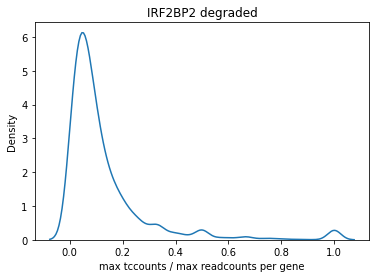

<Figure size 432x288 with 0 Axes>

In [96]:
# what is the average of highly transcribed genes
# tccounts/readcounts where sum of readcounts in all samples > 30 
a = tccounts[readcounts.sum(1)>30] / readcounts[readcounts.sum(1)>30]
a = a.fillna(0)
a = a.max(1).tolist() # max val per gene
a.sort()
print(len(a))
sns.kdeplot(a)
plt.xlabel("max tccounts / max readcounts per gene")
plt.title(project.replace("_", " ").split(" v")[0])
plt.show()

plt.savefig(res_dir+'plots/'+project+'_tccounts_readcounts_density.pdf', dpi=300)

In [97]:
np.median(a)

0.07692307692307693

In [72]:
np.median(a)

0.07792207792207792

In [98]:
# Save counts to csv
counts_file_prefix = project+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)

readcounts.to_csv(res_dir+counts_file_prefix+"_readcounts.csv",index=True, index_label="GENE")
print("Saved readcounts to: {}".format(res_dir+counts_file_prefix+"_readcounts.csv"))

tccounts.to_csv(res_dir+counts_file_prefix+"_tccounts.csv",index=True, index_label="GENE")
print("Saved tccounts to: {}".format(res_dir+counts_file_prefix+"_tccounts.csv"))

Saved readcounts to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/IRF2BP2_degraded_v1_0_5_readcounts.csv
Saved tccounts to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/IRF2BP2_degraded_v1_0_5_tccounts.csv


In [99]:
# Save counts to csv
counts_file_prefix = project+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)

readcounts.to_csv(res_dir+counts_file_prefix+"_readcounts.csv",index=True, index_label="GENE")
print("Saved readcounts to: {}".format(res_dir+counts_file_prefix+"_readcounts.csv"))

tccounts.to_csv(res_dir+counts_file_prefix+"_tccounts.csv",index=True, index_label="GENE")
print("Saved tccounts to: {}".format(res_dir+counts_file_prefix+"_tccounts.csv"))

Saved readcounts to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/IRF2BP2_degraded_v1_0_5_readcounts.csv
Saved tccounts to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/IRF2BP2_degraded_v1_0_5_tccounts.csv


### make more df (mean, median, etc.)

In [101]:
readcounts.columns.tolist()

['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount',
 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount',
 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount',
 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount',
 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount',
 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount',
 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount',
 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount',
 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount',
 'mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount',
 'mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount',
 'mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount',
 'mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount',
 'mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount',
 'mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount',
 'mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount']

In [102]:
print(set([i.split('-')[-2] for i in tccounts.columns]))
print(tccounts.columns[0].split('-', 1))
print(tccounts.columns[0].split('-', 1)[-1].rpartition("-")[0])
set([i.split('-', 1)[-1].rpartition("-")[0] for i in tccounts.columns])

{'VHL_6h', 'VHL_3h', 'DMSO_3h', 'DMSO_6h'}
['mr371', 'MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount']
MV411-IRF2BP2-dTAG-DMSO_3h


{'MV411-IRF2BP2-dTAG-DMSO_3h',
 'MV411-IRF2BP2-dTAG-DMSO_6h',
 'MV411-IRF2BP2-dTAG-VHL_3h',
 'MV411-IRF2BP2-dTAG-VHL_6h'}

In [103]:
# get mean counts per condition
mtccounts = pd.DataFrame()
mreadcounts = pd.DataFrame()
print(list(dict.fromkeys([i.split('-')[-2] for i in tccounts.columns]))) # conditions maintaing column order
for i in list(dict.fromkeys([i.split('-')[-2] for i in tccounts.columns])):
    print(i)
    mtccounts[i] = tccounts[[v for v in tccounts.columns if i in v]].mean(1)
    mreadcounts[i] = readcounts[[v for v in readcounts.columns if i in v]].mean(1)

['DMSO_3h', 'VHL_3h', 'DMSO_6h', 'VHL_6h']
DMSO_3h
VHL_3h
DMSO_6h
VHL_6h


In [104]:
# save mean counts files
mtccounts.to_csv(res_dir+counts_file_prefix+"_mean_tccounts.csv", index=True, index_label="GENE")
print("Saved mean tccounts to: {}".format(res_dir+counts_file_prefix+"_mean_tccounts.csv"))

mreadcounts.to_csv(res_dir+counts_file_prefix+"_mean_readcounts.csv", index=True, index_label="GENE")
print("Saved mean readcounts to: {}".format(res_dir+counts_file_prefix+"_mean_readcounts.csv"))

Saved mean tccounts to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/IRF2BP2_degraded_v1_0_5_mean_tccounts.csv
Saved mean readcounts to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/IRF2BP2_degraded_v1_0_5_mean_readcounts.csv


In [105]:
# get median counts per condition
mtccounts = pd.DataFrame()
mreadcounts = pd.DataFrame()
print(set([i.split('-')[-2] for i in tccounts.columns]))
for i in set([i.split('-')[-2] for i in tccounts.columns]):
    mtccounts[i] = tccounts[[v for v in tccounts.columns if i in v]].median(1)
    mreadcounts[i] = readcounts[[v for v in readcounts.columns if i in v]].median(1)

{'VHL_6h', 'VHL_3h', 'DMSO_3h', 'DMSO_6h'}


In [106]:
# save median counts files
mtccounts.to_csv(res_dir+counts_file_prefix+"_median_tccounts.csv", index=True, index_label="GENE")
print("Saved median tccounts to: {}".format(res_dir+counts_file_prefix+"_median_tccounts.csv"))

mreadcounts.to_csv(res_dir+counts_file_prefix+"_median_readcounts.csv", index=True, index_label="GENE")
print("Saved median readcounts to: {}".format(res_dir+counts_file_prefix+"_median_readcounts.csv"))

Saved median tccounts to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/IRF2BP2_degraded_v1_0_5_median_tccounts.csv
Saved median readcounts to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/IRF2BP2_degraded_v1_0_5_median_readcounts.csv


In [107]:
(tccounts/readcounts).fillna(0).iloc[:2]

,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount,mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount,mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount,mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount,mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount
NAT1,0.131004,0.118056,0.059322,0.023529,0.070000,0.013158,0.012658,0.023810,0.000000,0.000000,0.000000,0.007092,0.022989,0.000000,0.032258,0.011111
AAMP,0.027920,0.031401,0.017544,0.013812,0.015385,0.013641,0.019751,0.004739,0.007207,0.008107,0.007417,0.002195,0.002706,0.010766,0.013937,0.006103


In [108]:
# Save tccounts/readcounts file
(tccounts/readcounts).fillna(0).to_csv(res_dir+counts_file_prefix+"_tccounts_per_readcounts.csv")
print("Saved tccounts/readcounts to: {}".format(res_dir+counts_file_prefix+"_tccounts_per_readcounts.csv"))

Saved tccounts/readcounts to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/IRF2BP2_degraded_v1_0_5_tccounts_per_readcounts.csv


## Look at similarity accross replicates

we have some outliers, else it seems to make some sense and on average, to be extremelly similar!

In [86]:
tccounts.columns.tolist()

['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount',
 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount',
 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount',
 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount',
 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount',
 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount',
 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount',
 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount',
 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount',
 'mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount',
 'mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount',
 'mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount',
 'mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount',
 'mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount',
 'mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount',
 'mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount']

In [87]:
mkdir ../results/slamseq_$project/plots/

mkdir: cannot create directory ‘../results/slamseq_IRF2BP2_degraded_v1/plots/’: File exists


In [88]:
# tccounts MYC/total avg / readcounts MYC/total avg
(tccounts.loc["MYC"]/tccounts.mean(0)) /(readcounts.loc["MYC"]/readcounts.mean(0))

mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount     9.952882
mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount     9.286007
mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount    15.187418
mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount    17.883682
mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount     22.666855
mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount     18.740328
mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount     18.409692
mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount     21.560546
mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount    13.057479
mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount    13.314342
mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount    14.175486
mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount    12.295433
mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount     17.949624
mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount     23.627593
mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount     16.115475
mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount     23.333574
dtype: float64

In [89]:
[i.rpartition("_")[0] for i in tccounts.columns.tolist()] # name without _tccount
#tccounts.columns[0].split('-', 1)[-1].rpartition("-")[0]
[i.split("-")[-2] for i in tccounts.columns] # conditions

['DMSO_3h',
 'DMSO_3h',
 'DMSO_3h',
 'DMSO_3h',
 'VHL_3h',
 'VHL_3h',
 'VHL_3h',
 'VHL_3h',
 'DMSO_6h',
 'DMSO_6h',
 'DMSO_6h',
 'DMSO_6h',
 'VHL_6h',
 'VHL_6h',
 'VHL_6h',
 'VHL_6h']

#### plot formatting
- set font
- custom color palettes

In [10]:
from matplotlib.colors import LinearSegmentedColormap

palettelist = ["seismic"]
cmp_cylin = LinearSegmentedColormap.from_list("", ["#ffffff", "#e60000"]) #white to red
#sns.color_palette("light:#e60000", as_cmap=True) # similar
cmp_brewer = LinearSegmentedColormap.from_list("", ["#0000FF", "#FFFFFF", "#FF0000"]) #blue, white, red
cmp_usa = LinearSegmentedColormap.from_list("", ["#0000FF", "#FFFFFF", "#FF0000"][::-1]) #red, white, blue

In [11]:
import matplotlib as mpl
import matplotlib.font_manager

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['font.sans-serif'] = ["Arial"]

%matplotlib inline
import matplotlib.font_manager

font_settings = {
    "family" : "sans-serif",
    "sans-serif" : "Arial",
    "size" : 10
}

plt.rc("font", **font_settings)

### save plots to pdf

Replicate similarity plot saved to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/plots/IRF2BP2_degraded_v1_similarity_replicates_sorted_tccounts.pdf


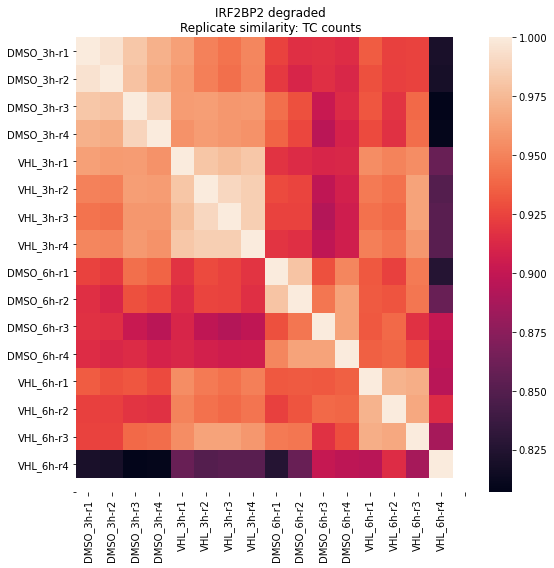

In [187]:
%matplotlib inline
import matplotlib.font_manager

font_settings = {
    "family" : "sans-serif",
    #"sans-serif" : "Arial",
    "size" : 10
}
plt.rc("font", **font_settings)

# tccounts
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(tccounts.corr(), 
            xticklabels=[i.rpartition("_")[0].split("-",4)[-1] for i in tccounts.columns], # condition w/ rep label
            yticklabels=[i.rpartition("_")[0].split("-",4)[-1] for i in tccounts.columns],
            ax=ax, cmap="rocket")#, vmin=0.9, vmax=1)
plt.title(project.replace("_", " ").split(" v")[0]+"\n"+"Replicate similarity: TC counts")
plt.tight_layout()

plt.savefig(res_dir+'plots/'+project+'_similarity_replicates_sorted_tccounts.pdf', dpi=300)

print("Replicate similarity plot saved to: {}".format(res_dir+'plots/'+project+
                                                      '_similarity_replicates_sorted_tccounts.pdf'))

Replicate similarity plot saved to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/plots/IRF2BP2_degraded_v1_similarity_replicates_sorted_readcounts.pdf


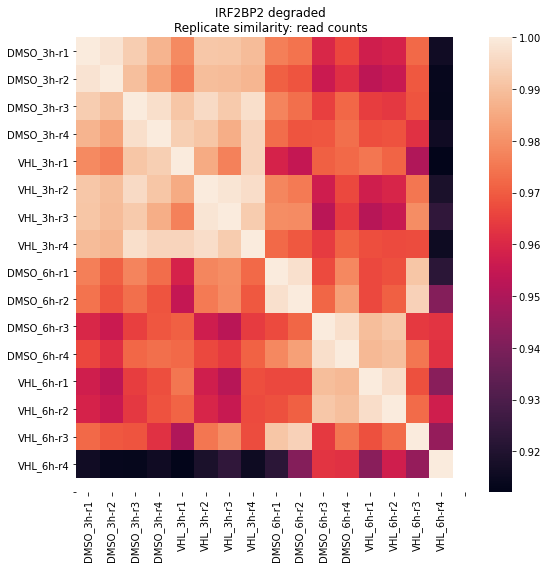

In [188]:
%matplotlib inline

# readcounts
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(readcounts.corr(), 
            xticklabels=[i.rpartition("_")[0].split("-",4)[-1] for i in tccounts.columns], # condition w/ replicate
            yticklabels=[i.rpartition("_")[0].split("-",4)[-1] for i in tccounts.columns],
            ax=ax)#, cmap=cmp_cylin), vmin=0.985, vmax=1)
plt.title(project.replace("_", " ").split(" v")[0]+"\n"+"Replicate similarity: read counts")
plt.tight_layout()

plt.savefig(res_dir+'plots/'+project+'_similarity_replicates_sorted_readcounts.pdf', dpi=300)

print("Replicate similarity plot saved to: {}".format(res_dir+'plots/'+project+
                                                      '_similarity_replicates_sorted_readcounts.pdf'))

## Get the Core TF information

In [94]:
ctf=pd.read_csv('../data/CRCs.txt',header=None)[0].values.tolist()
ctf

['CEBPA',
 'E2F3',
 'FLI1',
 'FOSL2',
 'GFI1',
 'HEX',
 'IRF8',
 'LYL1',
 'MEF2C',
 'MEF2D',
 'MEIS1',
 'MYB',
 'PLAGL2',
 'RUNX1',
 'RUNX2',
 'RXRA',
 'SP1',
 'SPI1',
 'SREBF1',
 'STAT5B',
 'TFAP4',
 'ZEB2',
 'ZFPM1',
 'ZNF281',
 'LMO2',
 'ZMYND8',
 'GATA2',
 'MAX',
 'MYC',
 'ETV6',
 'HOXA9']

# DESEQ Analysis

# Tccounts (ERCC)

## Read in counts

In [278]:
res_dir

'../results/slamseq_IRF2BP2_degraded_v1_res_v4/'

In [279]:
fh_readcounts = "IRF2BP2_degraded_v1_0_5_readcounts.csv"
fh_tccounts = "IRF2BP2_degraded_v1_0_5_tccounts.csv"

In [284]:
readcounts = pd.read_csv(res_dir+fh_readcounts, index_col=0)
tccounts = pd.read_csv(res_dir+fh_tccounts, index_col=0)

## Making design matrix

In [286]:
readcounts.iloc[:2]

,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount,mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount,mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount,mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount,mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount
GENE,,,,,,,,,,,,,,,,
NAT1,229,144,118,85,100,76,79,42,97,168,144,141,87,96,62,90
AAMP,1755,1242,855,724,650,953,962,422,1110,1727,809,911,739,836,1148,1147


In [287]:
readcounts["genes"] = readcounts.index
readcounts = readcounts.reset_index(drop=True)

tccounts["genes"] = tccounts.index
tccounts = tccounts.reset_index(drop=True)

In [289]:
tccounts.columns[:-1].tolist()

['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount',
 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount',
 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount',
 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount',
 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount',
 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount',
 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount',
 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount',
 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount',
 'mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount',
 'mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount',
 'mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount',
 'mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount',
 'mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount',
 'mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount',
 'mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount']

In [113]:
print(len(tccounts.columns[:-1].tolist()))
[i.rpartition("_")[0].split("-",4)[-1] for i in tccounts.columns[:-1]]

16


['DMSO_3h-r1',
 'DMSO_3h-r2',
 'DMSO_3h-r3',
 'DMSO_3h-r4',
 'VHL_3h-r1',
 'VHL_3h-r2',
 'VHL_3h-r3',
 'VHL_3h-r4',
 'DMSO_6h-r1',
 'DMSO_6h-r2',
 'DMSO_6h-r3',
 'DMSO_6h-r4',
 'VHL_6h-r1',
 'VHL_6h-r2',
 'VHL_6h-r3',
 'VHL_6h-r4']

In [290]:
# IRF2BP2 dTAG without genes
tccountsIRF2BP2 = tccounts[tccounts.columns[:-1]]

In [291]:
# IRF2BP2 dTAG 3h
designIRF2BP2_3h = pd.DataFrame(index= [i.replace('-','.') for i in tccountsIRF2BP2.columns], 
                         columns=['DMSO','VHL'], 
                         data=np.array([[1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
                                        [0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0]],dtype=bool).T)
designIRF2BP2_3h

,DMSO,VHL
mr371.MV411.IRF2BP2.dTAG.DMSO_3h.r1_tcount,True,False
mr372.MV411.IRF2BP2.dTAG.DMSO_3h.r2_tcount,True,False
mr373.MV411.IRF2BP2.dTAG.DMSO_3h.r3_tcount,True,False
mr374.MV411.IRF2BP2.dTAG.DMSO_3h.r4_tcount,True,False
mr375.MV411.IRF2BP2.dTAG.VHL_3h.r1_tcount,False,True
mr376.MV411.IRF2BP2.dTAG.VHL_3h.r2_tcount,False,True
mr377.MV411.IRF2BP2.dTAG.VHL_3h.r3_tcount,False,True
mr378.MV411.IRF2BP2.dTAG.VHL_3h.r4_tcount,False,True
mr379.MV411.IRF2BP2.dTAG.DMSO_6h.r1_tcount,False,False
mr380.MV411.IRF2BP2.dTAG.DMSO_6h.r2_tcount,False,False


In [292]:
# IRF2BP2 dTAG 6h
designIRF2BP2_6h = pd.DataFrame(index= [i.replace('-','.') for i in tccountsIRF2BP2.columns], 
                         columns=['DMSO','VHL'], 
                         data=np.array([[0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],
                                        [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]],dtype=bool).T)
designIRF2BP2_6h

,DMSO,VHL
mr371.MV411.IRF2BP2.dTAG.DMSO_3h.r1_tcount,False,False
mr372.MV411.IRF2BP2.dTAG.DMSO_3h.r2_tcount,False,False
mr373.MV411.IRF2BP2.dTAG.DMSO_3h.r3_tcount,False,False
mr374.MV411.IRF2BP2.dTAG.DMSO_3h.r4_tcount,False,False
mr375.MV411.IRF2BP2.dTAG.VHL_3h.r1_tcount,False,False
mr376.MV411.IRF2BP2.dTAG.VHL_3h.r2_tcount,False,False
mr377.MV411.IRF2BP2.dTAG.VHL_3h.r3_tcount,False,False
mr378.MV411.IRF2BP2.dTAG.VHL_3h.r4_tcount,False,False
mr379.MV411.IRF2BP2.dTAG.DMSO_6h.r1_tcount,True,False
mr380.MV411.IRF2BP2.dTAG.DMSO_6h.r2_tcount,True,False


### Differential gene expression analysis, PCA and GO-term enrichment

For gene-level analysis, raw reads mapped to different UTR annotations of the same gene were summed up by Entrez Gene ID. Pilot studies of K562 cells with kinase inhibitors were performed as single experiments. 

Analysis of differential gene expression was restricted to genes with ≥ 10 reads in at least one condition for 50bp sequencing runs (flavopiridol and DMSO) or ≥ 20 reads in at least one condition for 100bp sequencing runs (mk2206, trametinib, nilotinib, trametinib + mk2206 and DMSO). For estimating differential expression, a pseudo-count of 1 raw read was added to all genes.

__All other SLAM-seq experiments were performed in triplicates and analyzed as follows.__
Differential gene expression calling was performed on raw read counts with ≥ 2 T>C conversions using DESeq2 (version 1.14.1) with default settings, and with size factors estimated on corresponding total mRNA reads for global normalization.

Downstream analysis was restricted to genes passing all internal filters for FDR estimation by DESeq2. Principal component analysis was performed after variance
stabilizing transformation on the 500 most variable genes across all conditions of a given
experiment. GO-term enrichment analysis was performed on genes significantly and strongly downregulated (FDR ≤ 0.1, log2FC ≤ -1) in SLAM-seq upon IAA-treatment in K562MYC-AID + Tir1 by the PANTHER Overrepresentation Test (Fisher's Exact with FDR multiple test correction, release 20171205, http://pantherdb.org) on GO Ontology database Released 2017-12-27.

## Making DESeq object

In [117]:
scaling="ERCCsamplewise"

### IRF2BP2

#### IRF2BP2 3h

In [293]:
tccountsIRF2BP2 = tccounts[['genes']+list(tccountsIRF2BP2.columns)] # same as original tccounts

In [294]:
IRF2BP2_3h = [1,1,1,1,1,1,1,1,
              0,0,0,0,0,0,0,0] # get just 3h data
designIRF2BP2_3h[np.array(IRF2BP2_3h, bool)]

,DMSO,VHL
mr371.MV411.IRF2BP2.dTAG.DMSO_3h.r1_tcount,True,False
mr372.MV411.IRF2BP2.dTAG.DMSO_3h.r2_tcount,True,False
mr373.MV411.IRF2BP2.dTAG.DMSO_3h.r3_tcount,True,False
mr374.MV411.IRF2BP2.dTAG.DMSO_3h.r4_tcount,True,False
mr375.MV411.IRF2BP2.dTAG.VHL_3h.r1_tcount,False,True
mr376.MV411.IRF2BP2.dTAG.VHL_3h.r2_tcount,False,True
mr377.MV411.IRF2BP2.dTAG.VHL_3h.r3_tcount,False,True
mr378.MV411.IRF2BP2.dTAG.VHL_3h.r4_tcount,False,True


__Genes as first column__

In [295]:
# IRF2BP2 dTAG 3h
IRF2BP2_3h = [1,1,1,1,1,1,1,1,
              0,0,0,0,0,0,0,0] # get just 3h data
deseqIRF2BP2_3h = pyDESeq2.pyDESeq2(count_matrix=tccountsIRF2BP2[tccountsIRF2BP2.columns[np.array([1]+IRF2BP2_3h, bool)]], 
                                    design_matrix=designIRF2BP2_3h[np.array(IRF2BP2_3h, bool)],
                                    design_formula="~DMSO - VHL",
                                    gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.4.5


#### IRF2BP2 6h

In [296]:
IRF2BP2_6h = [0,0,0,0,0,0,0,0,
              1,1,1,1,1,1,1,1] # get just 6h data
designIRF2BP2_6h[np.array(IRF2BP2_6h, bool)]

,DMSO,VHL
mr379.MV411.IRF2BP2.dTAG.DMSO_6h.r1_tcount,True,False
mr380.MV411.IRF2BP2.dTAG.DMSO_6h.r2_tcount,True,False
mr381.MV411.IRF2BP2.dTAG.DMSO_6h.r3_tcount,True,False
mr382.MV411.IRF2BP2.dTAG.DMSO_6h.r4_tcount,True,False
mr383.MV411.IRF2BP2.dTAG.VHL_6h.r1_tcount,False,True
mr384.MV411.IRF2BP2.dTAG.VHL_6h.r2_tcount,False,True
mr385.MV411.IRF2BP2.dTAG.VHL_6h.r3_tcount,False,True
mr386.MV411.IRF2BP2.dTAG.VHL_6h.r4_tcount,False,True


__Genes as first column__

In [297]:
# IRF2BP2 dTAG 6h
IRF2BP2_6h = [0,0,0,0,0,0,0,0,
              1,1,1,1,1,1,1,1] # get just 6h data
deseqIRF2BP2_6h = pyDESeq2.pyDESeq2(count_matrix=tccountsIRF2BP2[tccountsIRF2BP2.columns[np.array([1]+IRF2BP2_6h, bool)]], 
                                    design_matrix=designIRF2BP2_6h[np.array(IRF2BP2_6h, bool)],
                                    design_formula="~DMSO - VHL",
                                    gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.4.5


## Estimating size factors

In [298]:
scaling="ERCCsamplewise"

### IRF2BP2

In [299]:
readcounts[tccountsIRF2BP2.columns[np.array([0,1,1,1,1,0,0,0,0,
                                               0,0,0,0,0,0,0,0], bool)]].iloc[:1]

,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount
0,229,144,118,85


In [300]:
# IRF2BP2 3h
deseqIRF2BP2_3h.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcounts[tccountsIRF2BP2.columns[[False]+designIRF2BP2_3h.iloc[:,0].tolist()]].values+1), 1)))

In [301]:
# IRF2BP2 6h
deseqIRF2BP2_6h.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcounts[tccountsIRF2BP2.columns[[False]+designIRF2BP2_6h.iloc[:,0].tolist()]].values+1), 1)))

## Modifying size factors

#### Get ERCC reads

read in pseudocounts

In [302]:
# read in ERCC pseudocounts
res = pd.read_csv(res_dir+project+"_scaling_factors.csv", index_col=0, header=None, squeeze=True)
res

0
ERCC_mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam    0.141383
ERCC_mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam    0.127182
ERCC_mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam    0.154548
ERCC_mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam    0.144757
ERCC_mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered.bam     0.149934
ERCC_mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.bam     0.147073
ERCC_mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered.bam     0.158908
ERCC_mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered.bam     0.156842
ERCC_mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered.bam    0.254134
ERCC_mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered.bam    0.261652
ERCC_mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_filtered.bam    0.282215
ERCC_mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_filtered.bam    0.293921
ERCC_mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_filtered.bam     0.278928
ERCC_mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_filtered.bam     0.284748
ERCC_mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_filtered.bam     0.274827
ERCC_mr3

#### IRF2BP2 3hr

In [303]:
# IRF2BP2 3h
sizeFact = deseqIRF2BP2_3h.getSizeFactors()
sizeFact[4:] = sizeFact[4:] * (res[[i for i in res.index if '-VHL_3h-' in i]].values/
                               res[[i for i in res.index if '-DMSO_3h-' in i]].values.mean())
deseqIRF2BP2_3h.setSizeFactors(sizeFact)

In [236]:
# IRF2BP2 3h
# VHL size factor * adjusted VHL res (VHL res per sample / average DMSO res)
sizeFact = deseqIRF2BP2_3h.getSizeFactors()
print(sizeFact)

# VHL res per sample / average DMSO res
print((res[[i for i in res.index if '-VHL_3h-' in i]].values/
       res[[i for i in res.index if '-DMSO_3h-' in i]].values.mean()))


sizeFact[4:] = sizeFact[4:] * (res[[i for i in res.index if '-VHL_3h-' in i]].values/
                               res[[i for i in res.index if '-DMSO_3h-' in i]].values.mean())
print(sizeFact)

#deseqIRF2BP2_3h.setSizeFactors(sizeFact)

array([3.60742631, 2.6973161 , 1.19301079, 0.7924415 , 0.56664087,
       0.74571352, 0.80992795, 0.42975055])

#### IRF2BP2 6h

In [304]:
# IRF2BP2 6h
sizeFact = deseqIRF2BP2_6h.getSizeFactors()
# VHL size factor * adjusted VHL res (VHL res per sample / average DMSO res)
sizeFact[4:] = sizeFact[4:] * (res[[i for i in res.index if '-VHL_6h-' in i]].values/
                               res[[i for i in res.index if '-DMSO_6h-' in i]].values.mean())
deseqIRF2BP2_6h.setSizeFactors(sizeFact)

In [147]:
# IRF2BP2 6h
sizeFact = deseqIRF2BP2_6h.getSizeFactors()
print(sizeFact)

# VHL res per sample / average DMSO res
print((res[[i for i in res.index if '-VHL_6h-' in i]].values/
       res[[i for i in res.index if '-DMSO_6h-' in i]].values.mean()))

# VHL size factor * adjusted VHL res (VHL res per sample / average DMSO res)
sizeFact[4:] = sizeFact[4:] * (res[[i for i in res.index if '-VHL_6h-' in i]].values/
                               res[[i for i in res.index if '-DMSO_6h-' in i]].values.mean())
print(sizeFact)

deseqIRF2BP2_6h.setSizeFactors(sizeFact)

array([1.21777242, 1.48177961, 0.78755679, 0.77367671, 1.02003096,
       0.84211284, 1.63695311, 0.64682823])

## running it

#### IRF2BP2 3h

In [306]:
deseqIRF2BP2_3h.run_deseq()
deseqIRF2BP2_3h.get_deseq_result()

resIRF2BP2_3h = deseqIRF2BP2_3h.deseq_result
resIRF2BP2_3h.pvalue = np.nan_to_num(np.array(resIRF2BP2_3h.pvalue), 1)
resIRF2BP2_3h.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_3h.log2FoldChange), 0)
resIRF2BP2_3h.log2FoldChange = -resIRF2BP2_3h.log2FoldChange
resIRF2BP2_3h["gene_id"] = resIRF2BP2_3h.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



#### IRF2BP2 6h

In [309]:
deseqIRF2BP2_6h.run_deseq()
deseqIRF2BP2_6h.get_deseq_result()

resIRF2BP2_6h = deseqIRF2BP2_6h.deseq_result
resIRF2BP2_6h.pvalue = np.nan_to_num(np.array(resIRF2BP2_6h.pvalue), 1)
resIRF2BP2_6h.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_6h.log2FoldChange), 0)
resIRF2BP2_6h.log2FoldChange = -resIRF2BP2_6h.log2FoldChange
resIRF2BP2_6h["gene_id"] = resIRF2BP2_6h.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



# Save DESeq results

In [311]:
resIRF2BP2_3h.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,5.033275,-0.560236,0.738146,0.758978,0.447866,NaN,NAT1,NAT1
1,14.553492,0.310173,0.385307,-0.805000,0.420819,0.652557,AAMP,AAMP


In [312]:
resIRF2BP2_6h.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,0.680859,1.837568,1.883650,-0.975536,0.329294,NaN,NAT1,NAT1
1,6.905901,0.116781,0.620705,-0.188142,0.850765,NaN,AAMP,AAMP


In [313]:
scaling="ERCCsamplewise"
print(res_dir)

../results/slamseq_IRF2BP2_degraded_v1_res_v4/


In [314]:
# tccounts (3h)
cond = "3h"

deseq_res_file = "{}_deseq_tccounts.csv".format("_".join(filter(None, [project, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
resIRF2BP2_3h.to_csv("../results/{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: {}".format(deseq_res_file))

Saved DESeq results to: IRF2BP2_degraded_v1_ERCCsamplewise_0_5_3h_deseq_tccounts.csv


In [315]:
# tccounts (6h)
cond = "6h"

deseq_res_file = "{}_deseq_tccounts.csv".format("_".join(filter(None, [project, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
resIRF2BP2_6h.to_csv("../results/{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: {}".format(deseq_res_file))

Saved DESeq results to: IRF2BP2_degraded_v1_ERCCsamplewise_0_5_6h_deseq_tccounts.csv


# PLOTS

__read in DESeq results__

In [267]:
print(res_dir)

../results/slamseq_IRF2BP2_degraded_v1_res_v4/


In [268]:
fh_3h = "IRF2BP2_degraded_v1_ERCCsamplewise_0_5_3h_deseq_tccounts.csv"
fh_6h = "IRF2BP2_degraded_v1_ERCCsamplewise_0_5_6h_deseq_tccounts.csv"

In [272]:
pd.read_csv(res_dir+fh_3h, index_col=None, squeeze=True)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,5.033275,-0.560236,0.738146,0.758978,0.447866,NaN,0,0
1,14.553492,0.310173,0.385307,-0.805000,0.420819,0.652557,1,1
2,16.200285,-0.137228,0.397484,0.345242,0.729912,0.858129,2,2
3,1.693745,-0.949985,1.259145,0.754469,0.450568,NaN,3,3
4,6.337421,-0.445437,0.569019,0.782816,0.433735,NaN,4,4
...,...,...,...,...,...,...,...,...
15627,10.760287,-0.362058,0.483487,0.748847,0.453949,NaN,15627,15627
15628,0.034651,0.820424,3.527183,-0.232600,0.816072,NaN,15628,15628
15629,2.751684,-0.743234,0.932833,0.796749,0.425597,NaN,15629,15629
15630,1.154404,-0.864564,1.416141,0.610507,0.541526,NaN,15630,15630


In [270]:
resIRF2BP2_3h.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,98.963183,-0.356153,0.180224,1.976171,0.048135,0.568317,NAT1,NAT1
1,873.879931,-0.038514,0.117362,0.328163,0.742788,0.975598,AAMP,AAMP
2,1427.594895,0.083566,0.107448,-0.777735,0.436725,0.912713,AARS1,AARS1
3,57.699728,-0.254772,0.204848,1.243710,0.213606,0.821691,ABAT,ABAT
4,201.619834,0.176723,0.155127,-1.139213,0.254615,0.845194,ABCA1,ABCA1


### whisker's plots

#### Get CRCs

In [158]:
crc = pd.read_csv('../data/CRCs.txt',header=None)[0].values.tolist()
print(len(crc))
print(crc)

31
['CEBPA', 'E2F3', 'FLI1', 'FOSL2', 'GFI1', 'HEX', 'IRF8', 'LYL1', 'MEF2C', 'MEF2D', 'MEIS1', 'MYB', 'PLAGL2', 'RUNX1', 'RUNX2', 'RXRA', 'SP1', 'SPI1', 'SREBF1', 'STAT5B', 'TFAP4', 'ZEB2', 'ZFPM1', 'ZNF281', 'LMO2', 'ZMYND8', 'GATA2', 'MAX', 'MYC', 'ETV6', 'HOXA9']


#### IRF2BP2 3h

In [159]:
%matplotlib inline

In [160]:
resIRF2BP2_3h.baseMean.quantile([0,0.45,0.5,0.75,1])

0.00       0.000000
0.45       3.737779
0.50       5.349618
0.75      23.382804
1.00    1905.753525
Name: baseMean, dtype: float64

In [161]:
# DESeq results
# baseMean: normalized counts of all samples, normalizing for seqencing depth
res = resIRF2BP2_3h[resIRF2BP2_3h.baseMean>10]
res.baseMean= np.log2(1+res.baseMean)
res["type"] = ['crc' if i else "other" for i in  res.genes.isin(crc)]
res.head()

/home/monika/anaconda3/envs/slamseq/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id,type
1,3.959167,0.310173,0.385307,-0.805000,0.420819,0.652557,AAMP,AAMP,other
2,4.104361,-0.137228,0.397484,0.345242,0.729912,0.858129,AARS1,AARS1,other
8,6.058971,-0.044708,0.192878,0.231797,0.816696,0.905526,ABCF1,ABCF1,other
9,6.273035,0.141025,0.179791,-0.784381,0.432817,0.663404,ABL1,ABL1,other
11,6.017271,-0.564888,0.204182,2.766598,0.005664,0.063313,ABL2,ABL2,other


Saved box and whisker plot to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4//plots/IRF2BP2_degraded_v1_ERCCsamplewise_whiskersIRF2BP2_3h_logfch.pdf


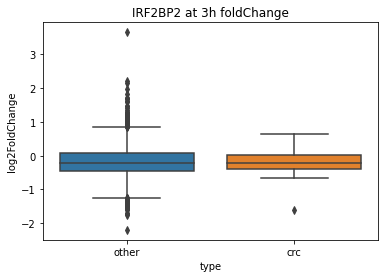

In [162]:
ax = sns.boxplot(data=res,x='type',y='log2FoldChange').set_title("IRF2BP2 at 3h foldChange")
fig_file = res_dir+"plots/"+project+"_"+scaling+"_whiskersIRF2BP2_3h_logfch.pdf"
ax.figure.savefig(fig_file)
print("Saved box and whisker plot to: {}".format(fig_file))

Saved box and whisker plot to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/plots/IRF2BP2_degraded_v1_ERCCsamplewise_whiskersIRF2BP2_3h_baseMean.pdf


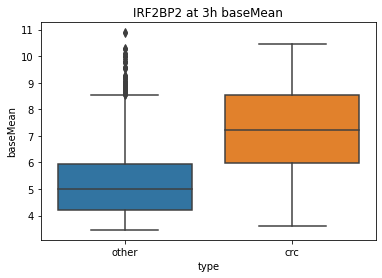

In [163]:
ax =sns.boxplot(data=res,x='type',y='baseMean').set_title("IRF2BP2 at 3h baseMean")
fig_file = res_dir+"plots/"+project+"_"+scaling+"_whiskersIRF2BP2_3h_baseMean.pdf"
ax.figure.savefig(fig_file)
print("Saved box and whisker plot to: {}".format(fig_file))

#### IRF2BP2 6h

In [164]:
resIRF2BP2_6h.baseMean.quantile([0,0.45,0.5,0.75,1])

0.00      0.000000
0.45      1.533233
0.50      2.170887
0.75      8.689184
1.00    794.994696
Name: baseMean, dtype: float64

In [165]:
# DESeq results
# baseMean: normalized counts of all samples, normalizing for seqencing depth
res = resIRF2BP2_6h[resIRF2BP2_6h.baseMean>10]
res.baseMean= np.log2(1+res.baseMean)
res["type"] = ['crc' if i else "other" for i in  res.genes.isin(crc)]
res.head()

/home/monika/anaconda3/envs/slamseq/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id,type
2,3.578154,-0.051282,0.523525,0.097956,0.921967,NaN,AARS1,AARS1,other
8,4.500881,0.106170,0.375024,-0.283102,0.777098,NaN,ABCF1,ABCF1,other
9,4.760844,-0.802581,0.347110,2.312182,0.020768,NaN,ABL1,ABL1,other
11,4.427045,-0.299405,0.394579,0.758796,0.447975,NaN,ABL2,ABL2,other
12,5.163764,0.022125,0.315529,-0.070119,0.944099,0.963819,ABR,ABR,other


Saved box and whisker plot to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/plots/IRF2BP2_degraded_v1_ERCCsamplewise_whiskersIRF2BP2_6h_logfch.pdf


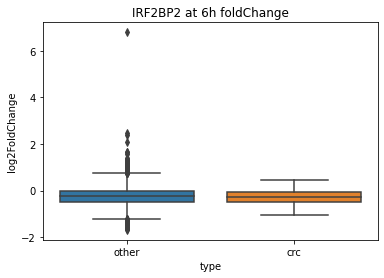

In [167]:
ax = sns.boxplot(data=res,x='type',y='log2FoldChange').set_title("IRF2BP2 at 6h foldChange")
fig_file = res_dir+"plots/"+project+"_"+scaling+"_whiskersIRF2BP2_6h_logfch.pdf"
ax.figure.savefig(fig_file)
print("Saved box and whisker plot to: {}".format(fig_file))

Saved box and whisker plot to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4/plots/IRF2BP2_degraded_v1_ERCCsamplewise_whiskersIRF2BP2_6h_baseMean.pdf


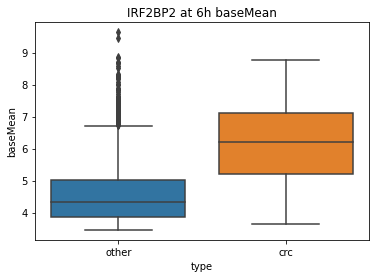

In [168]:
ax =sns.boxplot(data=res,x='type',y='baseMean').set_title("IRF2BP2 at 6h baseMean")
fig_file = res_dir+"plots/"+project+"_"+scaling+"_whiskersIRF2BP2_6h_baseMean.pdf"
ax.figure.savefig(fig_file)
print("Saved box and whisker plot to: {}".format(fig_file))

## Scatter plot comparison

#### IRF2BP2 3h vs 6h

In [169]:
mix = pd.DataFrame()
mix["gene_id"] = resIRF2BP2_3h["gene_id"]
mix['IRF2BP2 3h'] = resIRF2BP2_3h.log2FoldChange
mix['IRF2BP2 6h'] = resIRF2BP2_6h.log2FoldChange

In [170]:
print(mix.shape)
mix.head()

(15632, 3)


,gene_id,IRF2BP2 3h,IRF2BP2 6h
0,NAT1,-0.560236,1.837568
1,AAMP,0.310173,0.116781
2,AARS1,-0.137228,-0.051282
3,ABAT,-0.949985,-1.138554
4,ABCA1,-0.445437,-1.166597


In [171]:
scatter_folder = res_dir+'plots/'+project+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)+"_"
print(scatter_folder)


genepyPlot.scatter(mix[['IRF2BP2 3h', 'IRF2BP2 6h']].values[:12000],
                   mix['gene_id'].values.tolist()[:12000], radi= 0.06, alpha=0.3,
                   colors = [0 if i in crc else 1 for i in mix['gene_id'].values.tolist()[:12000]],
                   xname="IRF2BP2 3h", yname="IRF2BP2 6h",
                   folder=scatter_folder,
                   title='IRF2BP2 3h vs 6h differences in logFoldChange')

../results/slamseq_IRF2BP2_degraded_v1_res_v4/plots/IRF2BP2_degraded_v1_ERCCsamplewise_0_5


/home/monika/anaconda3/envs/slamseq/lib/python3.8/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/home/monika/anaconda3/envs/slamseq/lib/python3.8/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


RuntimeError: Neither firefox and geckodriver nor a variant of chromium browser and chromedriver are available on system PATH. You can install the former with 'conda install -c conda-forge firefox geckodriver'.

## Regular volcanos

In [172]:
from genepy.utils import helper as h
from genepy.utils import plot as genepyPlot
from genepy.rna import pyDESeq2
import genepy.rna as rna

#### IRF2BP2 3h

In [173]:
res_file = res_dir+"/"+project+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)+'_IRF2BP2_3h_deseq.csv'
resIRF2BP2_3h.to_csv(res_file)

print("Saved DESeq results to: {}".format(res_file))

Saved DESeq results to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4//IRF2BP2_degraded_v1_ERCCsamplewise_0_5_IRF2BP2_3h_deseq.csv


In [174]:
resIRF2BP2_3h.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,5.033275,-0.560236,0.738146,0.758978,0.447866,NaN,NAT1,NAT1
1,14.553492,0.310173,0.385307,-0.805000,0.420819,0.652557,AAMP,AAMP
2,16.200285,-0.137228,0.397484,0.345242,0.729912,0.858129,AARS1,AARS1
3,1.693745,-0.949985,1.259145,0.754469,0.450568,NaN,ABAT,ABAT
4,6.337421,-0.445437,0.569019,0.782816,0.433735,NaN,ABCA1,ABCA1


In [180]:
volcano_folder = res_dir+"/plots/{0}_{1}_{2}_{3}_".format(project, scaling, minvar_toremove, mincount_toremove)
print(volcano_folder)

genepyPlot.volcano(resIRF2BP2_3h, tohighlight=crc, searchbox=False,
                   title='MV411 IRF2BP2 dTAG at 3h',
                   folder=volcano_folder)

../results/slamseq_IRF2BP2_degraded_v1_res_v4//plots/IRF2BP2_degraded_v1_ERCCsamplewise_0_5_


/home/monika/anaconda3/envs/slamseq/lib/python3.8/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/home/monika/anaconda3/envs/slamseq/lib/python3.8/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


RuntimeError: Neither firefox and geckodriver nor a variant of chromium browser and chromedriver are available on system PATH. You can install the former with 'conda install -c conda-forge firefox geckodriver'.

#### IRF2BP2 6h

In [177]:
res_file = res_dir+"/"+project+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)+'_IRF2BP2_6h_deseq.csv'
resIRF2BP2_6h.to_csv(res_file)

print("Saved DESeq results to: {}".format(res_file))

Saved DESeq results to: ../results/slamseq_IRF2BP2_degraded_v1_res_v4//IRF2BP2_degraded_v1_ERCCsamplewise_0_5_IRF2BP2_6h_deseq.csv


In [183]:
volcano_folder = res_dir+"/plots/{0}_{1}_{2}_{3}_".format(project, scaling, minvar_toremove, mincount_toremove)
#volcano_folder = '../results/'+project+'/plots/'+project+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)
print(volcano_folder)

genepyPlot.volcano(resIRF2BP2_6h, tohighlight=crc, searchbox=False, 
                   title='MV411 IRF2BP2 dTAG at 6h', 
                   folder=volcano_folder)

../results/slamseq_IRF2BP2_degraded_v1_res_v4//plots/IRF2BP2_degraded_v1_ERCCsamplewise_0_5_


/home/monika/anaconda3/envs/slamseq/lib/python3.8/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/home/monika/anaconda3/envs/slamseq/lib/python3.8/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


RuntimeError: Neither firefox and geckodriver nor a variant of chromium browser and chromedriver are available on system PATH. You can install the former with 'conda install -c conda-forge firefox geckodriver'.

# Readcounts (ERCC)

In [320]:
fh_readcounts = "IRF2BP2_degraded_v1_0_5_readcounts.csv"
fh_tccounts = "IRF2BP2_degraded_v1_0_5_tccounts.csv"

In [321]:
readcounts = pd.read_csv(res_dir+fh_readcounts, index_col=0)
tccounts = pd.read_csv(res_dir+fh_tccounts, index_col=0)

In [324]:
readcounts["genes"] = readcounts.index
readcounts = readcounts.reset_index(drop=True)

tccounts["genes"] = tccounts.index
tccounts = tccounts.reset_index(drop=True)

### Make DESeq obj

In [325]:
readcountsIRF2BP2 = readcounts[['genes']+list(readcounts.columns)[:-1]] # same as original tccounts

In [326]:
readcountsIRF2BP2[readcountsIRF2BP2.columns[np.array([1]+IRF2BP2_3h, bool)]].iloc[:1]

,genes,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount
0,NAT1,229,144,118,85,100,76,79,42


In [327]:
# IRF2BP2 dTAG 3h
IRF2BP2_3h = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0] # get just 3h data
deseqIRF2BP2_3h = pyDESeq2.pyDESeq2(count_matrix=readcountsIRF2BP2[readcountsIRF2BP2.columns[np.array([1]+IRF2BP2_3h, bool)]], 
                                    design_matrix=designIRF2BP2_3h[np.array(IRF2BP2_3h, bool)],
                                    design_formula="~DMSO - VHL",
                                    gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.4.5


In [328]:
# IRF2BP2 dTAG 6h
IRF2BP2_6h = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1] # get just 6h data
deseqIRF2BP2_6h = pyDESeq2.pyDESeq2(count_matrix=readcountsIRF2BP2[readcountsIRF2BP2.columns[np.array([1]+IRF2BP2_6h, bool)]], 
                                    design_matrix=designIRF2BP2_6h[np.array(IRF2BP2_6h, bool)],
                                    design_formula="~DMSO - VHL",
                                    gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.4.5


### Estimate size factors

In [329]:
scaling="ERCCsamplewise"

In [330]:
deseqIRF2BP2_3h.run_estimate_size_factors()

In [331]:
deseqIRF2BP2_6h.run_estimate_size_factors()

### Modify size factors

### Get ERCC reads

In [332]:
# read in ERCC pseudocounts
res = pd.read_csv(res_dir+project+"_scaling_factors.csv", index_col=0, header=None, squeeze=True)
res

0
ERCC_mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam    0.141383
ERCC_mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam    0.127182
ERCC_mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam    0.154548
ERCC_mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam    0.144757
ERCC_mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered.bam     0.149934
ERCC_mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.bam     0.147073
ERCC_mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered.bam     0.158908
ERCC_mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered.bam     0.156842
ERCC_mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered.bam    0.254134
ERCC_mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered.bam    0.261652
ERCC_mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_filtered.bam    0.282215
ERCC_mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_filtered.bam    0.293921
ERCC_mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_filtered.bam     0.278928
ERCC_mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_filtered.bam     0.284748
ERCC_mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_filtered.bam     0.274827
ERCC_mr3

IRF2BP2 3h

In [333]:
# IRF2BP2 dTAG 3h (readcounts)
sizeFact = deseqIRF2BP2_3h.getSizeFactors()

In [334]:
sizeFact

array([1.83423956, 1.3230634 , 1.05638513, 0.86303386, 0.87166333,
       1.03087387, 0.95762408, 0.54626736])

In [335]:
# VHL size factor * adjusted VHL res (VHL res per sample / average DMSO res)
sizeFact[4:] = sizeFact[4:] * (res[[i for i in res.index if '-VHL_3h-' in i]].values/
                               res[[i for i in res.index if '-DMSO_3h-' in i]].values.mean())
sizeFact

array([1.83423956, 1.3230634 , 1.05638513, 0.86303386, 0.92057567,
       1.06794527, 1.07189477, 0.60350047])

In [336]:
deseqIRF2BP2_3h.setSizeFactors(sizeFact)

IRF2BP2 6h

In [337]:
# IRF2BP2 dTAG 6h (readcounts)
sizeFact = deseqIRF2BP2_6h.getSizeFactors()
sizeFact

array([1.12848781, 1.61197946, 0.90619756, 1.04646596, 0.81033549,
       0.78015917, 0.99469773, 0.99281636])

In [338]:
# VHL size factor * adjusted VHL res (VHL res per sample / average DMSO res)
sizeFact[4:] = sizeFact[4:] * (res[[i for i in res.index if '-VHL_6h-' in i]].values/
                               res[[i for i in res.index if '-DMSO_6h-' in i]].values.mean())
sizeFact

array([1.12848781, 1.61197946, 0.90619756, 1.04646596, 0.82799059,
       0.81379037, 1.00142619, 1.5020795 ])

In [339]:
deseqIRF2BP2_6h.setSizeFactors(sizeFact)

### Running DESeq

In [340]:
# IRF2BP2 dTAG 3h (readcounts)
deseqIRF2BP2_3h.run_deseq()
deseqIRF2BP2_3h.get_deseq_result()

resIRF2BP2_3h = deseqIRF2BP2_3h.deseq_result
resIRF2BP2_3h.pvalue = np.nan_to_num(np.array(resIRF2BP2_3h.pvalue), 1)
resIRF2BP2_3h.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_3h.log2FoldChange), 0)
resIRF2BP2_3h.log2FoldChange = -resIRF2BP2_3h.log2FoldChange
resIRF2BP2_3h["gene_id"] = resIRF2BP2_3h.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [341]:
# IRF2BP2 dTAG 6h (readcounts)
deseqIRF2BP2_6h.run_deseq()
deseqIRF2BP2_6h.get_deseq_result()

resIRF2BP2_6h = deseqIRF2BP2_6h.deseq_result
resIRF2BP2_6h.pvalue = np.nan_to_num(np.array(resIRF2BP2_6h.pvalue), 1)
resIRF2BP2_6h.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_6h.log2FoldChange), 0)
resIRF2BP2_6h.log2FoldChange = -resIRF2BP2_6h.log2FoldChange
resIRF2BP2_6h["gene_id"] = resIRF2BP2_6h.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



### Saving DESeq results

In [342]:
resIRF2BP2_3h.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,95.870596,-0.461812,0.183899,2.511222,0.012031,0.176482,NAT1,NAT1
1,842.371621,-0.147606,0.118079,1.250062,0.211277,0.621102,AAMP,AAMP


In [343]:
resIRF2BP2_6h.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,103.586147,-0.495839,0.294891,1.681433,0.092679,0.741276,NAT1,NAT1
1,956.006016,0.002756,0.174688,-0.015775,0.987414,0.998170,AAMP,AAMP


In [344]:
scaling="ERCCsamplewise"
print(res_dir)

../results/slamseq_IRF2BP2_degraded_v1_res_v4/


In [345]:
# readcounts (3h)
cond = "3h"

deseq_res_file = "{}_deseq_readcounts.csv".format("_".join(filter(None, [project, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
resIRF2BP2_3h.to_csv("{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: {}".format(deseq_res_file))

Saved DESeq results to: IRF2BP2_degraded_v1_ERCCsamplewise_0_5_3h_deseq_readcounts.csv


In [346]:
# readcounts (6h)
cond = "6h"

deseq_res_file = "{}_deseq_readcounts.csv".format("_".join(filter(None, [project, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
resIRF2BP2_6h.to_csv("{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: {}".format(deseq_res_file))

Saved DESeq results to: IRF2BP2_degraded_v1_ERCCsamplewise_0_5_6h_deseq_readcounts.csv


# Tccounts unscaled

In [244]:
# IRF2BP2 dTAG 3h
designIRF2BP2_3h = pd.DataFrame(index=[i.replace('-','.') for i in tccounts.columns[:-1]], 
                         columns=['DMSO','VHL'], 
                         data=np.array([[1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
                                        [0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0]],dtype=bool).T)
designIRF2BP2_3h

,DMSO,VHL
mr371.MV411.IRF2BP2.dTAG.DMSO_3h.r1_tcount,True,False
mr372.MV411.IRF2BP2.dTAG.DMSO_3h.r2_tcount,True,False
mr373.MV411.IRF2BP2.dTAG.DMSO_3h.r3_tcount,True,False
mr374.MV411.IRF2BP2.dTAG.DMSO_3h.r4_tcount,True,False
mr375.MV411.IRF2BP2.dTAG.VHL_3h.r1_tcount,False,True
mr376.MV411.IRF2BP2.dTAG.VHL_3h.r2_tcount,False,True
mr377.MV411.IRF2BP2.dTAG.VHL_3h.r3_tcount,False,True
mr378.MV411.IRF2BP2.dTAG.VHL_3h.r4_tcount,False,True
mr379.MV411.IRF2BP2.dTAG.DMSO_6h.r1_tcount,False,False
mr380.MV411.IRF2BP2.dTAG.DMSO_6h.r2_tcount,False,False


In [245]:
# IRF2BP2 dTAG 6h
designIRF2BP2_6h = pd.DataFrame(index=[i.replace('-','.') for i in tccounts.columns[:-1]], 
                         columns=['DMSO','VHL'], 
                         data=np.array([[0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],
                                        [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]],dtype=bool).T)
designIRF2BP2_6h

,DMSO,VHL
mr371.MV411.IRF2BP2.dTAG.DMSO_3h.r1_tcount,False,False
mr372.MV411.IRF2BP2.dTAG.DMSO_3h.r2_tcount,False,False
mr373.MV411.IRF2BP2.dTAG.DMSO_3h.r3_tcount,False,False
mr374.MV411.IRF2BP2.dTAG.DMSO_3h.r4_tcount,False,False
mr375.MV411.IRF2BP2.dTAG.VHL_3h.r1_tcount,False,False
mr376.MV411.IRF2BP2.dTAG.VHL_3h.r2_tcount,False,False
mr377.MV411.IRF2BP2.dTAG.VHL_3h.r3_tcount,False,False
mr378.MV411.IRF2BP2.dTAG.VHL_3h.r4_tcount,False,False
mr379.MV411.IRF2BP2.dTAG.DMSO_6h.r1_tcount,True,False
mr380.MV411.IRF2BP2.dTAG.DMSO_6h.r2_tcount,True,False


### make DESeq obj

In [349]:
tccountsIRF2BP2[tccountsIRF2BP2.columns[np.array([1]+IRF2BP2_3h, bool)]].iloc[:1]

,genes,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount
0,NAT1,30,17,7,2,7,1,1,1


In [350]:
# IRF2BP2 dTAG 3h
IRF2BP2_3h = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0] # get just 3h data
deseqIRF2BP2_3h = pyDESeq2.pyDESeq2(count_matrix=tccountsIRF2BP2[tccountsIRF2BP2.columns[np.array([1]+IRF2BP2_3h, bool)]], 
                                    design_matrix=designIRF2BP2_3h[np.array(IRF2BP2_3h, bool)],
                                    design_formula="~DMSO - VHL",
                                    gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.4.5


In [351]:
# IRF2BP2 dTAG 6h
IRF2BP2_6h = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1] # get just 6h data
deseqIRF2BP2_6h = pyDESeq2.pyDESeq2(count_matrix=tccountsIRF2BP2[tccountsIRF2BP2.columns[np.array([1]+IRF2BP2_6h, bool)]], 
                                    design_matrix=designIRF2BP2_6h[np.array(IRF2BP2_6h, bool)],
                                    design_formula="~DMSO - VHL",
                                    gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.4.5


### estimate size factors

In [352]:
# IRF2BP2 3h
deseqIRF2BP2_3h.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcounts[tccountsIRF2BP2.columns[[False]+designIRF2BP2_3h.iloc[:,0].tolist()]].values+1), 1)))

In [353]:
# IRF2BP2 6h
deseqIRF2BP2_6h.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcounts[tccountsIRF2BP2.columns[[False]+designIRF2BP2_6h.iloc[:,0].tolist()]].values+1), 1)))

### Running DESeq

In [354]:
# IRF2BP2 dTAG 3h (tccounts)
deseqIRF2BP2_3h.run_deseq()
deseqIRF2BP2_3h.get_deseq_result()

resIRF2BP2_3h = deseqIRF2BP2_3h.deseq_result
resIRF2BP2_3h.pvalue = np.nan_to_num(np.array(resIRF2BP2_3h.pvalue), 1)
resIRF2BP2_3h.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_3h.log2FoldChange), 0)
resIRF2BP2_3h.log2FoldChange = -resIRF2BP2_3h.log2FoldChange
resIRF2BP2_3h["gene_id"] = resIRF2BP2_3h.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [357]:
# IRF2BP2 dTAG 6h (tccounts)
deseqIRF2BP2_6h.run_deseq()
deseqIRF2BP2_6h.get_deseq_result()

resIRF2BP2_6h = deseqIRF2BP2_6h.deseq_result
resIRF2BP2_6h.pvalue = np.nan_to_num(np.array(resIRF2BP2_6h.pvalue), 1)
resIRF2BP2_6h.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_6h.log2FoldChange), 0)
resIRF2BP2_6h.log2FoldChange = -resIRF2BP2_6h.log2FoldChange
resIRF2BP2_6h["gene_id"] = resIRF2BP2_6h.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



### Saving DESeq results

In [355]:
resIRF2BP2_3h.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,5.174844,-0.458689,0.739995,0.619854,0.535354,NaN,NAT1,NAT1
1,15.166501,0.419400,0.384233,-1.091527,0.275041,NaN,AAMP,AAMP


In [358]:
resIRF2BP2_6h.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,0.752630,2.004205,1.827815,-1.096503,0.272859,NaN,NAT1,NAT1
1,7.433181,0.284259,0.600667,-0.473238,0.636043,NaN,AAMP,AAMP


In [359]:
scaling = None
print(res_dir)

../results/slamseq_IRF2BP2_degraded_v1_res_v4/


In [360]:
# tccounts (3h)
cond = "3h"

deseq_res_file = "{}_deseq_tccounts.csv".format("_".join(filter(None, [project, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
resIRF2BP2_3h.to_csv("{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: {}".format(deseq_res_file))

Saved DESeq results to: IRF2BP2_degraded_v1_0_5_3h_deseq_tccounts.csv


In [361]:
# tccounts (6h)
cond = "6h"

deseq_res_file = "{}_deseq_tccounts.csv".format("_".join(filter(None, [project, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
resIRF2BP2_6h.to_csv("{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: {}".format(deseq_res_file))

Saved DESeq results to: IRF2BP2_degraded_v1_0_5_6h_deseq_tccounts.csv


# Readcounts unscaled

### Make DESeq obj

In [362]:
readcountsIRF2BP2[readcountsIRF2BP2.columns[np.array([1]+IRF2BP2_3h, bool)]].iloc[:1]

,genes,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount
0,NAT1,229,144,118,85,100,76,79,42


In [363]:
# IRF2BP2 dTAG 3h
IRF2BP2_3h = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0] # get just 3h data 
deseqIRF2BP2_3h = pyDESeq2.pyDESeq2(count_matrix=readcountsIRF2BP2[readcountsIRF2BP2.columns[np.array([1]+IRF2BP2_3h, bool)]], 
                                    design_matrix=designIRF2BP2_3h[np.array(IRF2BP2_3h, bool)],
                                    design_formula="~DMSO - VHL",
                                    gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.4.5


In [364]:
# IRF2BP2 dTAG 6h
IRF2BP2_6h = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1] # get just 6h data
deseqIRF2BP2_6h = pyDESeq2.pyDESeq2(count_matrix=readcountsIRF2BP2[readcountsIRF2BP2.columns[np.array([1]+IRF2BP2_6h, bool)]], 
                                    design_matrix=designIRF2BP2_6h[np.array(IRF2BP2_6h, bool)],
                                    design_formula="~DMSO - VHL",
                                    gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.4.5


### Estimate size factors

In [365]:
# IRF2BP2 3h
deseqIRF2BP2_3h.run_estimate_size_factors()

In [366]:
# IRF2BP2 6h
deseqIRF2BP2_6h.run_estimate_size_factors()

### Running DESeq

In [367]:
# IRF2BP2 dTAG 3h (readcounts)
deseqIRF2BP2_3h.run_deseq()
deseqIRF2BP2_3h.get_deseq_result()

resIRF2BP2_3h = deseqIRF2BP2_3h.deseq_result
resIRF2BP2_3h.pvalue = np.nan_to_num(np.array(resIRF2BP2_3h.pvalue), 1)
resIRF2BP2_3h.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_3h.log2FoldChange), 0)
resIRF2BP2_3h.log2FoldChange = -resIRF2BP2_3h.log2FoldChange
resIRF2BP2_3h["gene_id"] = resIRF2BP2_3h.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [368]:
# IRF2BP2 dTAG 6h (readcounts)
deseqIRF2BP2_6h.run_deseq()
deseqIRF2BP2_6h.get_deseq_result()

resIRF2BP2_6h = deseqIRF2BP2_6h.deseq_result
resIRF2BP2_6h.pvalue = np.nan_to_num(np.array(resIRF2BP2_6h.pvalue), 1)
resIRF2BP2_6h.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_6h.log2FoldChange), 0)
resIRF2BP2_6h.log2FoldChange = -resIRF2BP2_6h.log2FoldChange
resIRF2BP2_6h["gene_id"] = resIRF2BP2_6h.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



### Saving DESeq results

In [371]:
resIRF2BP2_3h.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,98.963183,-0.356153,0.180224,1.976171,0.048135,0.568317,NAT1,NAT1
1,873.879931,-0.038514,0.117362,0.328163,0.742788,0.975598,AAMP,AAMP


In [370]:
resIRF2BP2_6h.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,108.402105,-0.336233,0.249984,1.345021,0.178618,0.918252,NAT1,NAT1
1,1013.903007,0.168631,0.143612,-1.174215,0.240309,0.959450,AAMP,AAMP


In [372]:
scaling = None
print(res_dir)

../results/slamseq_IRF2BP2_degraded_v1_res_v4/


In [373]:
# readcounts (3h)
cond = "3h"
deseq_res_file = "{}_deseq_readcounts.csv".format("_".join(filter(None, [project, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
resIRF2BP2_3h.to_csv("{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: {}".format(deseq_res_file))

Saved DESeq results to: IRF2BP2_degraded_v1_0_5_3h_deseq_readcounts.csv


In [374]:
# readcounts (6h)
cond = "6h"
deseq_res_file = "{}_deseq_readcounts.csv".format("_".join(filter(None, [project, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
resIRF2BP2_6h.to_csv("{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: {}".format(deseq_res_file))

Saved DESeq results to: IRF2BP2_degraded_v1_0_5_6h_deseq_readcounts.csv


# Without outlier (VHL_6h-r4)

### Making design matrix

In [270]:
tccounts.iloc[:1]

,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount,mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount,mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount,mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount,mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount,genes
0,30,17,7,2,7,1,1,1,0,0,0,1,2,0,2,1,NAT1


In [275]:
tccounts.columns[:-1].tolist()[-1]

'mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount'

In [278]:
# drop outlier in last column
# mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4
tccounts_drop = tccounts.drop(columns=tccounts.columns[:-1].tolist()[-1], axis=1, inplace=False)
readcounts_drop = readcounts.drop(columns=readcounts.columns[:-1].tolist()[-1], axis=1, inplace=False)

In [279]:
print(len(tccounts_drop.columns[:-1].tolist()))
[i.rpartition("_")[0].split("-",4)[-1] for i in tccounts_drop.columns[:-1]]

15


['DMSO_3h-r1',
 'DMSO_3h-r2',
 'DMSO_3h-r3',
 'DMSO_3h-r4',
 'VHL_3h-r1',
 'VHL_3h-r2',
 'VHL_3h-r3',
 'VHL_3h-r4',
 'DMSO_6h-r1',
 'DMSO_6h-r2',
 'DMSO_6h-r3',
 'DMSO_6h-r4',
 'VHL_6h-r1',
 'VHL_6h-r2',
 'VHL_6h-r3']

In [280]:
# IRF2BP2 dTAG
tccountsIRF2BP2_drop = tccounts_drop[tccounts_drop.columns[:-1]]

In [281]:
# IRF2BP2 dTAG 3h
designIRF2BP2_3h_drop = pd.DataFrame(index= [i.replace('-','.') for i in tccountsIRF2BP2_drop.columns], 
                                     columns=['DMSO','VHL'], 
                                     data=np.array([[1,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
                                                    [0,0,0,0,1,1,1,1,0,0,0,0,0,0,0]],dtype=bool).T)
designIRF2BP2_3h_drop

,DMSO,VHL
mr371.MV411.IRF2BP2.dTAG.DMSO_3h.r1_tcount,True,False
mr372.MV411.IRF2BP2.dTAG.DMSO_3h.r2_tcount,True,False
mr373.MV411.IRF2BP2.dTAG.DMSO_3h.r3_tcount,True,False
mr374.MV411.IRF2BP2.dTAG.DMSO_3h.r4_tcount,True,False
mr375.MV411.IRF2BP2.dTAG.VHL_3h.r1_tcount,False,True
mr376.MV411.IRF2BP2.dTAG.VHL_3h.r2_tcount,False,True
mr377.MV411.IRF2BP2.dTAG.VHL_3h.r3_tcount,False,True
mr378.MV411.IRF2BP2.dTAG.VHL_3h.r4_tcount,False,True
mr379.MV411.IRF2BP2.dTAG.DMSO_6h.r1_tcount,False,False
mr380.MV411.IRF2BP2.dTAG.DMSO_6h.r2_tcount,False,False


In [282]:
# IRF2BP2 dTAG 6h
designIRF2BP2_6h_drop = pd.DataFrame(index= [i.replace('-','.') for i in tccountsIRF2BP2_drop.columns], 
                                     columns=['DMSO','VHL'], 
                                     data=np.array([[0,0,0,0,0,0,0,0,1,1,1,1,0,0,0],
                                                    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]],dtype=bool).T)
designIRF2BP2_6h_drop

,DMSO,VHL
mr371.MV411.IRF2BP2.dTAG.DMSO_3h.r1_tcount,False,False
mr372.MV411.IRF2BP2.dTAG.DMSO_3h.r2_tcount,False,False
mr373.MV411.IRF2BP2.dTAG.DMSO_3h.r3_tcount,False,False
mr374.MV411.IRF2BP2.dTAG.DMSO_3h.r4_tcount,False,False
mr375.MV411.IRF2BP2.dTAG.VHL_3h.r1_tcount,False,False
mr376.MV411.IRF2BP2.dTAG.VHL_3h.r2_tcount,False,False
mr377.MV411.IRF2BP2.dTAG.VHL_3h.r3_tcount,False,False
mr378.MV411.IRF2BP2.dTAG.VHL_3h.r4_tcount,False,False
mr379.MV411.IRF2BP2.dTAG.DMSO_6h.r1_tcount,True,False
mr380.MV411.IRF2BP2.dTAG.DMSO_6h.r2_tcount,True,False


## Tccounts (ERCC)

### Making DESeq object

In [287]:
scaling="ERCCsamplewise"

In [301]:
# same as original tccounts (readding genes column)
tccountsIRF2BP2_drop = tccounts_drop[list(tccountsIRF2BP2_drop.columns)+['genes']]

In [302]:
tccountsIRF2BP2_drop.iloc[:1,]

,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount,mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount,mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount,mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount,genes
0,30,17,7,2,7,1,1,1,0,0,0,1,2,0,2,NAT1


IRF2BP2 3h

In [288]:
IRF2BP2_3h_drop = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0] # get just 3h data
designIRF2BP2_3h_drop[np.array(IRF2BP2_3h_drop, bool)]

,DMSO,VHL
mr371.MV411.IRF2BP2.dTAG.DMSO_3h.r1_tcount,True,False
mr372.MV411.IRF2BP2.dTAG.DMSO_3h.r2_tcount,True,False
mr373.MV411.IRF2BP2.dTAG.DMSO_3h.r3_tcount,True,False
mr374.MV411.IRF2BP2.dTAG.DMSO_3h.r4_tcount,True,False
mr375.MV411.IRF2BP2.dTAG.VHL_3h.r1_tcount,False,True
mr376.MV411.IRF2BP2.dTAG.VHL_3h.r2_tcount,False,True
mr377.MV411.IRF2BP2.dTAG.VHL_3h.r3_tcount,False,True
mr378.MV411.IRF2BP2.dTAG.VHL_3h.r4_tcount,False,True


In [304]:
# IRF2BP2 dTAG 3h (drop outlier VHL 6)
IRF2BP2_3h_drop = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0] # get just 3h data
deseqIRF2BP2_3h_drop = pyDESeq2.pyDESeq2(count_matrix=tccountsIRF2BP2_drop[tccountsIRF2BP2_drop.columns[
    np.array(IRF2BP2_3h_drop+[1], bool)]], 
                                         design_matrix=designIRF2BP2_3h_drop[np.array(IRF2BP2_3h_drop, bool)],
                                         design_formula="~DMSO - VHL",
                                         gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.1.0


IRF2BP2 6h

In [306]:
IRF2BP2_6h_drop = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1] # get just 6h data
designIRF2BP2_6h_drop[np.array(IRF2BP2_6h_drop, bool)]

,DMSO,VHL
mr379.MV411.IRF2BP2.dTAG.DMSO_6h.r1_tcount,True,False
mr380.MV411.IRF2BP2.dTAG.DMSO_6h.r2_tcount,True,False
mr381.MV411.IRF2BP2.dTAG.DMSO_6h.r3_tcount,True,False
mr382.MV411.IRF2BP2.dTAG.DMSO_6h.r4_tcount,True,False
mr383.MV411.IRF2BP2.dTAG.VHL_6h.r1_tcount,False,True
mr384.MV411.IRF2BP2.dTAG.VHL_6h.r2_tcount,False,True
mr385.MV411.IRF2BP2.dTAG.VHL_6h.r3_tcount,False,True


In [308]:
# IRF2BP2 dTAG 6h (drop outlier VHL 6)
IRF2BP2_6h_drop = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1] # get just 6h data
deseqIRF2BP2_6h_drop = pyDESeq2.pyDESeq2(count_matrix=tccountsIRF2BP2_drop[tccountsIRF2BP2_drop.columns[
    np.array(IRF2BP2_6h_drop+[1], bool)]], 
                                         design_matrix=designIRF2BP2_6h_drop[np.array(IRF2BP2_6h_drop, bool)],
                                         design_formula="~DMSO - VHL",
                                         gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.1.0


### Estimating size factors

IRF2BP2 3h

In [309]:
readcounts_drop[tccountsIRF2BP2_drop.columns[np.array([1,1,1,1,0,0,0,0,
                                                       0,0,0,0,0,0,0,0], bool)]].iloc[:1]

,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount
0,229,143,118,85


In [331]:
# IRF2BP2 3h (drop outlier VHL 6)
deseqIRF2BP2_3h_drop.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcounts_drop[tccountsIRF2BP2_drop.columns[np.array([1,1,1,1,0,0,0,0,
                                                           0,0,0,0,0,0,0,0], bool)]].values+1), 1)))

IRF2BP2 6h

In [312]:
readcounts_drop[tccountsIRF2BP2_drop.columns[np.array([0,0,0,0,0,0,0,0,
                                                       1,1,1,1,0,0,0,0], bool)]].iloc[:1]

,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount
0,97,168,144,141


In [313]:
# IRF2BP2 6h (drop outlier VHL 6)
deseqIRF2BP2_6h_drop.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcounts_drop[tccountsIRF2BP2_drop.columns[np.array([0,0,0,0,0,0,0,0,
                                                           1,1,1,1,0,0,0,0], bool)]].values+1), 1)))

### Modifying size factors

In [315]:
res

ERCC_mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam
ERCC_mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam    0.136119
ERCC_mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam    0.165683
ERCC_mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam    0.155260
ERCC_mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered.bam     0.160630
ERCC_mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.bam     0.157835
ERCC_mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered.bam     0.170746
ERCC_mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered.bam     0.168105
ERCC_mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered.bam    0.272486
ERCC_mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered.bam    0.281160
ERCC_mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_filtered.bam    0.302800
ERCC_mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_filtered.bam    0.315538
ERCC_mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_filtered.bam     0.298834
ERCC_mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_filtered.bam     0.305853
ERCC_mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_filtered.bam     0.295400
ERCC_mr386-MV411-IRF2B

IRF2BP2 3h

In [332]:
# IRF2BP2 3h
sizeFact = deseqIRF2BP2_3h_drop.getSizeFactors()
sizeFact

array([3.62268229, 2.70741248, 1.19564787, 0.79053486, 0.53887656,
       0.7161097 , 0.71909881, 0.38871704])

In [333]:
# VHL res per sample / average DMSO res
(res[[i for i in res.index if '-VHL_3h-' in i]].values/
 res[[i for i in res.index if '-DMSO_3h-' in i]].values.mean())

array([1.05432188, 1.03597224, 1.12071793, 1.10338314])

In [334]:
# VHL size factor * adjusted VHL res (VHL res per sample / average DMSO res)
sizeFact[4:] = sizeFact[4:] * (res[[i for i in res.index if '-VHL_3h-' in i]].values/
                               res[[i for i in res.index if '-DMSO_3h-' in i]].values.mean())
sizeFact

array([3.62268229, 2.70741248, 1.19564787, 0.79053486, 0.56814935,
       0.74186977, 0.80590693, 0.42890383])

In [335]:
deseqIRF2BP2_3h_drop.setSizeFactors(sizeFact)

IRF2BP2 6h

In [341]:
# IRF2BP2 6h
sizeFact = deseqIRF2BP2_6h_drop.getSizeFactors()
sizeFact

array([1.14450628, 1.39598114, 0.74122893, 0.72585444, 0.96219197,
       0.7885459 , 1.53324537])

In [343]:
# VHL res per sample / average DMSO res
(res[[i for i in res.index if '-VHL_6h-' in i if 'r4' not in i]].values/
 res[[i for i in res.index if '-DMSO_6h-' in i]].values.mean())

array([1.01992599, 1.04387994, 1.00820646])

In [344]:
# VHL size factor * adjusted VHL res (VHL res per sample / average DMSO res)
sizeFact[4:] = sizeFact[4:] * (res[[i for i in res.index if '-VHL_6h-' in i if 'r4' not in i]].values/
                               res[[i for i in res.index if '-DMSO_3h-' in i]].values.mean())
sizeFact

array([1.14450628, 1.39598114, 0.74122893, 0.72585444, 1.88728789,
       1.58301597, 2.97282198])

In [345]:
deseqIRF2BP2_6h_drop.setSizeFactors(sizeFact)

### Running DESeq

IRF2BP2 3h

In [346]:
deseqIRF2BP2_3h_drop.run_deseq()
deseqIRF2BP2_3h_drop.get_deseq_result()

resIRF2BP2_3h_drop = deseqIRF2BP2_3h_drop.deseq_result
resIRF2BP2_3h_drop.pvalue = np.nan_to_num(np.array(resIRF2BP2_3h_drop.pvalue), 1)
resIRF2BP2_3h_drop.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_3h_drop.log2FoldChange), 0)
resIRF2BP2_3h_drop.log2FoldChange = -resIRF2BP2_3h_drop.log2FoldChange
resIRF2BP2_3h_drop["gene_id"] = resIRF2BP2_3h_drop.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



IRF2BP2 6h

In [347]:
deseqIRF2BP2_6h_drop.run_deseq()
deseqIRF2BP2_6h_drop.get_deseq_result()

resIRF2BP2_6h_drop = deseqIRF2BP2_6h_drop.deseq_result
resIRF2BP2_6h_drop.pvalue = np.nan_to_num(np.array(resIRF2BP2_6h_drop.pvalue), 1)
resIRF2BP2_6h_drop.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_6h_drop.log2FoldChange), 0)
resIRF2BP2_6h_drop.log2FoldChange = -resIRF2BP2_6h_drop.log2FoldChange
resIRF2BP2_6h_drop["gene_id"] = resIRF2BP2_6h_drop.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: -- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



### Saving DESeq results

In [286]:
## Tccounts (ERCC)

In [348]:
resIRF2BP2_6h_drop.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,0.444310,0.890785,2.939724,-0.303016,0.761877,NaN,NAT1,NAT1
1,5.713701,-0.814738,0.649762,1.253901,0.209878,0.281941,AAMP,AAMP


In [362]:
# tccounts (6h)
cond = "6h_drop"
res_dir = "slamseq_{}".format(project_new)
deseq_res_file = "{}_deseq_tccounts.csv".format("_".join(filter(None, [project_new, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
resIRF2BP2_6h_drop.to_csv("../results/{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: ../results/{}/{}".format(res_dir, deseq_res_file))

Saved DESeq results to: ../results/slamseq_IRF2BP2_degraded_v1/IRF2BP2_degraded_v1_ERCCsamplewise_0_5_6h_drop_deseq_tcounts.csv


## Readcounts (ERCC)

### Make DESeq obj

In [374]:
# IRF2BP2 dTAG
readcountsIRF2BP2_drop = readcounts_drop[readcounts_drop.columns[:-1]]

# same as original tccounts (readding genes column)
readcountsIRF2BP2_drop = readcounts_drop[list(readcountsIRF2BP2_drop.columns)+['genes']]

In [375]:
readcountsIRF2BP2_drop.iloc[:1,]

,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount,mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount,mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount,mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount,genes
0,229,143,118,85,100,76,78,42,97,168,144,141,87,96,62,NAT1


In [378]:
readcountsIRF2BP2_drop[readcountsIRF2BP2_drop.columns[np.array(IRF2BP2_6h_drop+[1], bool)]].head()

,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount,mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount,mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount,mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount,genes
0,97,168,144,141,87,96,62,NAT1
1,1109,1723,809,907,738,834,1147,AAMP
2,1029,1519,759,916,627,686,915,AARS1
3,58,80,39,42,37,36,49,ABAT
4,102,147,79,96,39,40,34,ABCA1


In [379]:
# IRF2BP2 dTAG 6h
IRF2BP2_6h_drop = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1] # get just 6h data
deseqIRF2BP2_6h_drop = pyDESeq2.pyDESeq2(count_matrix=readcountsIRF2BP2_drop[readcountsIRF2BP2_drop.columns[
    np.array(IRF2BP2_6h_drop+[1], bool)]], 
                                    design_matrix=designIRF2BP2_6h_drop[np.array(IRF2BP2_6h_drop, bool)],
                                    design_formula="~DMSO - VHL",
                                    gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.1.0


### Estimate size factors

In [380]:
scaling="ERCCsamplewise"

In [381]:
deseqIRF2BP2_6h_drop.run_estimate_size_factors()

### Modify size factors

In [382]:
# IRF2BP2 dTAG 6h (readcounts)
sizeFact = deseqIRF2BP2_6h_drop.getSizeFactors()
sizeFact

array([1.12997565, 1.60524227, 0.90106888, 1.03934487, 0.80721907,
       0.77630376, 0.98856286])

In [384]:
# VHL size factor * adjusted VHL res (VHL res per sample / average DMSO res)
sizeFact[4:] = sizeFact[4:] * (res[[i for i in res.index if '-VHL_6h-' in i if 'r4' not in i]].values/
                               res[[i for i in res.index if '-DMSO_3h-' in i]].values.mean())
sizeFact

array([1.12997565, 1.60524227, 0.90106888, 1.03934487, 1.58331687,
       1.55843973, 1.9167326 ])

In [385]:
deseqIRF2BP2_6h_drop.setSizeFactors(sizeFact)

### Run DESeq

In [386]:
# IRF2BP2 dTAG 6h (readcounts)
deseqIRF2BP2_6h_drop.run_deseq()
deseqIRF2BP2_6h_drop.get_deseq_result()

resIRF2BP2_6h_drop = deseqIRF2BP2_6h_drop.deseq_result
resIRF2BP2_6h_drop.pvalue = np.nan_to_num(np.array(resIRF2BP2_6h_drop.pvalue), 1)
resIRF2BP2_6h_drop.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_6h_drop.log2FoldChange), 0)
resIRF2BP2_6h_drop.log2FoldChange = -resIRF2BP2_6h_drop.log2FoldChange
resIRF2BP2_6h_drop["gene_id"] = resIRF2BP2_6h_drop.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



### Save DESeq output

In [388]:
resIRF2BP2_6h_drop.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,90.695281,-1.291995,0.272756,4.736813,2.171057e-06,4.755342e-06,NAT1,NAT1
1,774.993993,-0.843218,0.144016,5.855045,4.768798e-09,1.664699e-08,AAMP,AAMP


In [389]:
# tccounts (6h)
cond = "6h_drop"
res_dir = "slamseq_{}".format(project_new)
deseq_res_file = "{}_deseq_readcounts.csv".format("_".join(filter(None, [project_new, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
resIRF2BP2_6h_drop.to_csv("../results/{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: ../results/{}/{}".format(res_dir, deseq_res_file))

Saved DESeq results to: ../results/slamseq_IRF2BP2_degraded_v1/IRF2BP2_degraded_v1_ERCCsamplewise_0_5_6h_drop_deseq_readcounts.csv


## Tccounts unscaled

### Make DESeq object

In [397]:
scaling = None

In [390]:
IRF2BP2_6h_drop = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1] # get just 6h data
designIRF2BP2_6h_drop[np.array(IRF2BP2_6h_drop, bool)]

,DMSO,VHL
mr379.MV411.IRF2BP2.dTAG.DMSO_6h.r1_tcount,True,False
mr380.MV411.IRF2BP2.dTAG.DMSO_6h.r2_tcount,True,False
mr381.MV411.IRF2BP2.dTAG.DMSO_6h.r3_tcount,True,False
mr382.MV411.IRF2BP2.dTAG.DMSO_6h.r4_tcount,True,False
mr383.MV411.IRF2BP2.dTAG.VHL_6h.r1_tcount,False,True
mr384.MV411.IRF2BP2.dTAG.VHL_6h.r2_tcount,False,True
mr385.MV411.IRF2BP2.dTAG.VHL_6h.r3_tcount,False,True


In [391]:
# IRF2BP2 dTAG 6h (drop outlier VHL 6)
IRF2BP2_6h_drop = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1] # get just 6h data
deseqIRF2BP2_6h_drop = pyDESeq2.pyDESeq2(count_matrix=tccountsIRF2BP2_drop[tccountsIRF2BP2_drop.columns[
    np.array(IRF2BP2_6h_drop+[1], bool)]], 
                                         design_matrix=designIRF2BP2_6h_drop[np.array(IRF2BP2_6h_drop, bool)],
                                         design_formula="~DMSO - VHL",
                                         gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.1.0


### Estimate size factors

In [392]:
readcounts_drop[tccountsIRF2BP2_drop.columns[np.array([0,0,0,0,0,0,0,0,
                                                       1,1,1,1,0,0,0,0], bool)]].iloc[:1]

,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount
0,97,168,144,141


In [393]:
# IRF2BP2 6h (drop outlier VHL 6)
deseqIRF2BP2_6h_drop.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcounts_drop[tccountsIRF2BP2_drop.columns[np.array([0,0,0,0,0,0,0,0,
                                                           1,1,1,1,0,0,0,0], bool)]].values+1), 1)))

### Run DESeq

In [394]:
# IRF2BP2 dTAG 6h (tccounts unscaled)
deseqIRF2BP2_6h_drop.run_deseq()
deseqIRF2BP2_6h_drop.get_deseq_result()

resIRF2BP2_6h_drop = deseqIRF2BP2_6h_drop.deseq_result
resIRF2BP2_6h_drop.pvalue = np.nan_to_num(np.array(resIRF2BP2_6h_drop.pvalue), 1)
resIRF2BP2_6h_drop.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_6h_drop.log2FoldChange), 0)
resIRF2BP2_6h_drop.log2FoldChange = -resIRF2BP2_6h_drop.log2FoldChange
resIRF2BP2_6h_drop["gene_id"] = resIRF2BP2_6h_drop.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: -- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



### Save DESeq output

In [395]:
resIRF2BP2_6h_drop.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,0.680100,1.868902,2.328492,-0.802623,0.422193,NaN,NAT1,NAT1
1,7.399446,0.155733,0.579455,-0.268757,0.788116,0.975221,AAMP,AAMP


In [399]:
# tccounts unscaled (6h)
cond = "6h_drop"
res_dir = "slamseq_{}".format(project_new)
deseq_res_file = "{}_deseq_tccounts.csv".format("_".join(filter(None, [project_new, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
#print(deseq_res_file)
resIRF2BP2_6h_drop.to_csv("../results/{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: ../results/{}/{}".format(res_dir, deseq_res_file))

Saved DESeq results to: ../results/slamseq_IRF2BP2_degraded_v1/IRF2BP2_degraded_v1_0_5_6h_drop_deseq_tcounts.csv


## Readcounts unscaled

### Make DESeq object

In [400]:
scaling = None

In [401]:
# IRF2BP2 dTAG
readcountsIRF2BP2_drop = readcounts_drop[readcounts_drop.columns[:-1]]

# same as original tccounts (readding genes column)
readcountsIRF2BP2_drop = readcounts_drop[list(readcountsIRF2BP2_drop.columns)+['genes']]

In [402]:
# IRF2BP2 dTAG 6h
IRF2BP2_6h_drop = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1] # get just 6h data
deseqIRF2BP2_6h_drop = pyDESeq2.pyDESeq2(count_matrix=readcountsIRF2BP2_drop[readcountsIRF2BP2_drop.columns[
    np.array(IRF2BP2_6h_drop+[1], bool)]], 
                                    design_matrix=designIRF2BP2_6h_drop[np.array(IRF2BP2_6h_drop, bool)],
                                    design_formula="~DMSO - VHL",
                                    gene_column="genes")

you need to have R installed with the DESeq2 library installed
3.1.0


### Estimate size factors

In [403]:
deseqIRF2BP2_6h_drop.run_estimate_size_factors()

### Run DESeq

In [404]:
# IRF2BP2 dTAG 6h (readcounts unscaled)
deseqIRF2BP2_6h_drop.run_deseq()
deseqIRF2BP2_6h_drop.get_deseq_result()

resIRF2BP2_6h_drop = deseqIRF2BP2_6h_drop.deseq_result
resIRF2BP2_6h_drop.pvalue = np.nan_to_num(np.array(resIRF2BP2_6h_drop.pvalue), 1)
resIRF2BP2_6h_drop.log2FoldChange = np.nan_to_num(np.array(resIRF2BP2_6h_drop.log2FoldChange), 0)
resIRF2BP2_6h_drop.log2FoldChange = -resIRF2BP2_6h_drop.log2FoldChange
resIRF2BP2_6h_drop["gene_id"] = resIRF2BP2_6h_drop.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



### Save DESeq output

In [369]:
resIRF2BP2_3h.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,98.963183,-0.356153,0.180224,1.976171,0.048135,0.568317,NAT1,NAT1
1,873.879931,-0.038514,0.117362,0.328163,0.742788,0.975598,AAMP,AAMP


In [405]:
resIRF2BP2_6h_drop.iloc[:2]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
0,111.447131,-0.310807,0.276841,1.122690,0.261569,0.918390,NAT1,NAT1
1,996.303554,0.133678,0.137976,-0.968854,0.332618,0.948087,AAMP,AAMP


In [407]:
# tccounts (6h)
cond = "6h_drop"
res_dir = "slamseq_{}".format(project_new)
deseq_res_file = "{}_deseq_readcounts.csv".format("_".join(filter(None, [project_new, scaling, str(minvar_toremove), 
                                                                      str(mincount_toremove), cond])))
#print(deseq_res_file)
resIRF2BP2_6h_drop.to_csv("../results/{}/{}".format(res_dir, deseq_res_file), index=False)

print("Saved DESeq results to: ../results/{}/{}".format(res_dir, deseq_res_file))

Saved DESeq results to: ../results/slamseq_IRF2BP2_degraded_v1/IRF2BP2_degraded_v1_0_5_6h_drop_deseq_readcounts.csv


In [412]:
resIRF2BP2_6h_drop.iloc[130:140]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
130,37.069418,0.943053,0.286695,-3.289400,0.001004,0.037964,SLC25A4,SLC25A4
131,3313.215552,-0.087758,0.100891,0.869831,0.384393,0.964112,SLC25A5,SLC25A5
132,5394.108269,0.048613,0.163943,-0.296523,0.766831,0.997894,SLC25A6,SLC25A6
133,292.280823,0.386412,0.170979,-2.259995,0.023822,0.345634,ANXA1,ANXA1
134,458.649870,-0.054925,0.143827,0.381884,0.702547,0.997894,ANXA2,ANXA2
135,2.015514,-0.343063,1.484321,0.231125,0.817218,NaN,303,303
136,285.763546,0.310619,0.206855,-1.501623,0.133194,0.761814,ANXA4,ANXA4
137,79.147313,0.050641,0.215340,-0.235166,0.814080,0.997894,ANXA5,ANXA5
138,391.169975,-0.166591,0.190481,0.874584,0.381800,0.962193,ANXA6,ANXA6
139,845.074463,0.065838,0.214605,-0.306788,0.759005,0.997894,ANXA7,ANXA7


In [411]:
resIRF2BP2_3h_drop.iloc[130:140]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes,gene_id
130,0.874322,4.000729,3.458199,-1.156882,0.247321,NaN,SLC25A4,SLC25A4
131,31.554702,-0.345174,0.298753,1.155382,0.247934,0.496543,SLC25A5,SLC25A5
132,143.048386,0.339612,0.159141,-2.134031,0.032840,0.167253,SLC25A6,SLC25A6
133,1.353447,1.826569,1.261169,-1.448314,0.147529,NaN,ANXA1,ANXA1
134,10.384399,0.720060,0.453112,-1.589142,0.112028,NaN,ANXA2,ANXA2
135,0.000000,-0.000000,NaN,NaN,0.000000,NaN,303,303
136,0.711458,-1.241754,1.668627,0.744177,0.456770,NaN,ANXA4,ANXA4
137,1.208980,-0.018658,1.309921,0.014244,0.988635,NaN,ANXA5,ANXA5
138,2.102544,0.912890,1.054454,-0.865747,0.386629,NaN,ANXA6,ANXA6
139,5.071497,-0.873343,0.675325,1.293219,0.195935,NaN,ANXA7,ANXA7


# Get all counts (unfiltered)

## Looking for TNF

In [12]:
def dedup_df_genes(df):
    ''' sum rows with the same gene index and remove duplicate '''
    if df.shape[0] != len(df.index.drop_duplicates()):
        print("Duplicate gene rows!")
        print("{} rows | {} unique genes".format(df.shape[0], len(df.index.drop_duplicates())))
        print("Summing of duplicate gene rows.")
        
    # sum duplicate rows, same row order
    duplicate_genes = df.index[df.index.duplicated()].tolist()
    df = df.groupby(df.index).sum().loc[df.index.drop_duplicates()]
    if df.shape[0] != len(df.index.drop_duplicates()):
        raise ValueError(
            "Cannot collapse duplicate gene rows."
        )
    
    return df, duplicate_genes

In [13]:
project = project
res_folder = "res_v3"
location = "../../data/slamseq_"+project+"/"+res_folder+"/"+"count/"
print(location)

../../data/slamseq_IRF2BP2_degraded_v1/res_v3/count/


In [14]:
# remove genes that have very low counts
mincount_toremove=0

# remove genes that have a variance of 0 across all samples (these we really want to remove)
# genes that have values of 0,1,2 everywhere
minvar_toremove=0

In [15]:
%%time

# all genes (not just protein coding)
readcounts, tccounts = rna.readFromSlamdunk(loc=location, 
                                            minvar_toremove=minvar_toremove, 
                                            mincount_toremove=mincount_toremove,
                                            verbose=False)

found 16 files:dict_keys(['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount', 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount', 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount', 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount', 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount', 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount', 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount', 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount', 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount', 'mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount', 'mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount', 'mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount', 'mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount', 'mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount', 'mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount', 'mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount'])
mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1
mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2
mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3
mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4
mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1
mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2
mr377-MV411-IRF2BP2-dTAG-VHL_3h

In [16]:
readcounts, duplicate_genes = dedup_df_genes(readcounts)
tccounts, duplicate_genes = dedup_df_genes(tccounts)

Duplicate gene rows!
25420 rows | 25353 unique genes
Summing of duplicate gene rows.
Duplicate gene rows!
25420 rows | 25353 unique genes
Summing of duplicate gene rows.


In [23]:
print(readcounts.index.tolist() == tccounts.index.tolist())
gene_list = readcounts.index.tolist()
len(gene_list)

True


25353

In [24]:
"TNF" in gene_list

True

In [25]:
readcounts.loc["TNF",:]

mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount    2
mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount    6
mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount    0
mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount    0
mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount     0
mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount     1
mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount     2
mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount     1
mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount    2
mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount    0
mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount    0
mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount    0
mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount     0
mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount     0
mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount     1
mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount     0
Name: TNF, dtype: int64

In [26]:
tccounts.loc["TNF",:]

mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount    0
mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount    1
mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount    0
mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount    0
mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount     0
mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount     0
mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount     0
mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount     0
mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount    1
mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount    0
mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount    0
mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount    0
mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount     0
mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount     0
mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount     0
mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount     0
Name: TNF, dtype: int64

In [37]:
readcounts.sum(axis=1).idxmax()

'ACTG1'

In [38]:
readcounts.loc["ACTG1",:]

mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount    212756
mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount    147603
mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount    120379
mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount     95606
mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount      94077
mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount     125886
mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount     119762
mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount      63215
mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount     94718
mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount    134195
mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount     67334
mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount     84891
mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount      62860
mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount      57273
mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount      91266
mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount      95929
Name: ACTG1, dtype: int64

In [39]:
readcounts.sum(axis=1).idxmin()

'NAT2'

In [40]:
readcounts.loc["NAT2",:]

mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount    0
mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount    0
mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount    0
mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount    0
mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount     0
mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount     0
mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount     0
mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount     0
mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount    0
mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount    0
mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount    0
mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount    0
mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount     0
mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount     0
mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount     0
mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount     0
Name: NAT2, dtype: int64

In [27]:
project = project
res_folder = "res_v3"
location = "../../data/slamseq_"+project+"/"+res_folder+"/map"
print(location)

../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map


In [30]:
files = ! ls $location
files = [file for file in files if file.endswith(".bam")]
files

['mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.bam',
 'mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_slamdunk_mapped.bam',
 'mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_slamdunk_mapped.bam',
 'mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_slamdunk_mapped.bam',
 'mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_slamdunk_mapped.bam',
 'mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_slamdunk_mapped.bam',
 'mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_slamdunk_mapped.bam',
 'mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_slamdunk_mapped.bam',
 'mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_slamdunk_mapped.bam',
 'mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_slamdunk_mapped.bam',
 'mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_slamdunk_mapped.bam',
 'mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_slamdunk_mapped.bam',
 'mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_slamdunk_mapped.bam',
 'mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_slamdunk_mapped.bam',
 'mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_slamdunk_mapped.bam',
 'mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_slamdunk_mapped.bam']

In [34]:
#location+"/"+
os.path.splitext(files[0])[0]

'mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped'

In [35]:
["samtools sort -o "+location+"/"+os.path.splitext(f)[0]+".sorted"+
          os.path.splitext(f)[1]+" "+location+"/"+f for f in files][0]

'samtools sort -o ../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.sorted.bam ../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.bam'

In [36]:
# sort bams
h.parrun(["samtools sort -o "+location+"/"+os.path.splitext(f)[0]+".sorted"+
          os.path.splitext(f)[1]+" "+location+"/"+f for f in files], cores=10)

In [41]:
# index bams
h.parrun(["samtools index "+location+"/"+os.path.splitext(f)[0]+".sorted"+os.path.splitext(f)[1] for f in files], 
         cores=10)

__renaming folder in bucket__

In [45]:
! gsutil -m mv gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1 gs://amlproject/RNA/slamseq/$project

Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001_unpaired_1.fq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R1_001_val_1.fq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001_unpaired_2.fq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_R2_001_val_2.fq.gz [Content-Type=application/octet-strea

Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R1_001.fastq.gz_trimming_report.txt...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R2_001.fastq.gz_trimming_report.txt...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R2_001_unpaired_2.fq.gz...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R1_001_unpaired_1.fq.gz...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_R1_001_unpaired_1.fq.gz...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_R1_001_val_1.fq.gz...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_R2_001_unpaired_2.fq.gz...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs

Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_R2_001_unpaired_2.fq.gz...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_R1_001_val_1.fq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_R2_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_R2_001_unpaired_2.fq.gz [Content-Type=application/octet-stream]...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_R2_001.fastq.gz_trimming_report.txt...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_R2_001_val_2.fq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v

Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_R1_001.fastq.gz_trimming_report.txt...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_R1_001_val_1.fq.gz...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_R1_001_unpaired_1.fq.gz...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/count/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount.tsv [Content-Type=text/tab-separated-values]...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_R2_001_unpaired_2.fq.gz...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/count/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount_mins.bedgraph [Content-Type=application/octet-stream]...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/fastqs/mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_R1_001.fastq.gz_trimming_report.txt...

Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/count/mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount_mins.bedgraph...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/count/mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount.tsv...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/count/mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount.log...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/count/mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount_plus.bedgraph...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/count/mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount.log...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/ERCC_mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam [Content-Type=application/octet-stream]...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/count/mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount_mins.bedgraph...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/ERCC_mr3

Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/ERCC_mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_filtered.bam.bed [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam.bai [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.log [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam [Content-Type=application/octet-stream]...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/ERCC_mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered.bam.bed...
Copying gs://amlproject/RNA/slamseq/IRF2

Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered.log...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.bam.bai...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.log...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered.bam.bai...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam...
Copy

Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/map/mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/map/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_filtered.log...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/map/mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/map/mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_filtered.bam...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr385-MV411-IR

Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/snp/mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_snp.log [Content-Type=application/octet-stream]...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/filter/mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_filtered.bam...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/snp/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_snp.log...
Copying gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/snp/mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_snp.vcf [Content-Type=text/vcard]...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/snp/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_snp.vcf...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/snp/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_snp.log...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/snp/mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_snp.vcf...
Removing gs://amlproject/RNA/slamseq/IRF2BP2_degraded_YKL_v1/res/snp/mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_snp.log...
Rem

Save to bucket

In [46]:
project_dir = "slamseq_"+project
project_dir

'slamseq_IRF2BP2_degraded_v1'

In [48]:
! gsutil -m cp ../../data/$project_dir/res_v3/map/* gs://amlproject/RNA/slamseq/$project/res/map/

Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.sorted.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.sorted.bam.bai [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run          
significantly faster if you enable parallel composite uploads. This
feature can b

Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_slamdunk_mapped.sorted.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_slamdunk_mapped.sorted.bam.bai [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_IRF2BP2_degraded_v1/res_v3/map/mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copy

In [52]:
! gsutil ls gs://amlproject/RNA/slamseq/$project/res/filter/

gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/filter/ERCC_mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/filter/ERCC_mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.bam.bed
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/filter/ERCC_mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/filter/ERCC_mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.bam.bed
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/filter/ERCC_mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/filter/ERCC_mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.bam.bed
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/filter/ERCC_mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/filter/ERCC_mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.bam.bed
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/filter/ERCC_mr375-MV411-IRF2

In [49]:
! gsutil ls gs://amlproject/RNA/slamseq/$project/res/map/

gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/map/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.bam
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/map/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.log
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/map/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.sorted.bam
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/map/mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_slamdunk_mapped.sorted.bam.bai
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/map/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_slamdunk_mapped.bam
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/map/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_slamdunk_mapped.log
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/map/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_slamdunk_mapped.sorted.bam
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/map/mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_slamdunk_mapped.sorted.bam.bai
gs://amlproject/RNA/slamseq/IRF2BP2_degraded_v1/res/map/mr373-MV411-

# Getting filtered read counts

In [53]:
project = project
res_folder = "res_v3"
project_dir = "slamseq_"+project
location= "../../data/"+project_dir+"/"+res_folder+"/"+"filter"
print(location)

../../data/slamseq_IRF2BP2_degraded_v1/res_v3/filter


In [54]:
# total filtered counts

# (fill in project manually) same as previous run w/o -rl
#totalcounts = ! for unkn in $(ls ../../data/slamseq_IRF2BP2_degraded_v1/res_v3/filter/mr*.bam); do samtools view -c -F 260 $unkn; done
#totalcounts = [int(i) for i in totalcounts]
# same as total counts above
totalcounts = [
    140133219, # mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1
    104935019, # mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2
    84045612,  # mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3
    66340590,  # mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4
    
    70611637,  # mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1
    84364794,  # mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2
    76829560,  # mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3
    44590318,  # mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4
    
    76264189,  # mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1
    104155192, # mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2
    57628409,  # mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3
    66675898,  # mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4
    
    55485449,  # mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1
    51934306,  # mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2
    69491036,  # mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3
    59560668,  # mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4
]

In [55]:
# get filter logs
files = ! ls $location/*
files = [file for file in files if file.endswith(".log")]

In [57]:
sample_names = [file.split('/')[-1].split("_1")[0] for file in files]

In [77]:
filtered_reads = [pd.read_csv(file, sep="\t", comment="#").iloc[:,1].sum() for file in files]
pre_filtered_reads = [x+y for x,y in zip(totalcounts, filtered_reads)]

In [78]:
perc_removed = [filt / pre_filt * 100 for filt, pre_filt in zip(filtered_reads, pre_filtered_reads)]
perc_removed = [round(per, 2) for per in perc_removed]

In [79]:
df = pd.DataFrame(list(zip(pre_filtered_reads, totalcounts, filtered_reads, perc_removed)),
                  index=sample_names, columns=["prefilt_reads", "total_filtered_reads", 
                                               "removed_reads", "perc_removed"])
df

,prefilt_reads,total_filtered_reads,removed_reads,perc_removed
mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_filtered.log,174518822,140133219,34385603,19.70
mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_filtered.log,130648033,104935019,25713014,19.68
mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_filtered.log,102042757,84045612,17997145,17.64
mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_filtered.log,80263655,66340590,13923065,17.35
mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_filtered.log,85560802,70611637,14949165,17.47
mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_filtered.log,103582320,84364794,19217526,18.55
mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_filtered.log,94443275,76829560,17613715,18.65
mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_filtered.log,54039473,44590318,9449155,17.49
mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_filtered.log,92842783,76264189,16578594,17.86
mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_filtered.log,126670635,104155192,22515443,17.77


In [82]:
# average % reads removed
round(df['perc_removed'].mean(), 2)

18.05

In [83]:
readcounts.

,mr371-MV411-IRF2BP2-dTAG-DMSO_3h-r1_tcount,mr372-MV411-IRF2BP2-dTAG-DMSO_3h-r2_tcount,mr373-MV411-IRF2BP2-dTAG-DMSO_3h-r3_tcount,mr374-MV411-IRF2BP2-dTAG-DMSO_3h-r4_tcount,mr375-MV411-IRF2BP2-dTAG-VHL_3h-r1_tcount,mr376-MV411-IRF2BP2-dTAG-VHL_3h-r2_tcount,mr377-MV411-IRF2BP2-dTAG-VHL_3h-r3_tcount,mr378-MV411-IRF2BP2-dTAG-VHL_3h-r4_tcount,mr379-MV411-IRF2BP2-dTAG-DMSO_6h-r1_tcount,mr380-MV411-IRF2BP2-dTAG-DMSO_6h-r2_tcount,mr381-MV411-IRF2BP2-dTAG-DMSO_6h-r3_tcount,mr382-MV411-IRF2BP2-dTAG-DMSO_6h-r4_tcount,mr383-MV411-IRF2BP2-dTAG-VHL_6h-r1_tcount,mr384-MV411-IRF2BP2-dTAG-VHL_6h-r2_tcount,mr385-MV411-IRF2BP2-dTAG-VHL_6h-r3_tcount,mr386-MV411-IRF2BP2-dTAG-VHL_6h-r4_tcount
A1BG,1,1,1,2,0,1,3,0,0,2,0,0,0,0,0,0
A2M,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
A2MP1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
NAT1,229,143,118,85,100,76,78,42,97,168,144,141,87,96,62,90
NAT2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BOLA2-SMG1P6,10,14,5,10,13,8,8,5,3,11,1,10,11,6,8,5
107303344,134,94,112,71,87,94,82,49,76,105,70,82,76,64,77,137
SCARNA18B,6,2,0,0,0,1,0,1,0,2,2,0,1,1,1,0
107399301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
